# 多项式回归过拟合 

演示了多项式回归在添加更多 x 幂时如何过度拟合训练数据

Dataset: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Set2")

import matplotlib.lines as lines
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [32]:
# Functions
def plot_prediction(y_train,x_train,y_line,x_line):
    """
    Plot the prediction line of a regression model over training data
    """
    
    # plot data
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,8))
    plt.ylim(min(y_train)-5, max(y_train)+5)
    sns.scatterplot(x=np.array(x_train)[:,1], y=y_train)

    # plot prediciton line        
    plt.plot(x_line['x'],y_line, 'r-', lw=2)
    plt.title("Maximum Power: {}".format(i),size=20)
    plt.xlabel('Age',size=20)
    plt.ylabel('House Price',size=20)
    
    plt.savefig('../figures/poly/pred_line{}.png'.format(i),format='png',dpi=150)
    
def plot_fit(y_train,pred_train,y_test,pred_test):
    """
    Plot y predictied vs y actual for both the training and test set 
    """
    lim_min = min(y_train)- 10 
    lim_max = max(y_train) + 10

    plt.figure(figsize=(16, 8))

    # Train
    plt.subplot(121)
    plt.scatter(pred_train, y_train)
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'k-', color = 'b')

    plt.title("Training Set",size=20)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)

    # Test
    plt.subplot(122)
    plt.scatter(pred_test, y_test)
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'k-', color = 'b')

    plt.title("Test Set",size=20)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    plt.xlim(lim_min,lim_max)
    plt.ylim(lim_min,lim_max)
    
    plt.savefig('../figures/poly/fit{}.png'.format(i),format='png',dpi=150)

def MSE(y_train,pred_train,y_test,pred_test):
    
    """
    Calculate MSE for training and test set
    """
    
    # MSE
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    
    # Print
    if i == 1: 
        print("MSE")
        print("___")
    print("{}) Train:{} Test:{}".format(i,round(train_mse,2), round(test_mse,2)))
    
    return train_mse, test_mse
    
def regression(x,y,n,r=101):
    
    """
    Construct polynomial regression model with maximum power = n and create summary plots
    """
    mean = np.mean(x)
    std = np.std(x)
    
    x = (x-mean)/std # scale x variable
    x = sm.add_constant(x)
    
    # Prediction line data 
    x_line = np.linspace(min(x['x']), max(x['x']), 1000)
    x_line = pd.DataFrame(data=x_line, columns=["x"])
    x_line  = sm.add_constant(x_line)
    
    for i in range(1,n+1):
        if i != 1:
            x['x{}'.format(i)] = x['x']**i

            x_line['x{}'.format(i)] = x_line['x']**i
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = r)

    # fit model 
    model = sm.OLS(y_train,x_train).fit()
    
    # Predictions
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    y_line = model.predict(x_line)
    
    # Plots and MSE
    plot_prediction(y_train,x_train*std+mean,y_line,x_line*std+mean)
    # plot_fit(y_train,pred_train,y_test,pred_test)
    train_mse, test_mse = MSE(y_train,pred_train,y_test,pred_test)

    
    return model,train_mse, test_mse   

Number of rows: 413


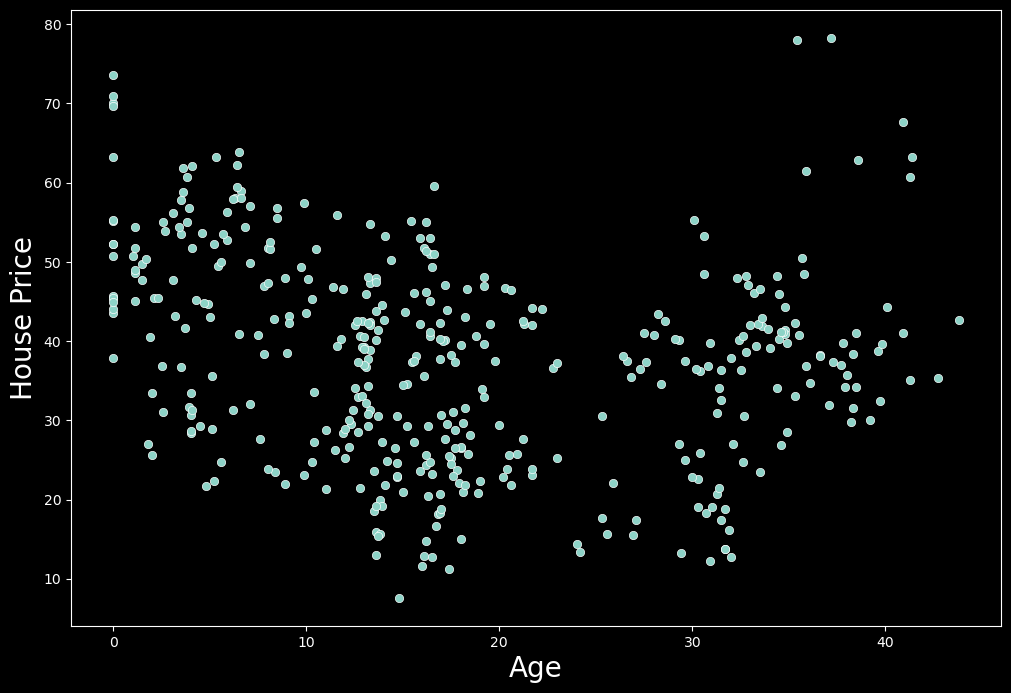

In [33]:
# Import dataset
data = pd.read_csv("./dataset/Real_estate_valuation_data_set.csv",index_col=0)
data = data[['Y house price of unit area','X2 house age']]
data.columns = ['y','x']
data = data[data.y <100] # remove outlier 

print("Number of rows: {}".format(len(data)))

#Plot data 
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,8))
sns.scatterplot(y=data['y'],x = data['x'])
plt.xlabel('Age',size=20)
plt.ylabel('House Price',size=20)

plt.savefig('../figures/poly/data_scatter.png',format='png',dpi=150)

## Good Example
最小值为 n = 2 且 MSE 趋势符合预期的示例

In [34]:
x = data['x']
y = data['y']

MSE
___
1) Train:169.72 Test:145.91
2) Train:135.01 Test:127.42
3) Train:134.35 Test:128.1
4) Train:133.5 Test:128.78
5) Train:132.97 Test:128.95
6) Train:132.53 Test:131.48
7) Train:131.79 Test:131.81
8) Train:127.93 Test:133.88
9) Train:126.86 Test:135.36
10) Train:126.77 Test:134.46
11) Train:125.16 Test:140.46
12) Train:124.38 Test:139.51
13) Train:123.0 Test:145.05
14) Train:121.15 Test:148.6
15) Train:119.47 Test:148.18
16) Train:119.37 Test:146.5
17) Train:118.62 Test:150.51
18) Train:118.57 Test:148.97
19) Train:117.79 Test:147.65
20) Train:117.73 Test:147.54


/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_18954/1412852142.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,8))


21) Train:116.58 Test:145.83
22) Train:111.25 Test:159.43
23) Train:109.87 Test:160.78
24) Train:109.17 Test:156.95
25) Train:109.15 Test:157.56


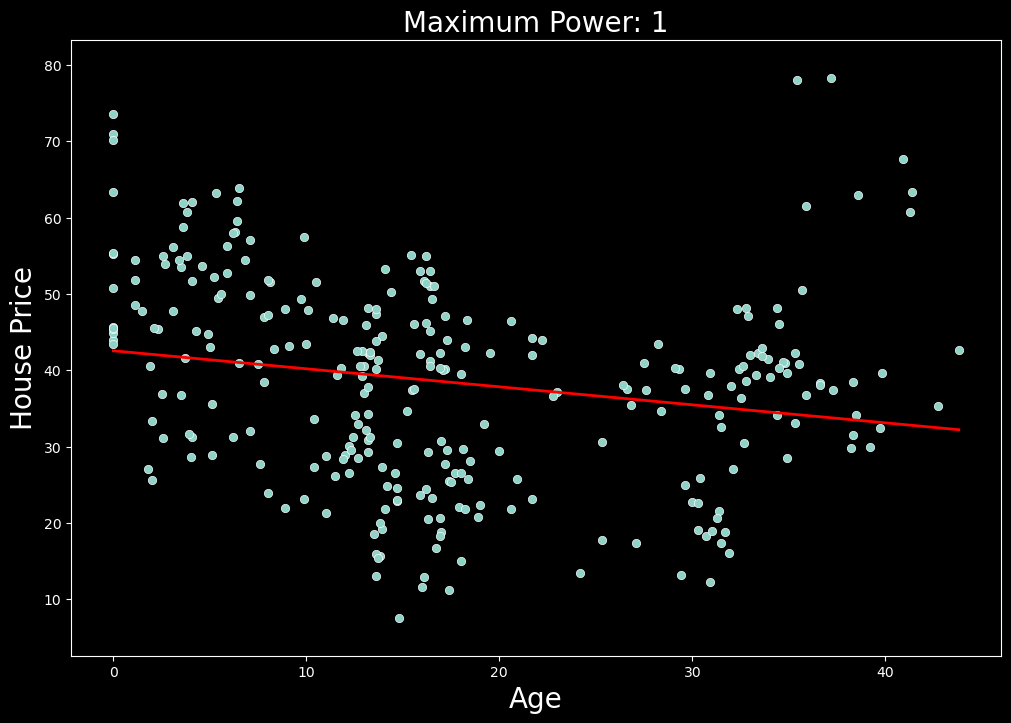

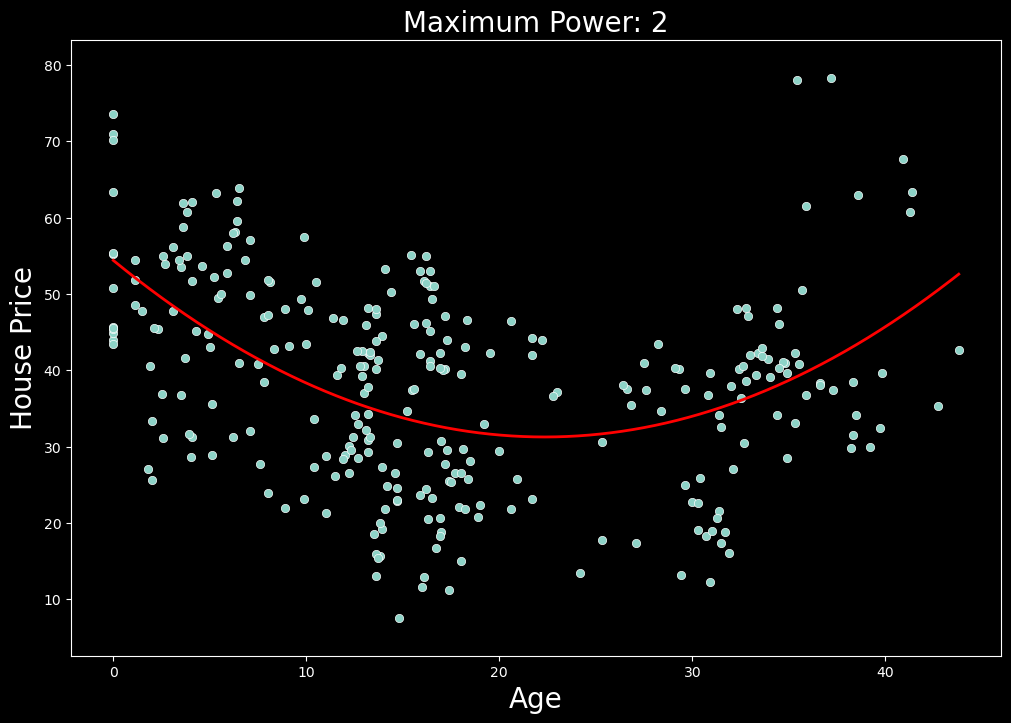

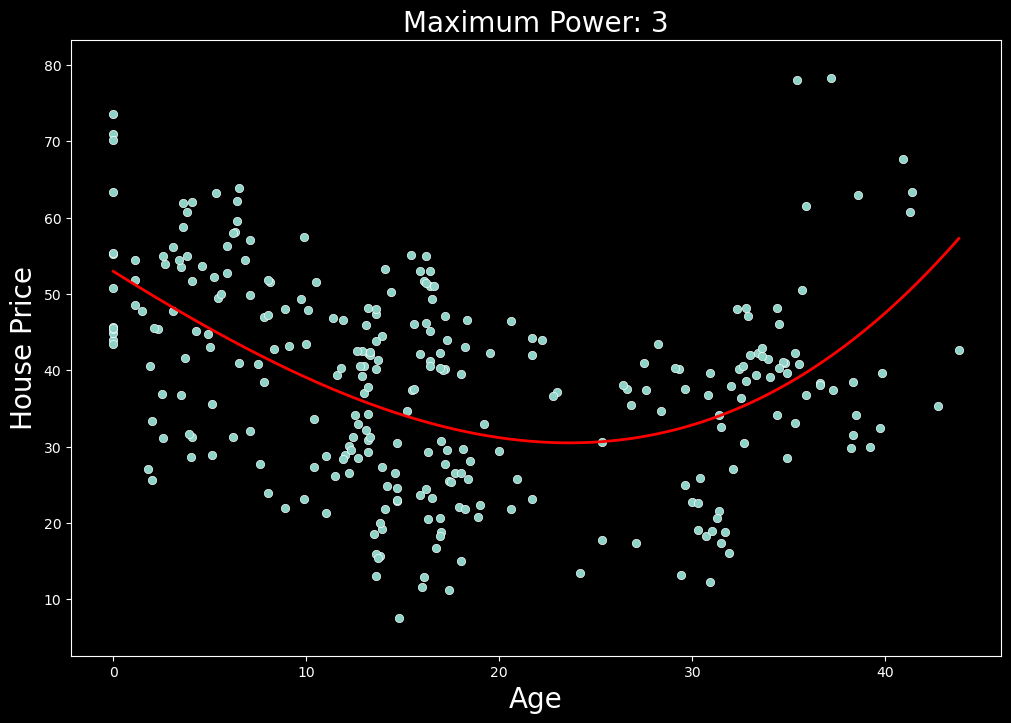

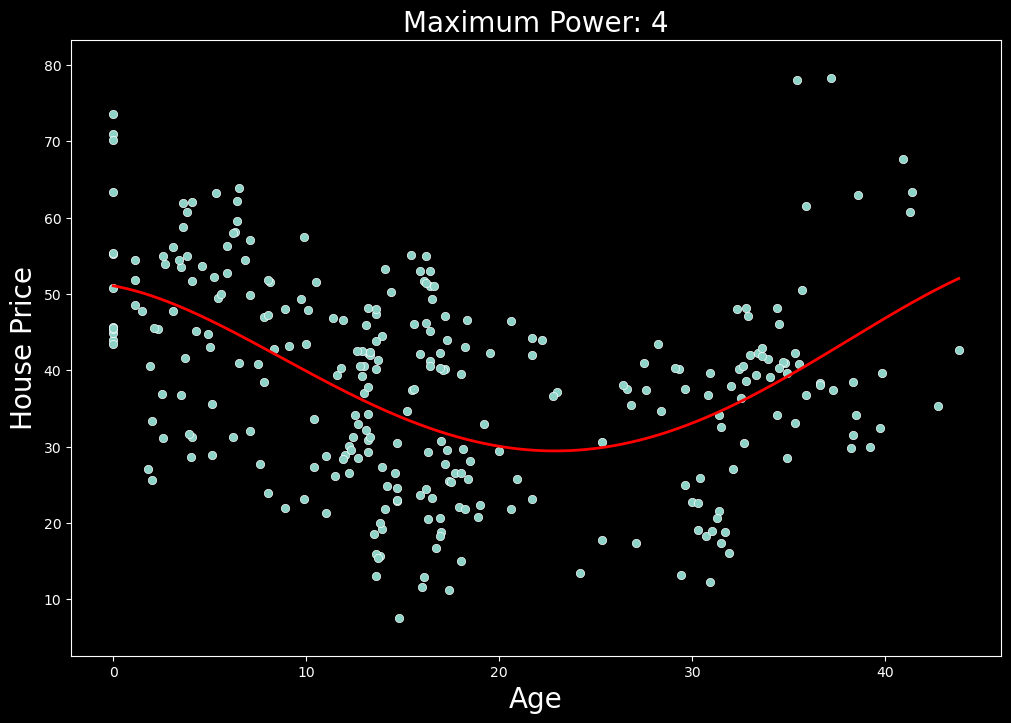

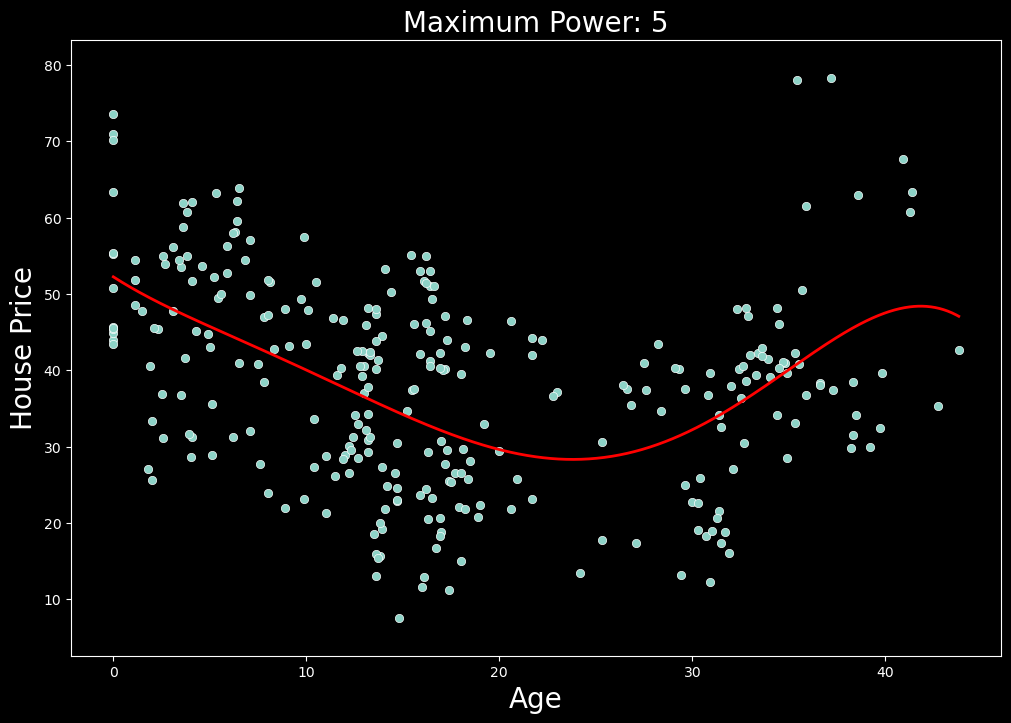

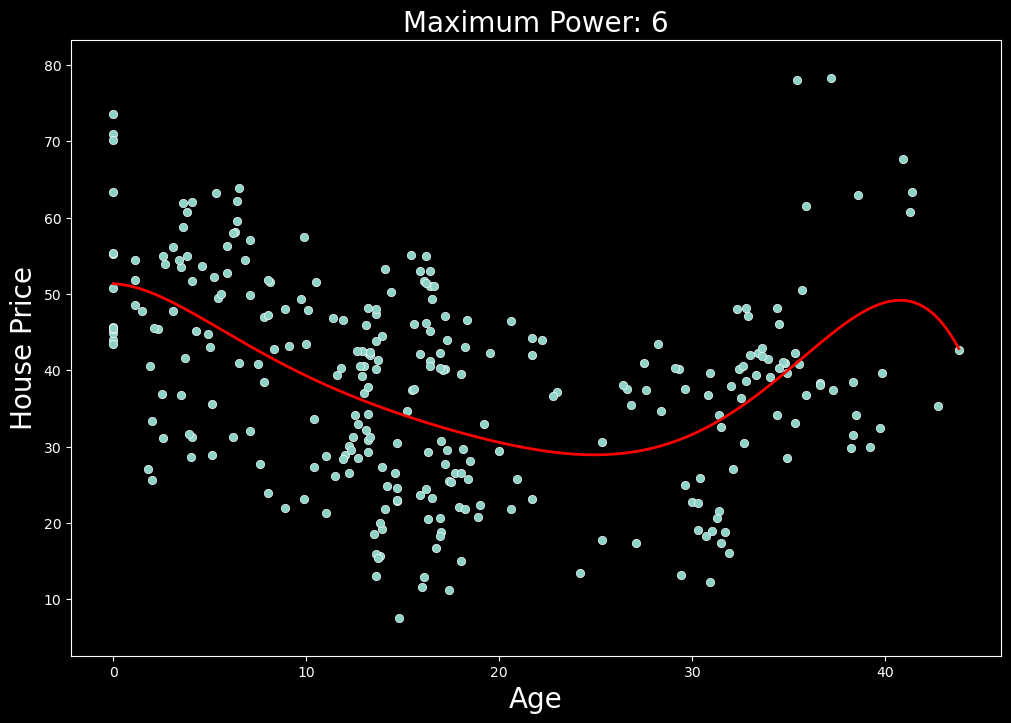

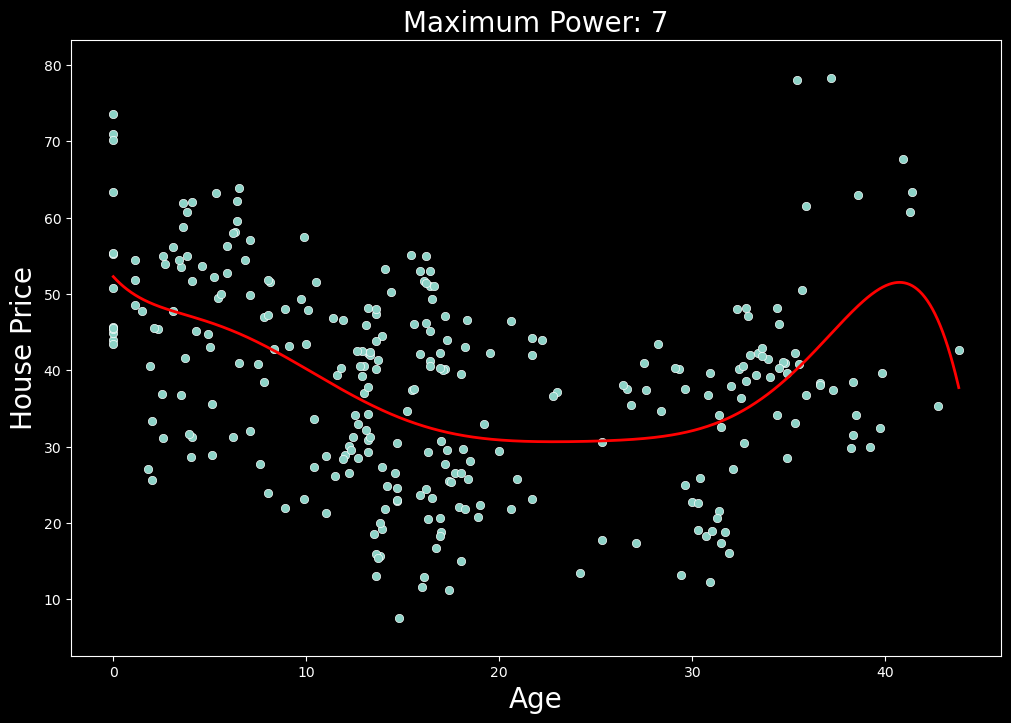

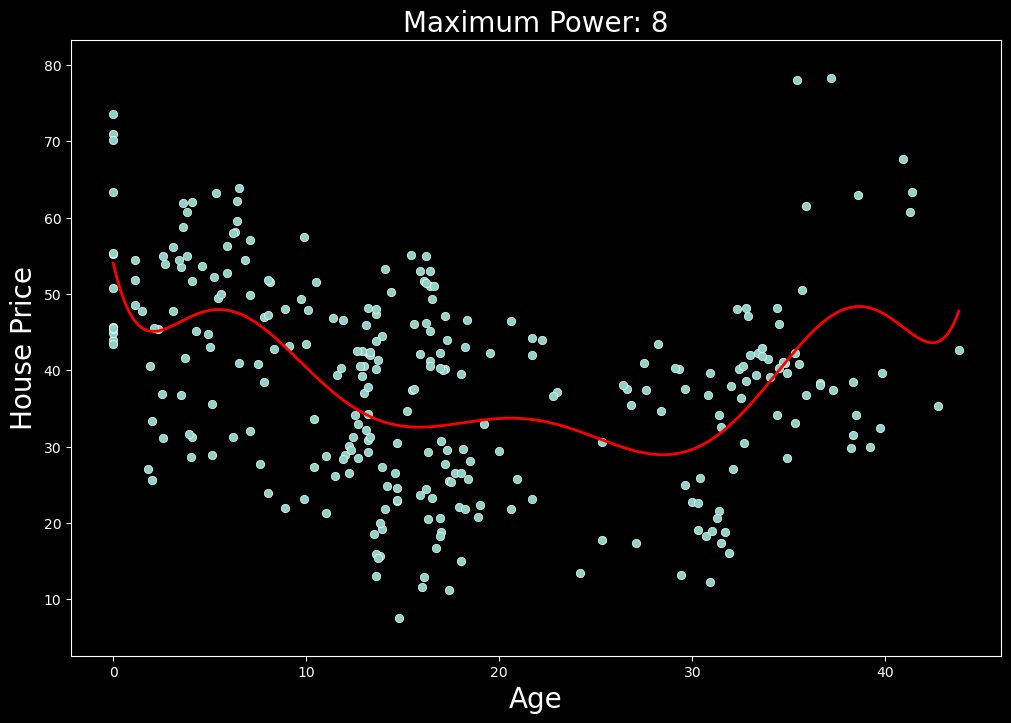

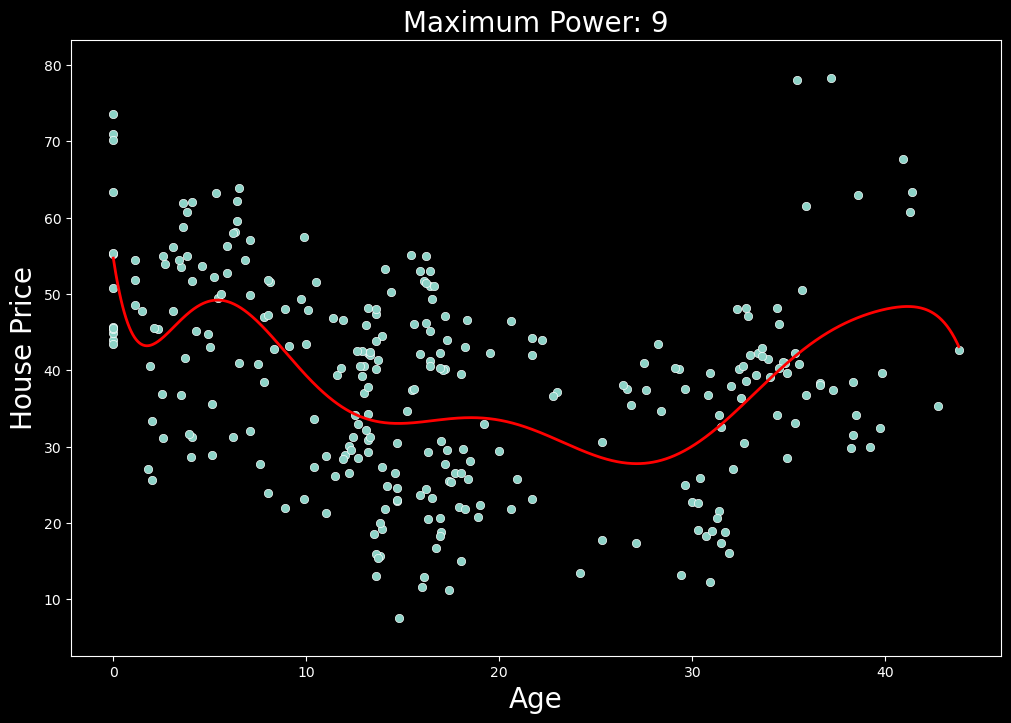

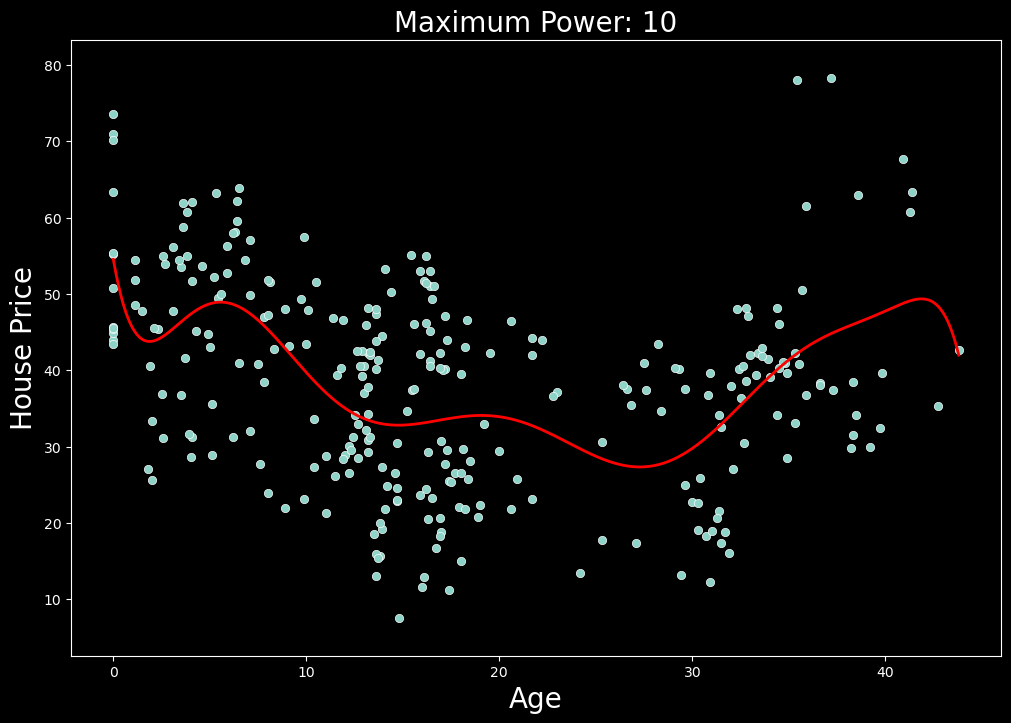

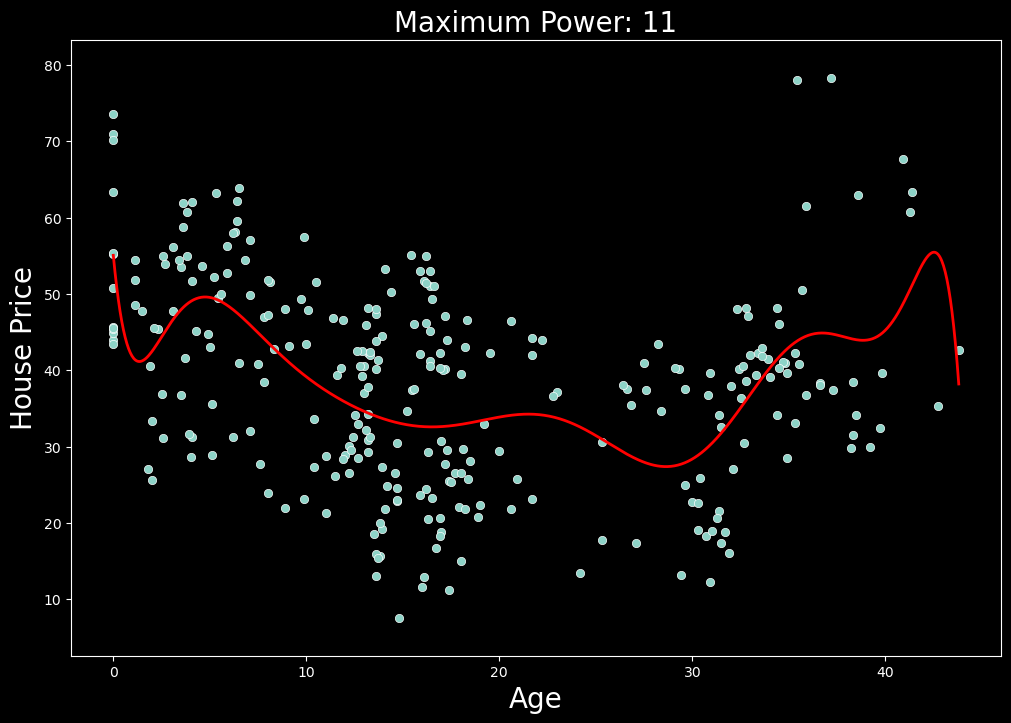

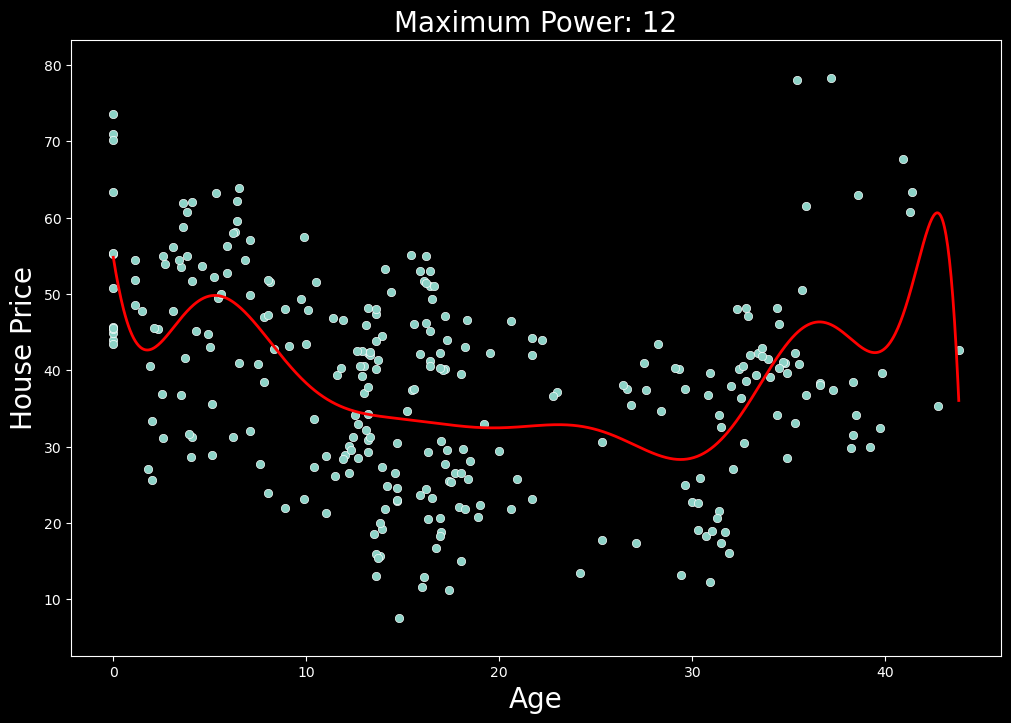

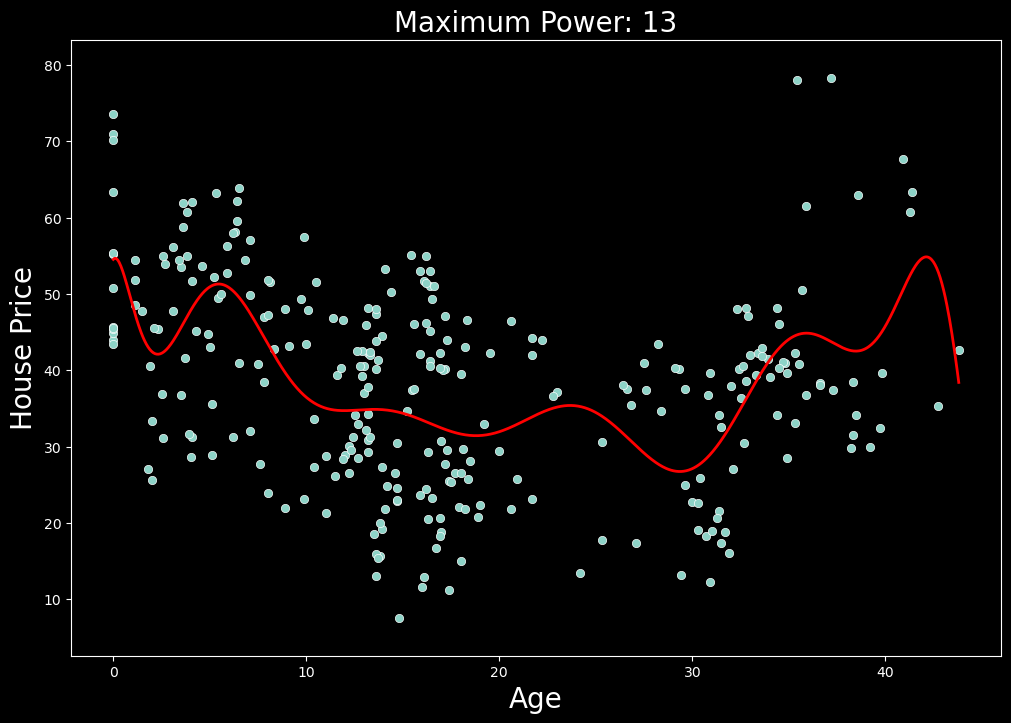

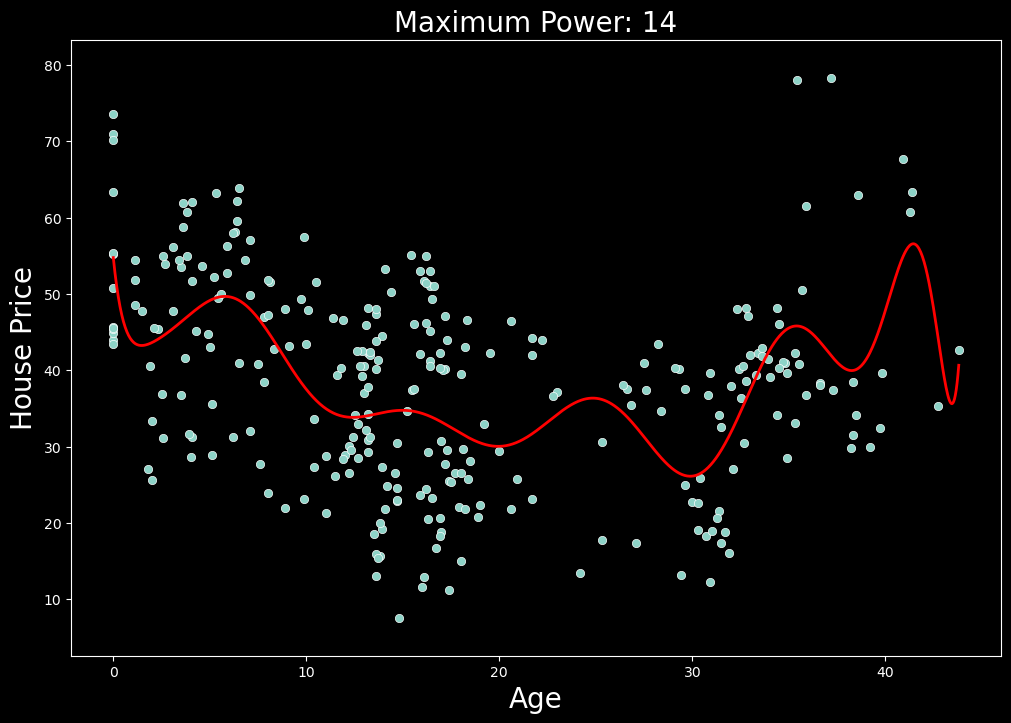

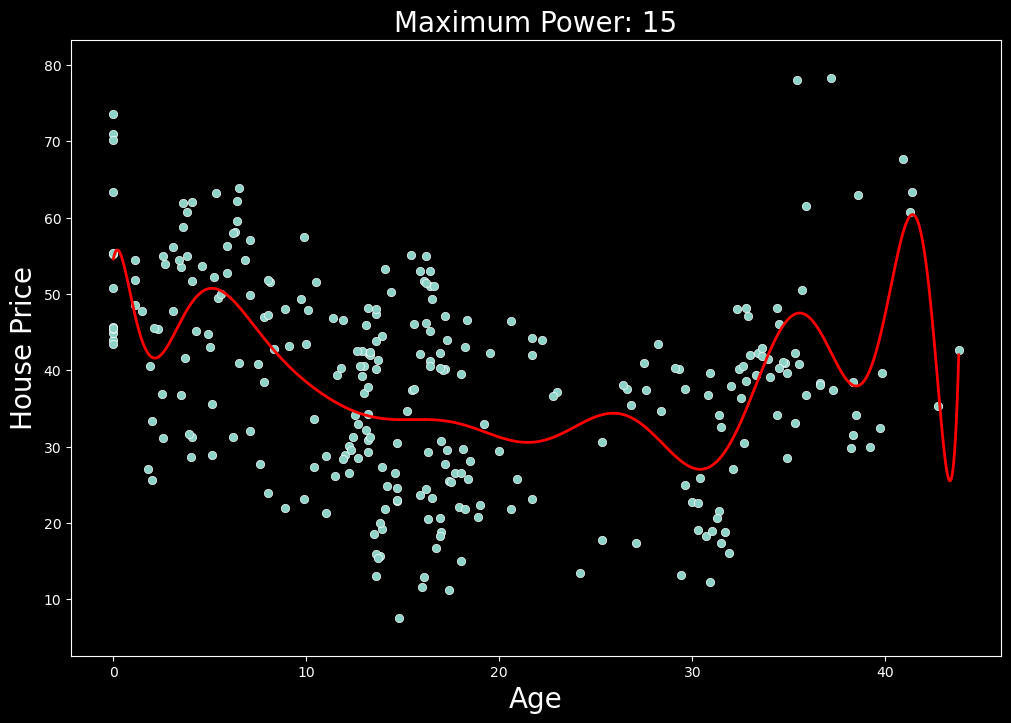

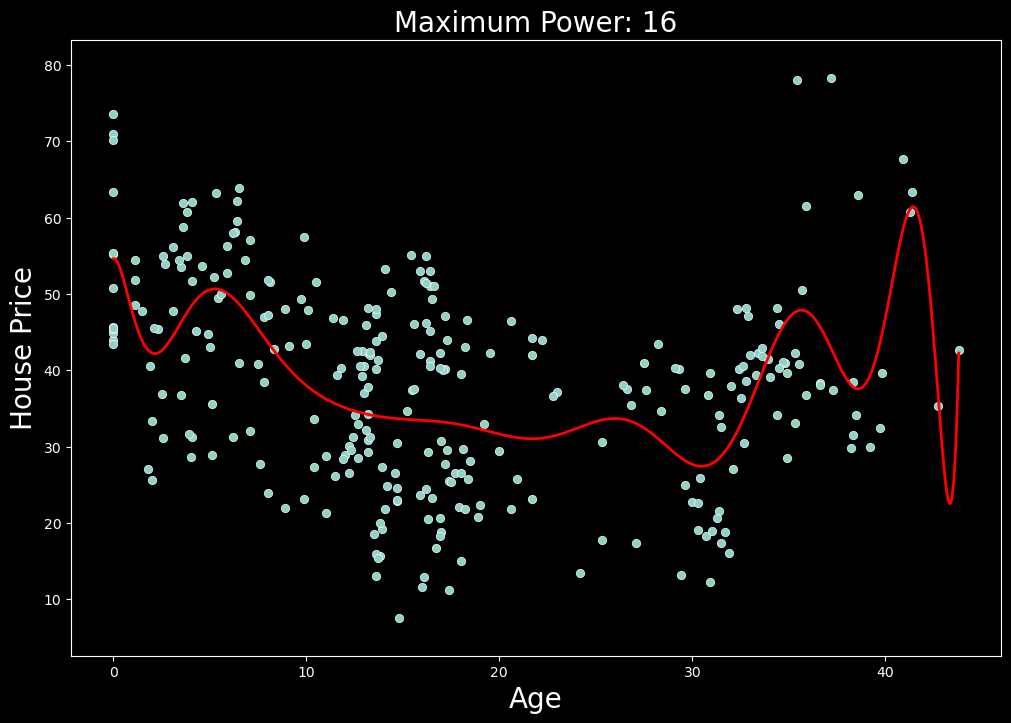

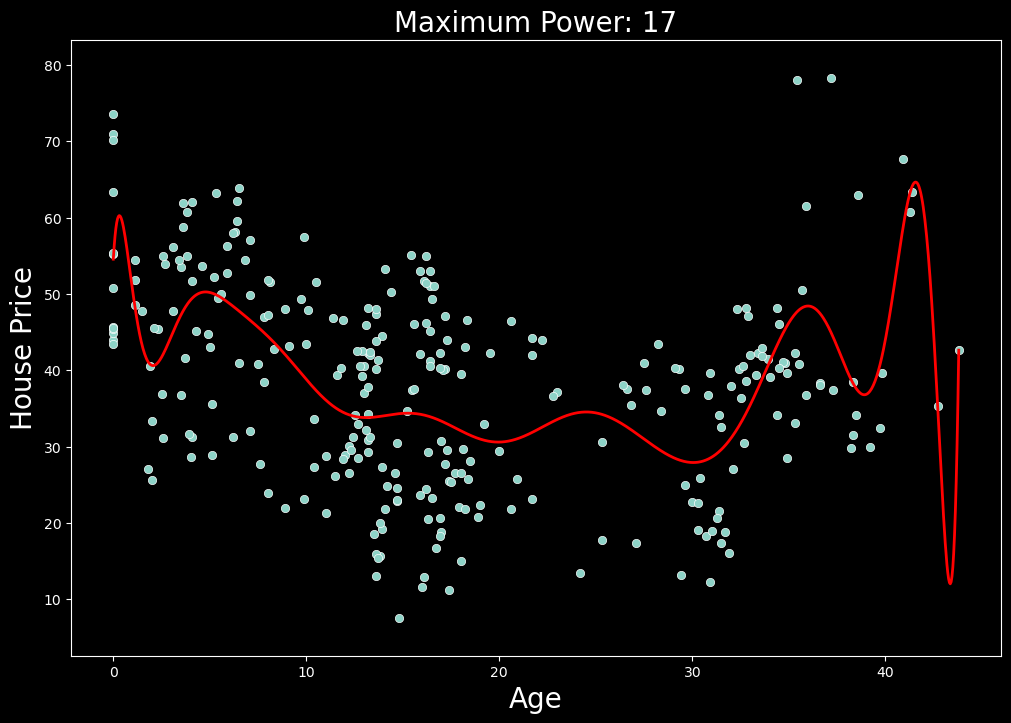

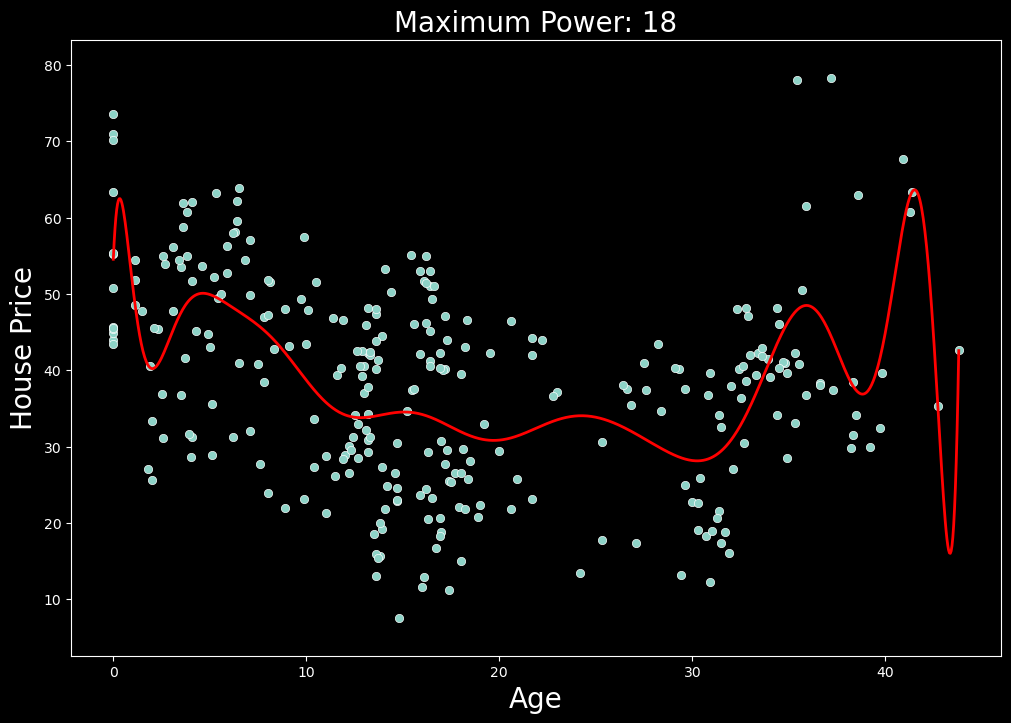

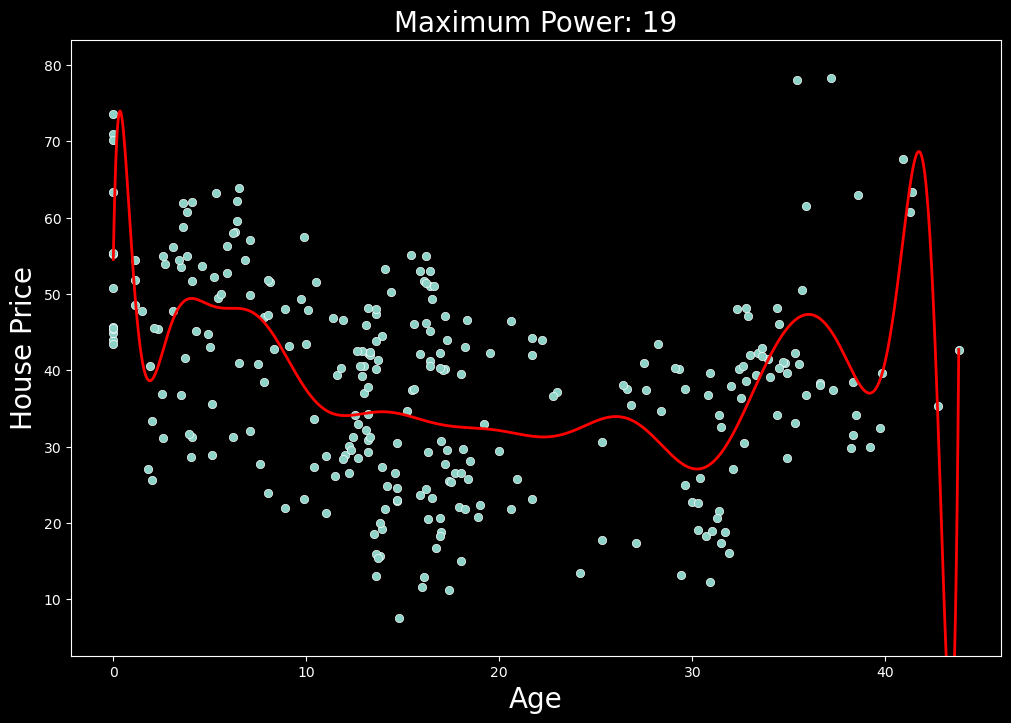

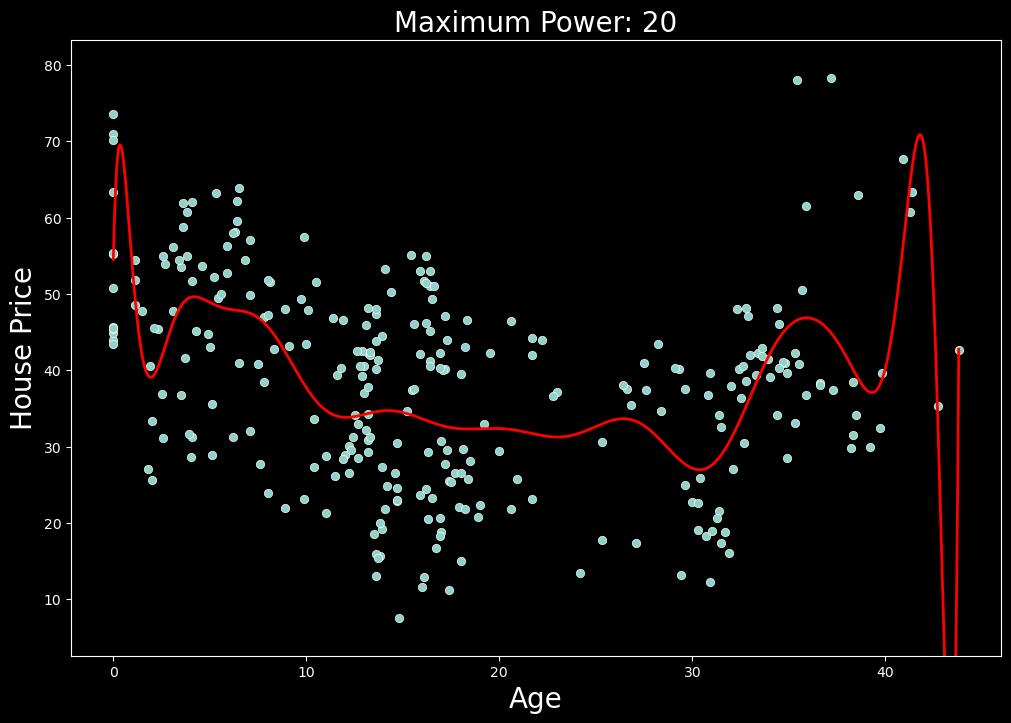

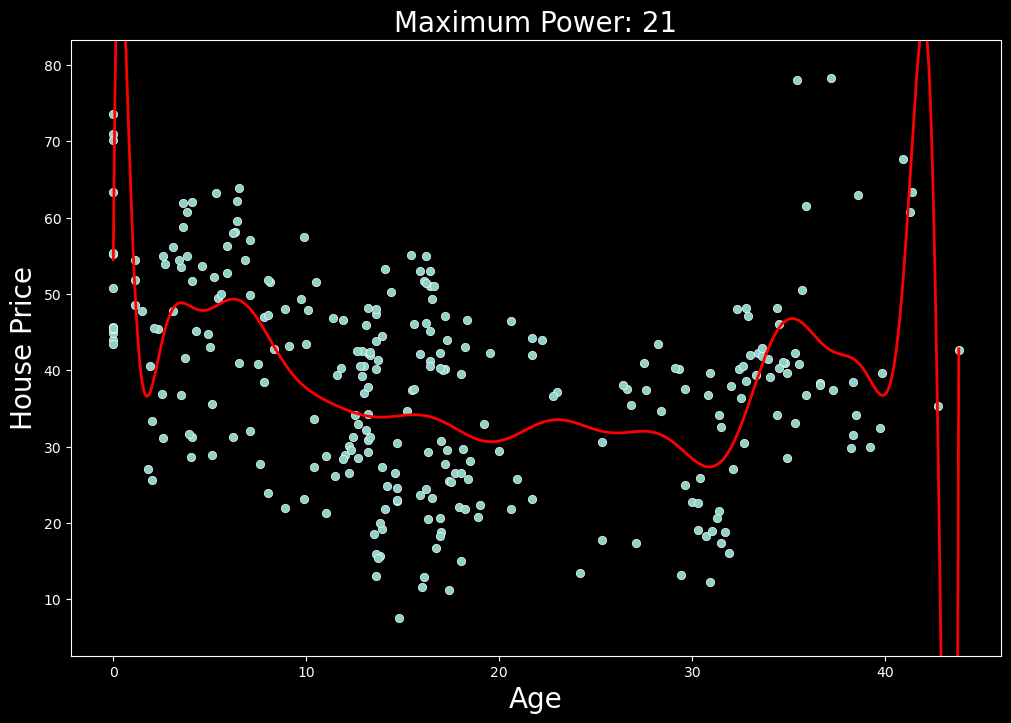

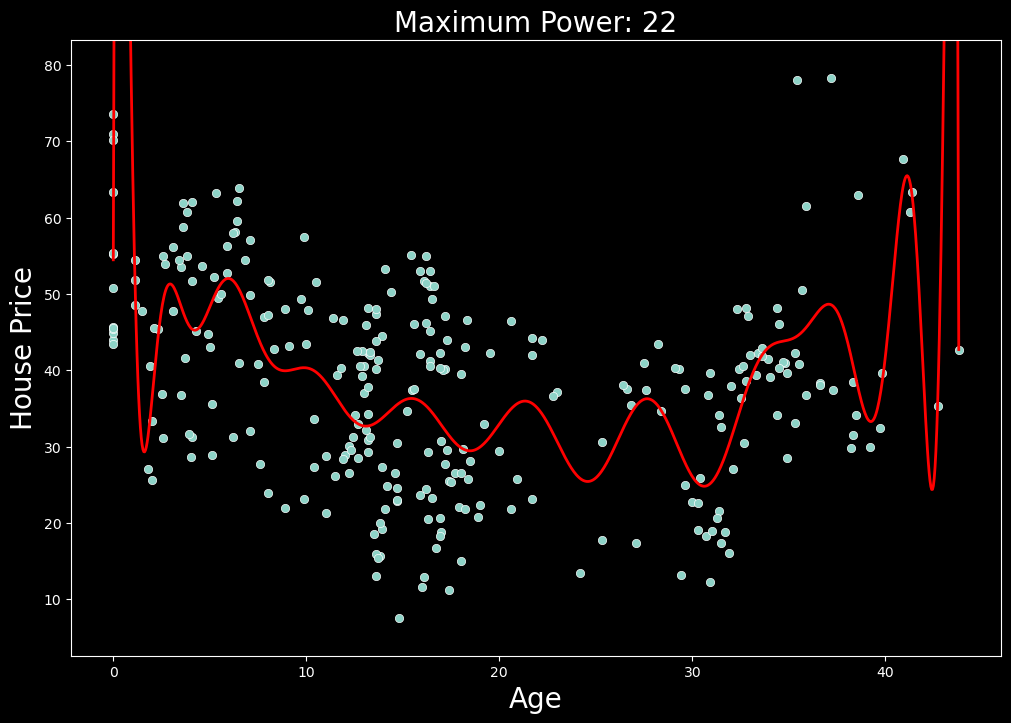

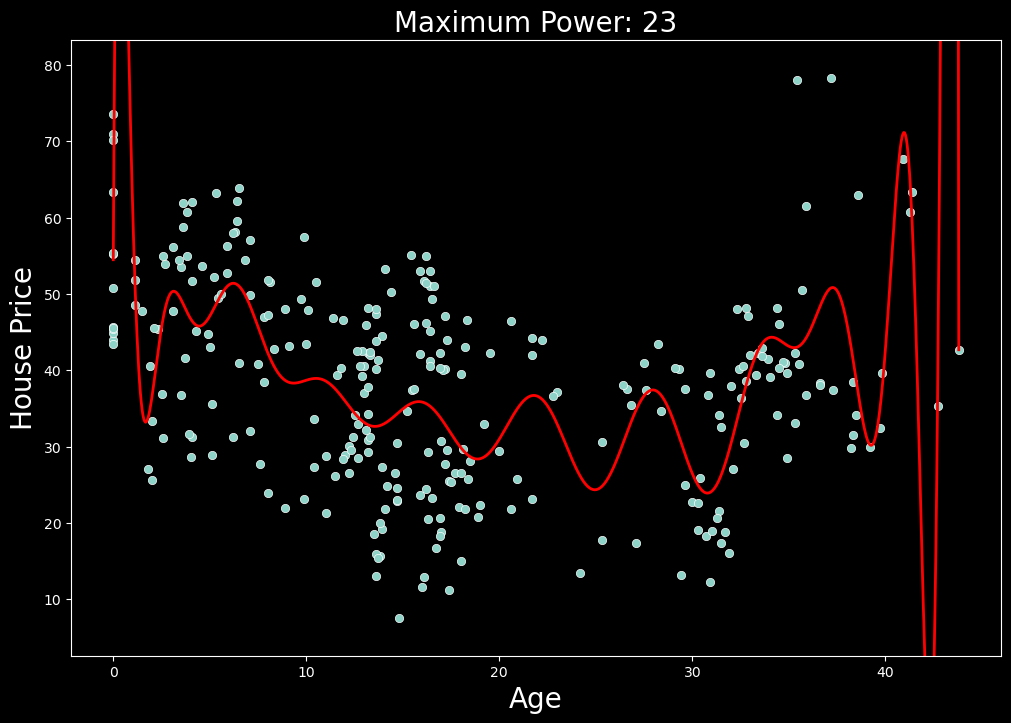

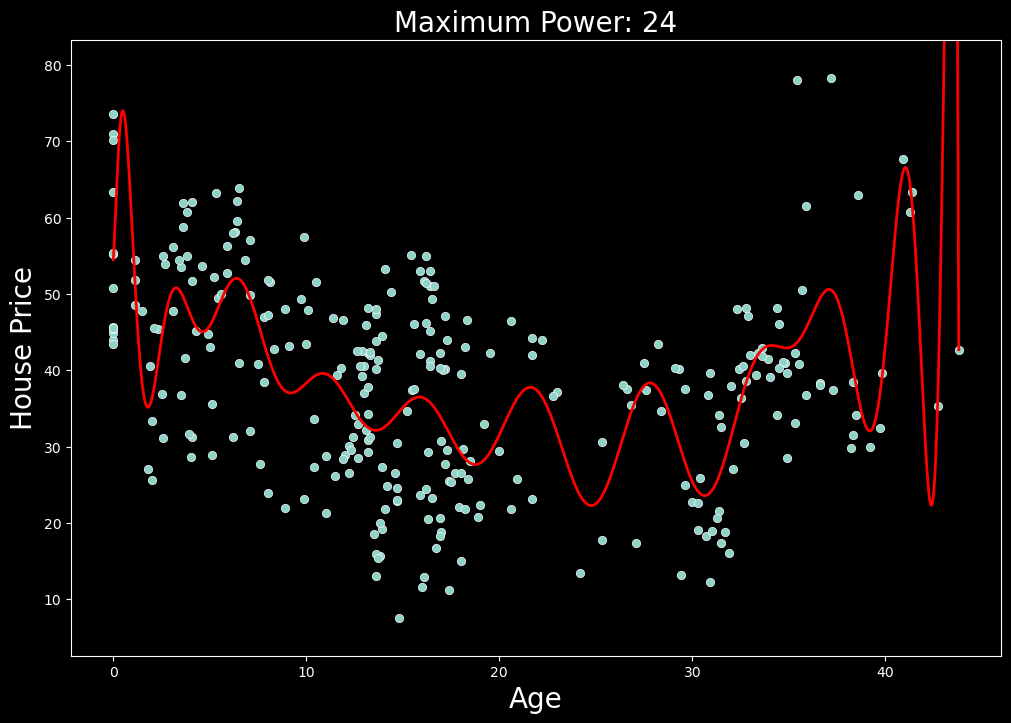

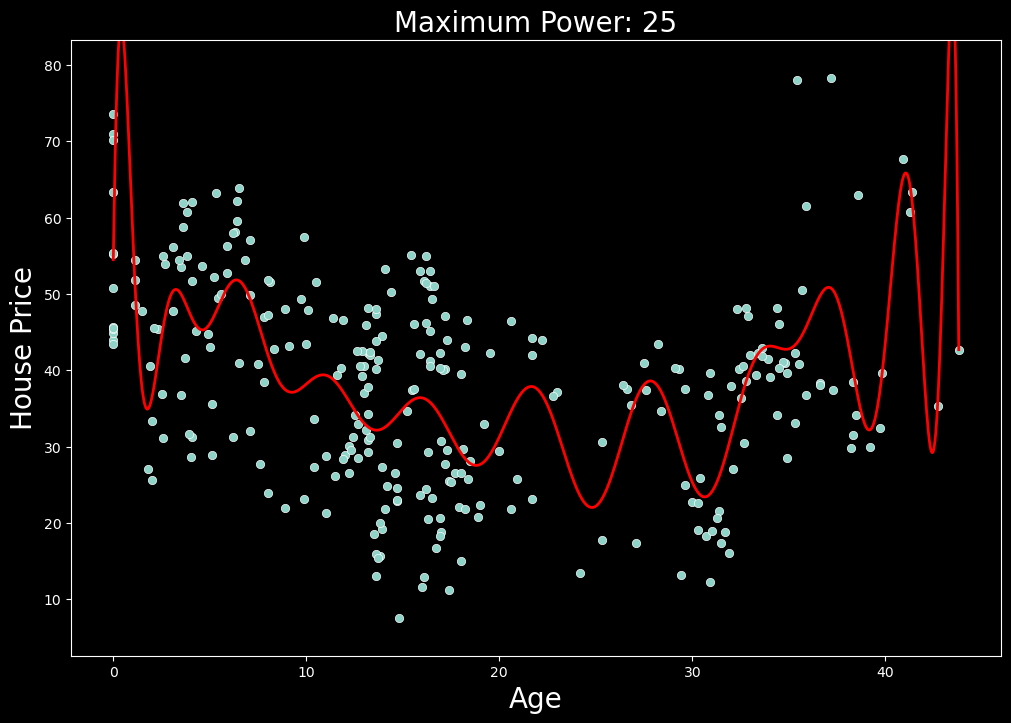

In [35]:
r = 2
train = []
test = []
n = []

for i in range(1, 26):
    model, train_mse, test_mse = regression(x, y, i, r)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_18954/2671703970.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))


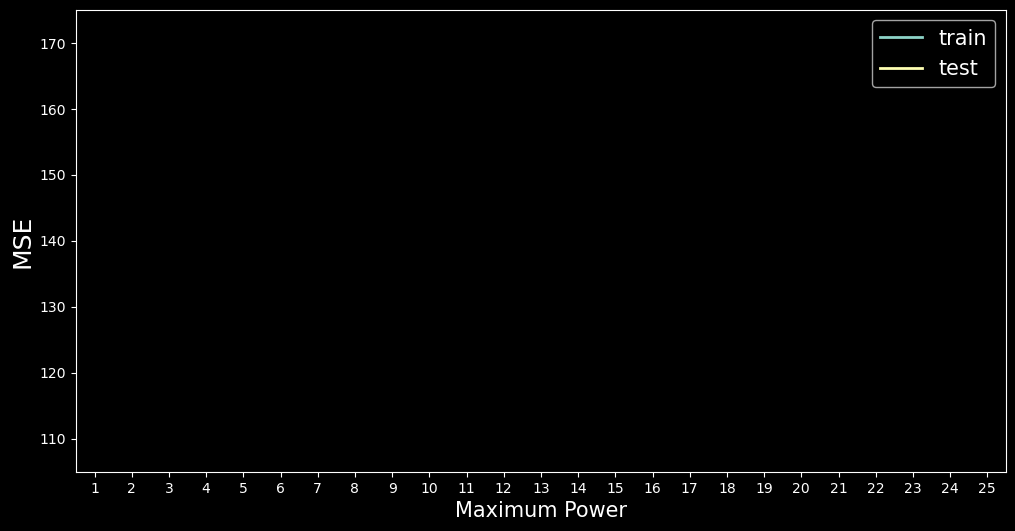

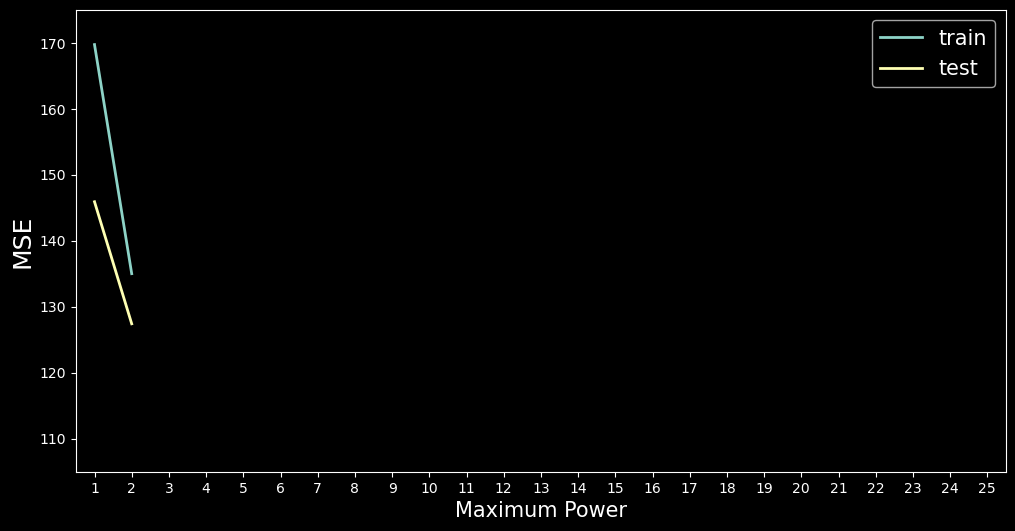

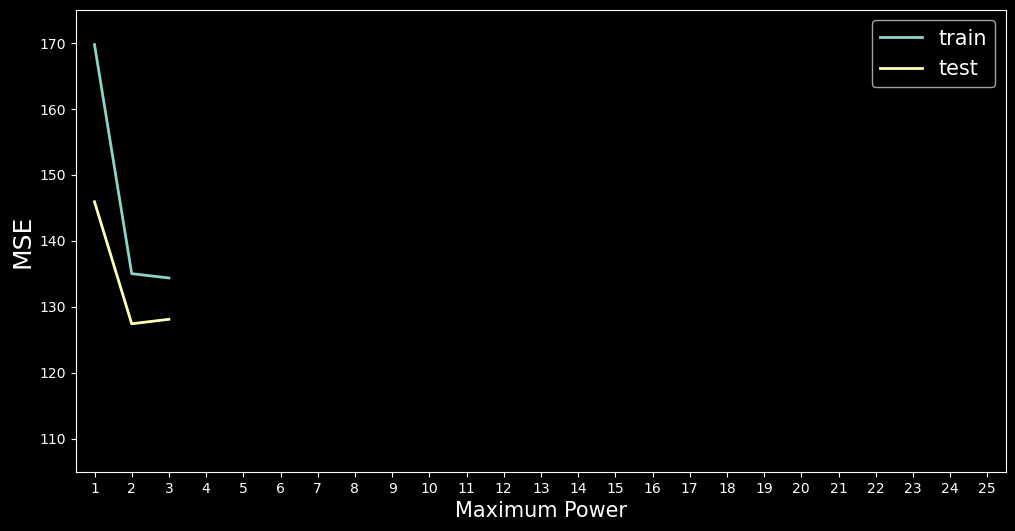

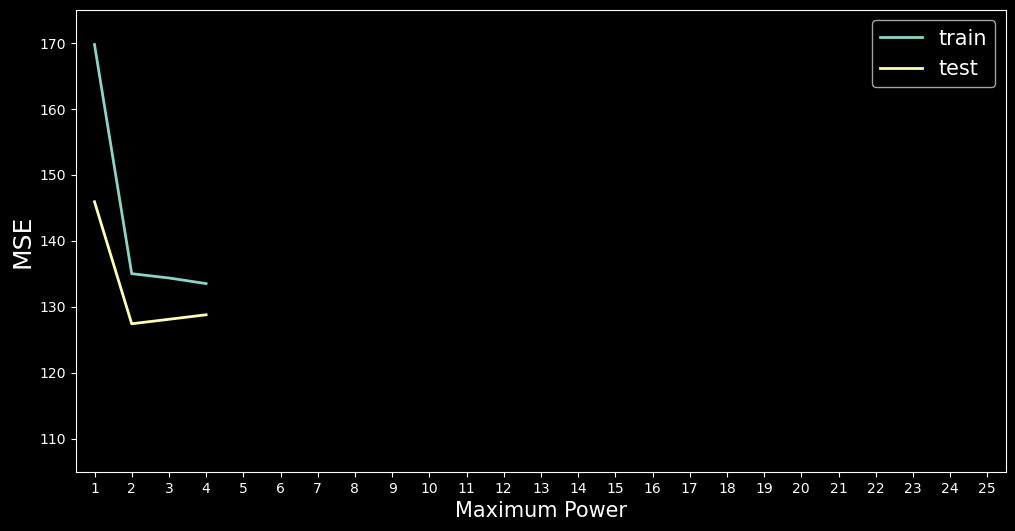

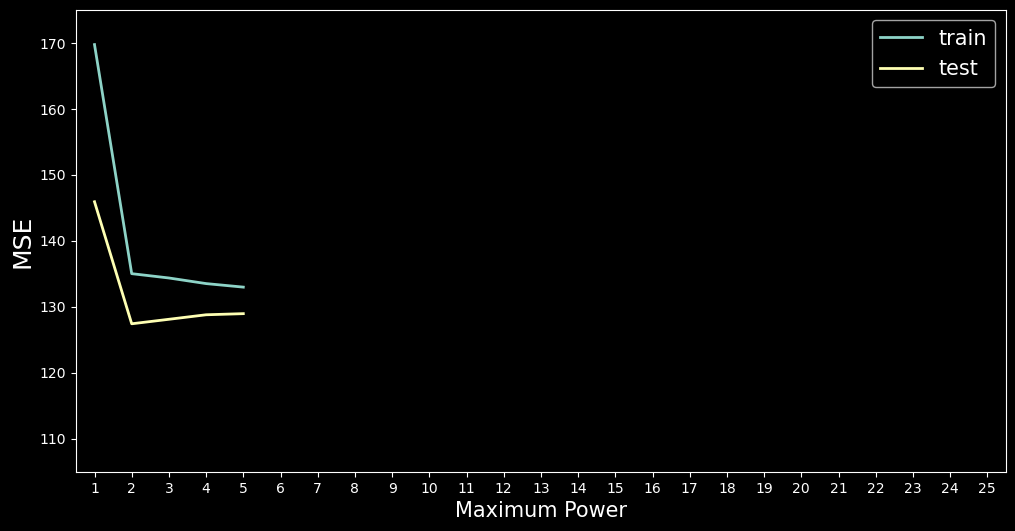

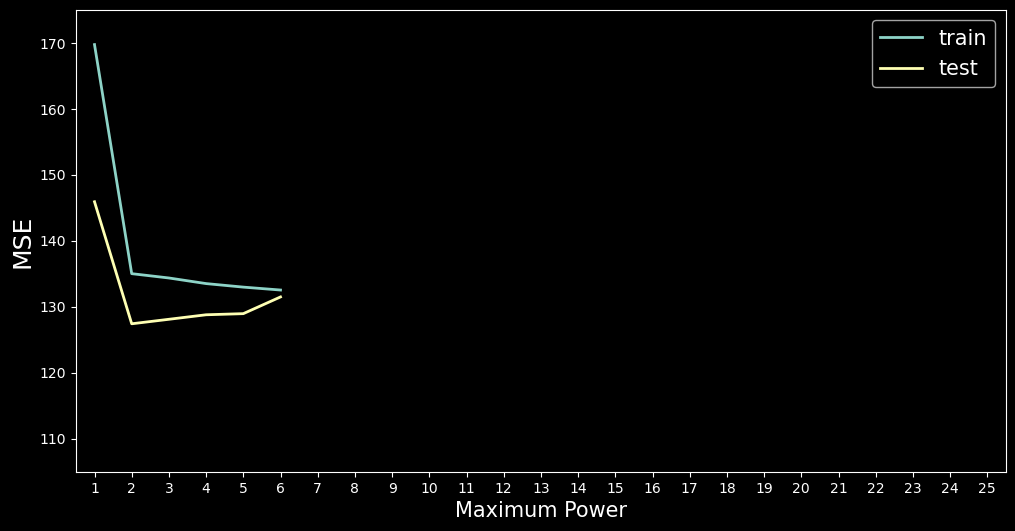

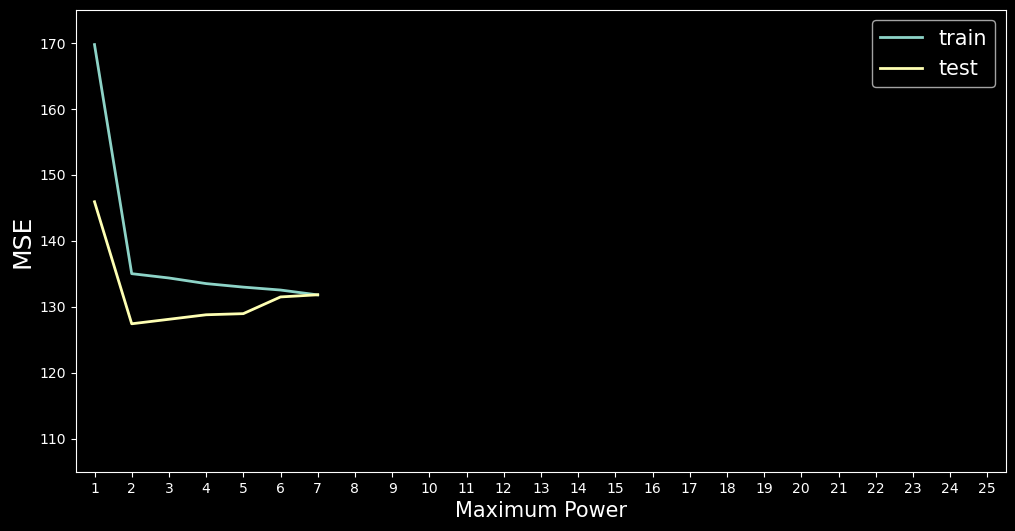

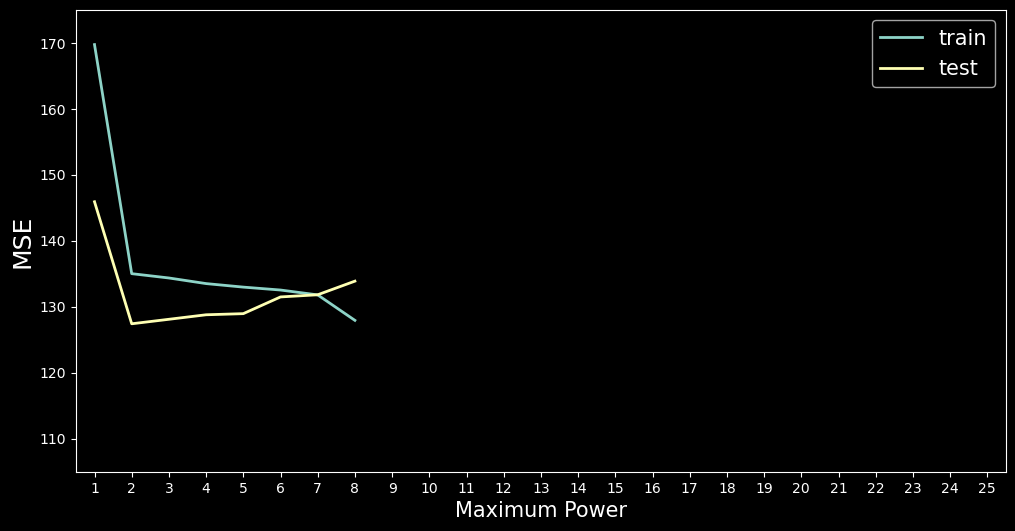

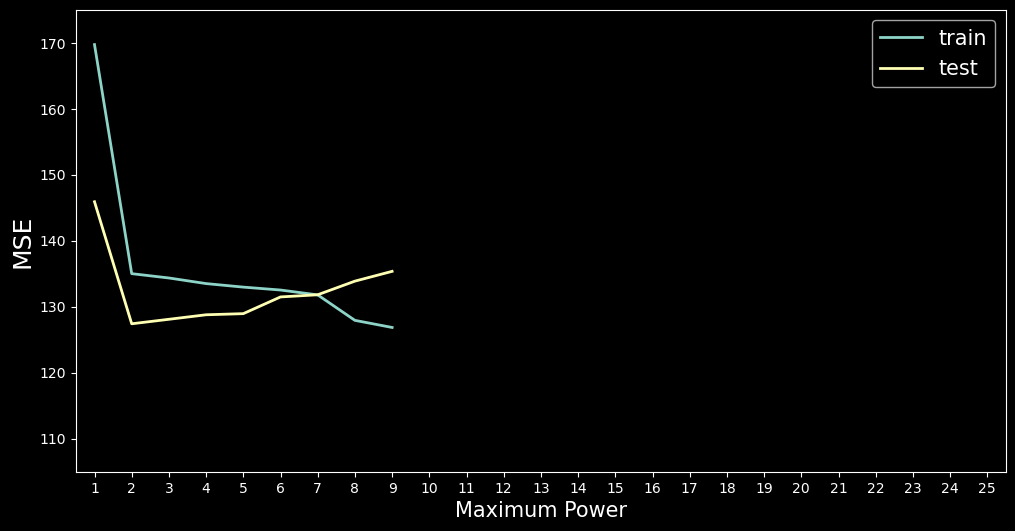

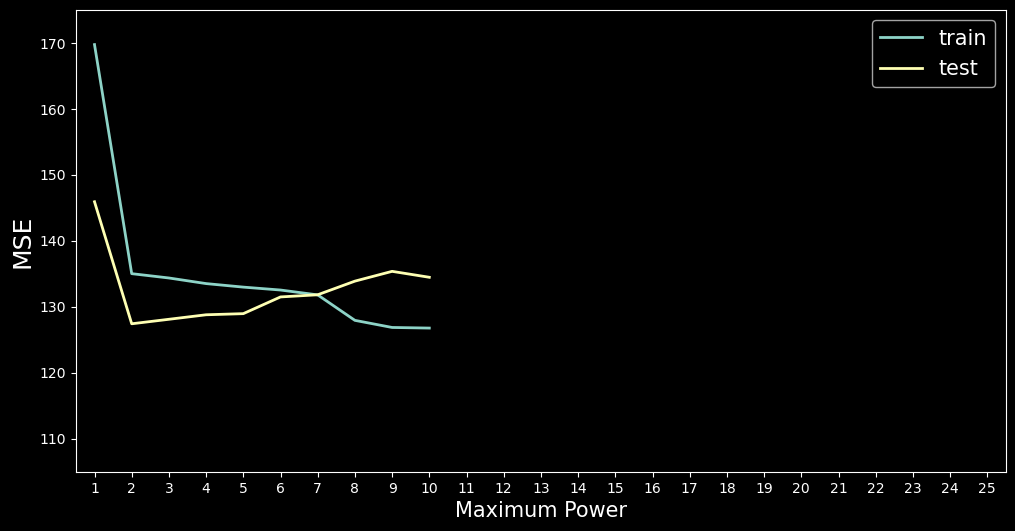

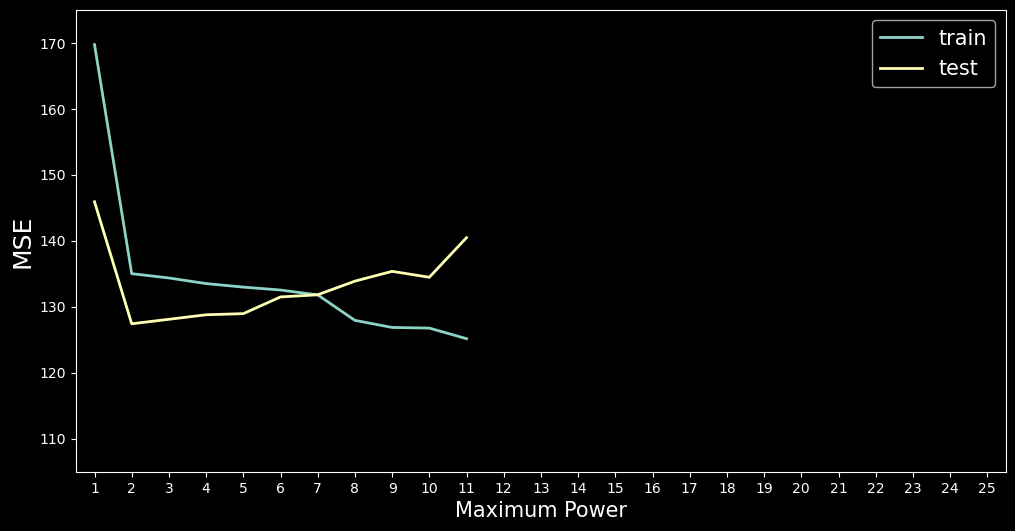

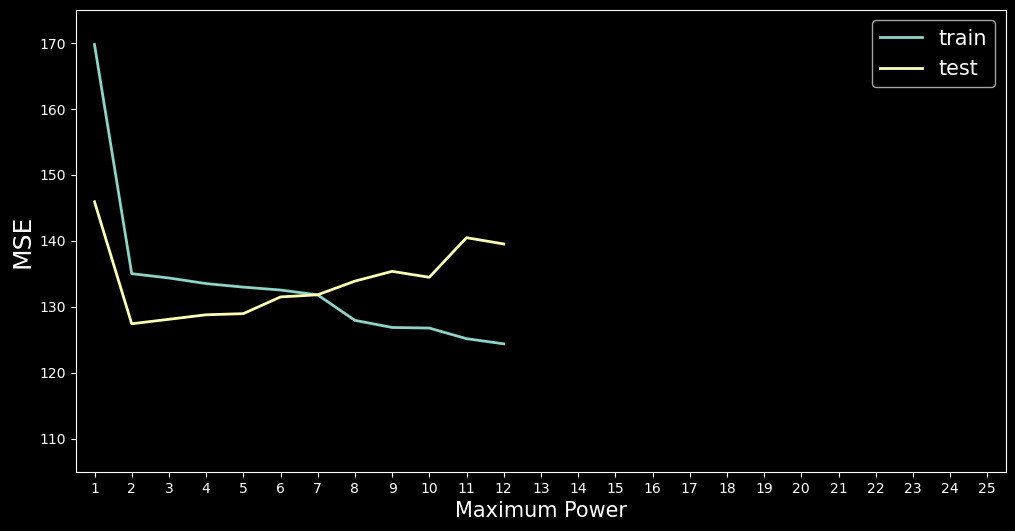

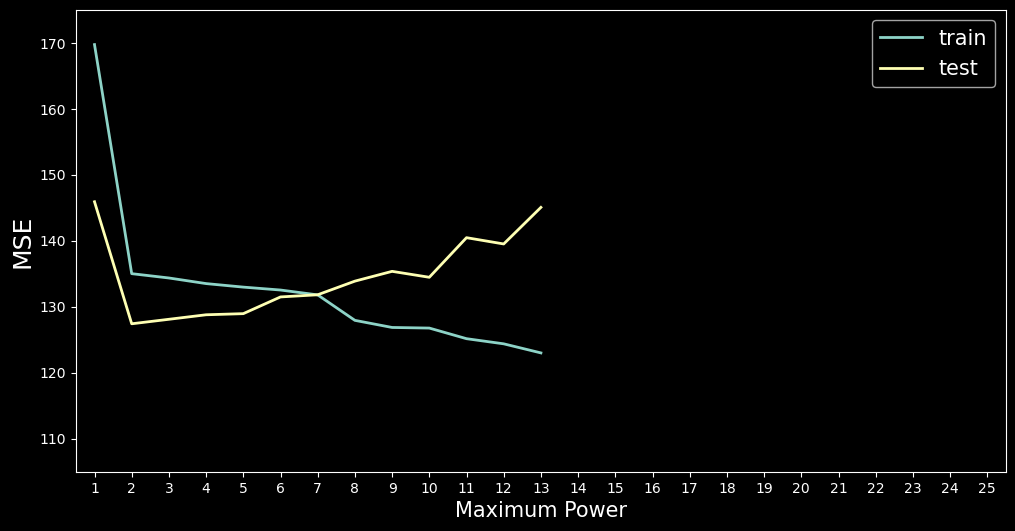

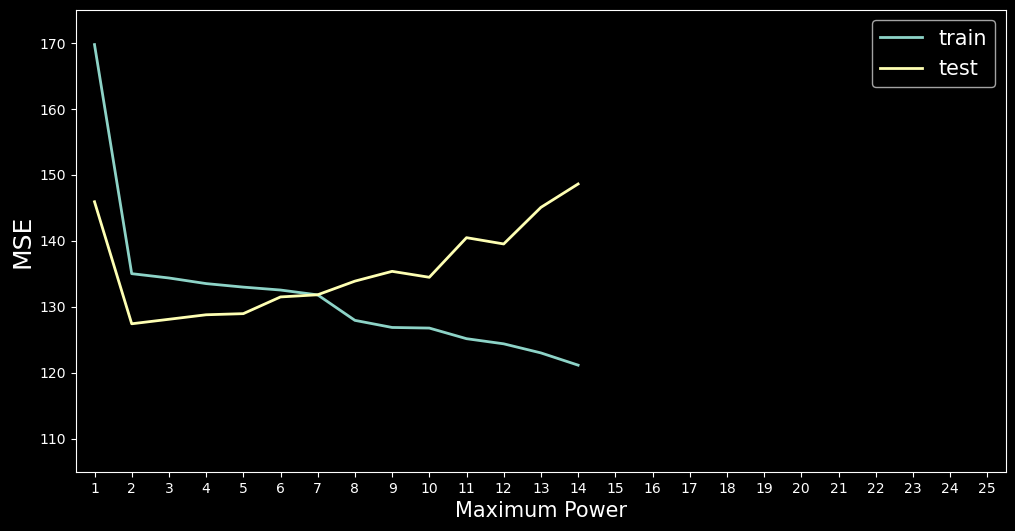

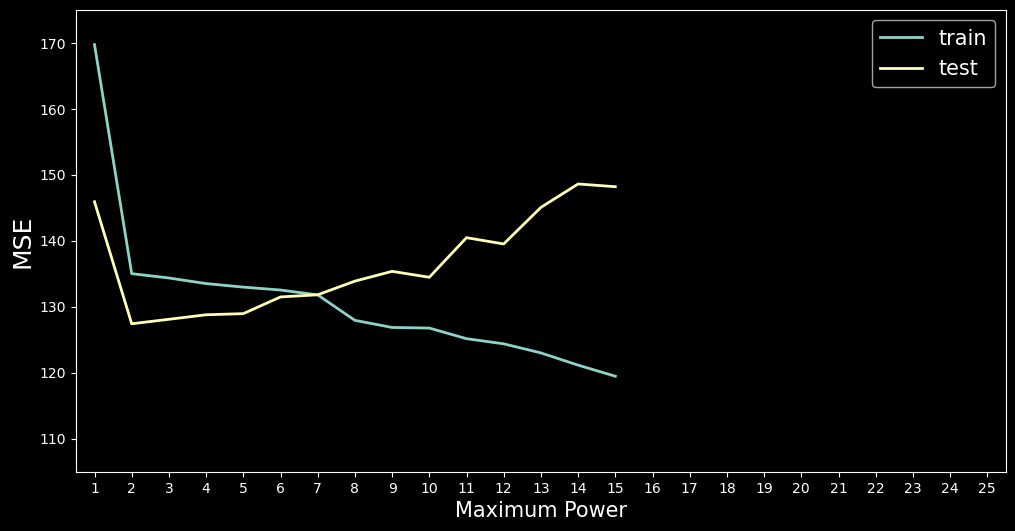

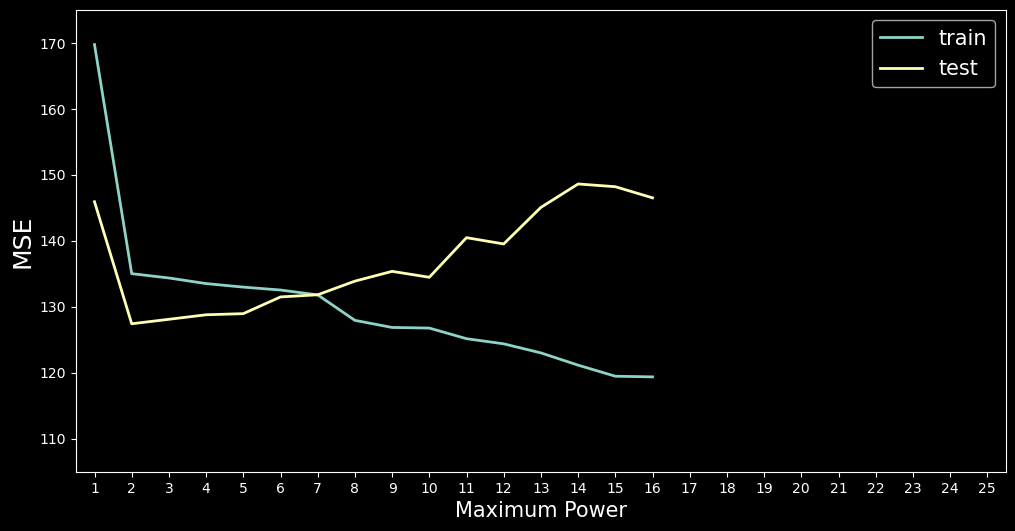

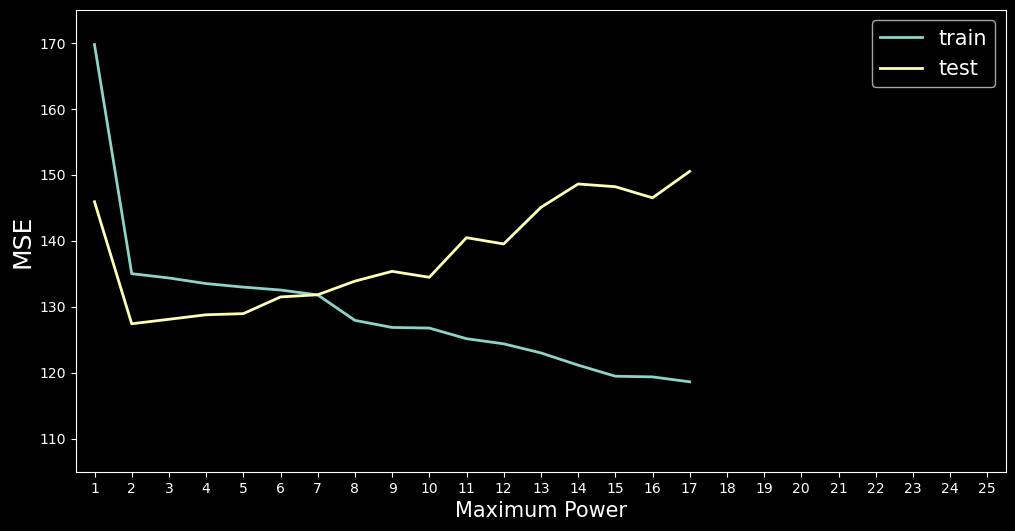

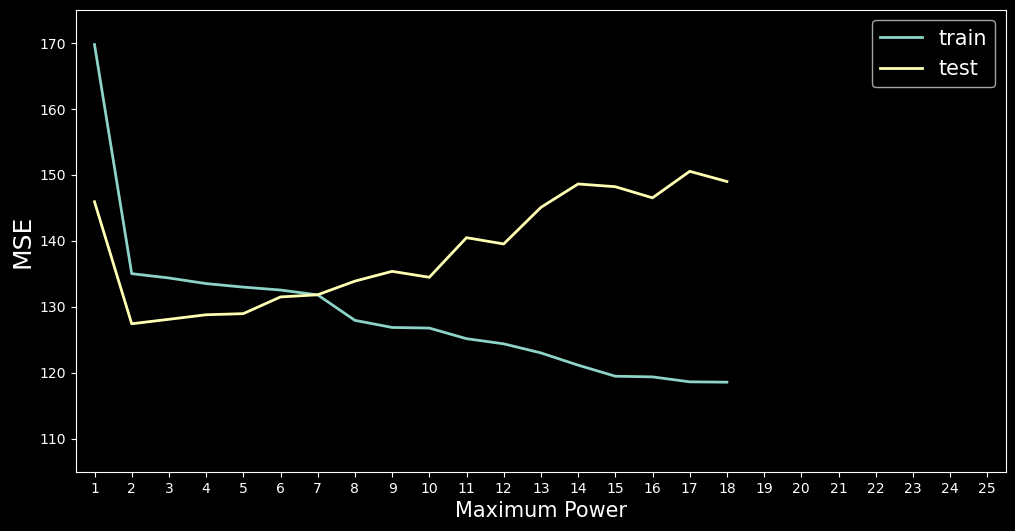

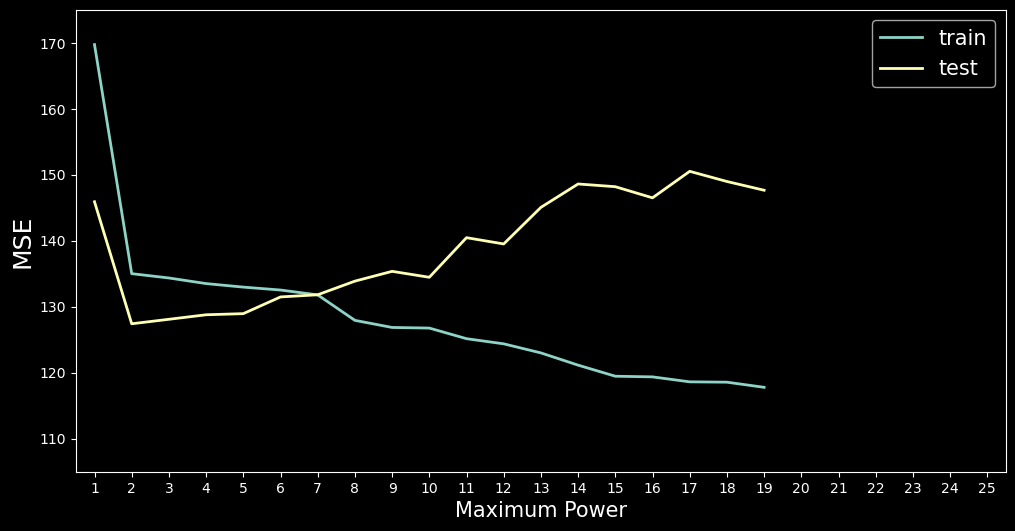

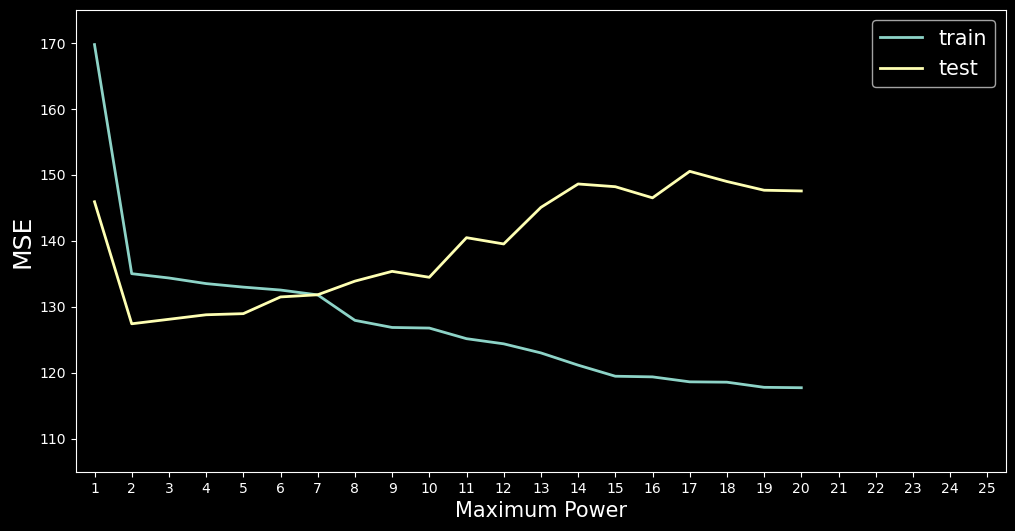

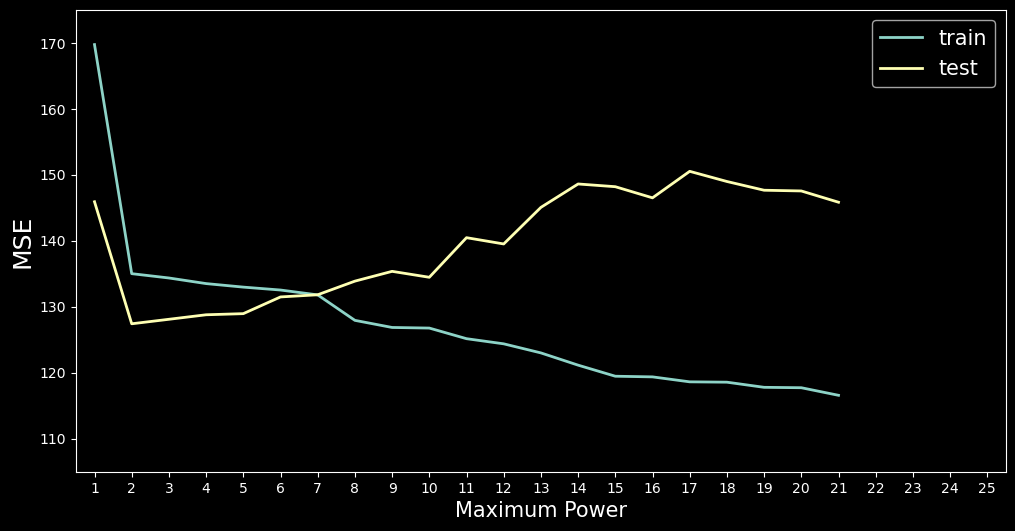

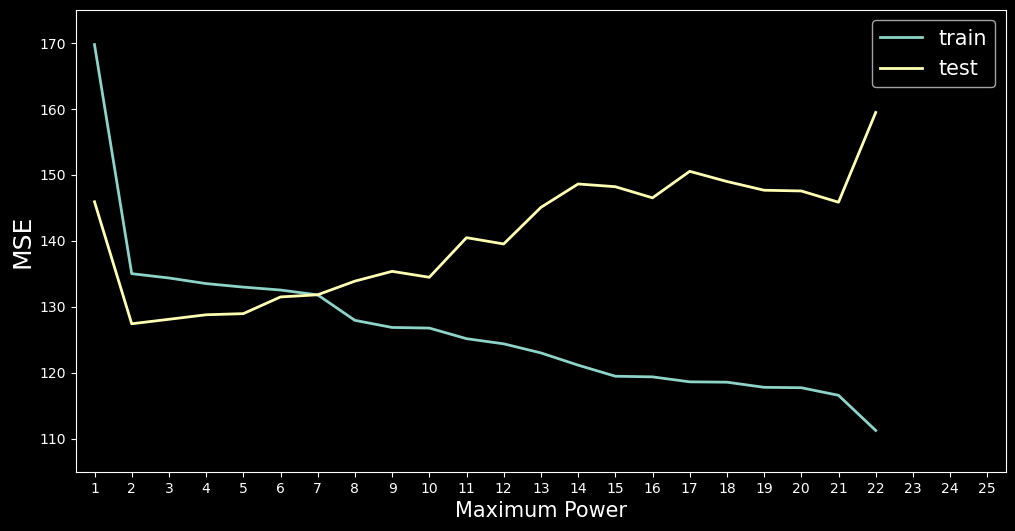

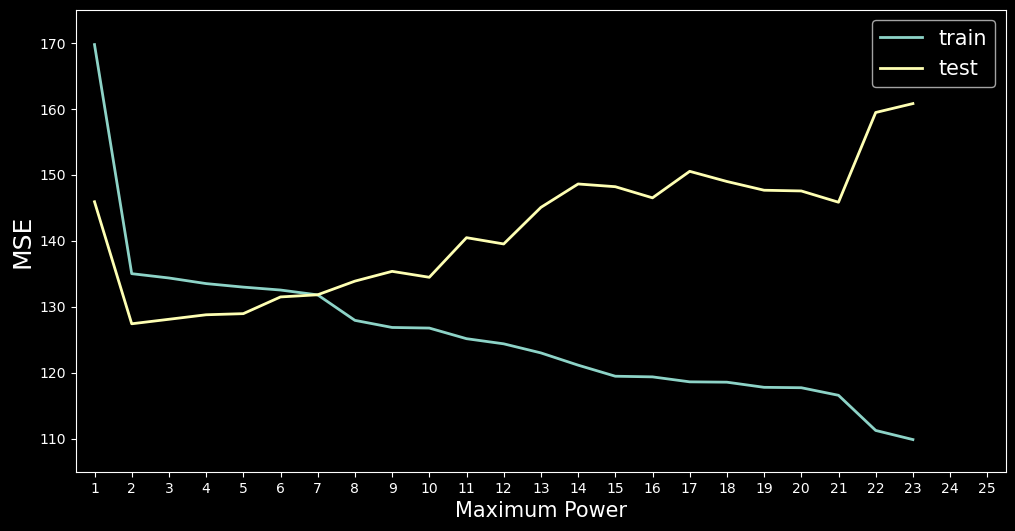

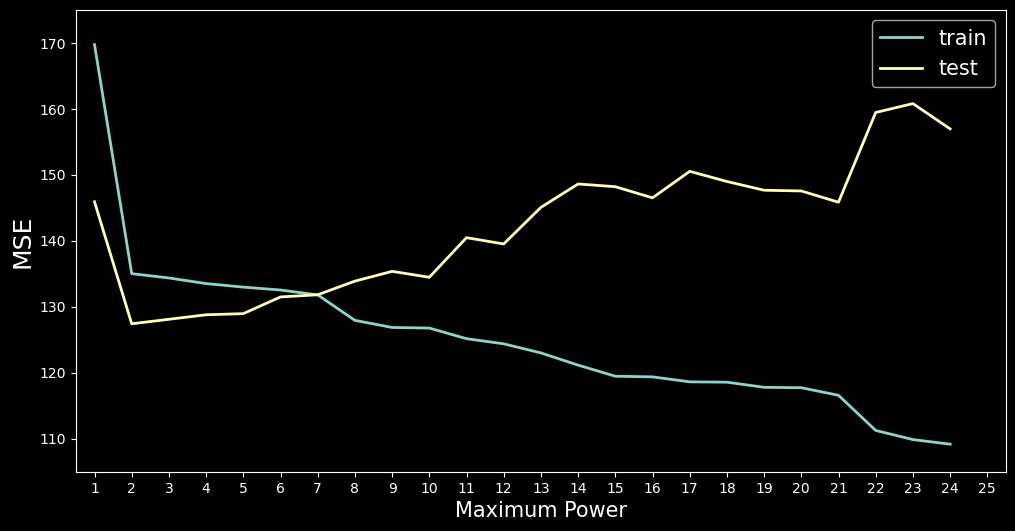

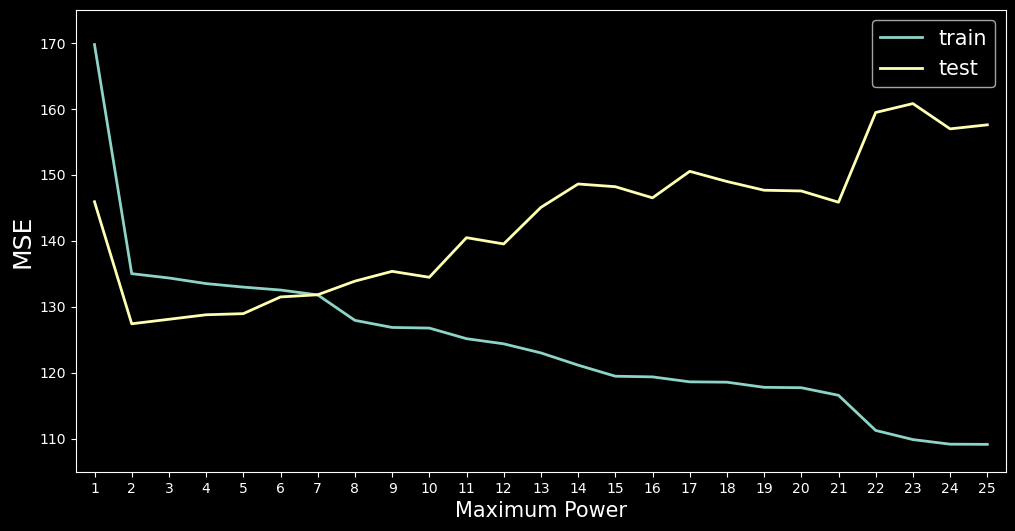

In [36]:
for i in range(1,26):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE",size=18)
    plt.xlabel("Maximum Power",size=15)
    plt.xlim(0.5,25.5)
    plt.ylim(105,175)
    plt.xticks(n)

    plt.legend(prop={'size': 15})

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)   

## Bad Example
举例说明为什么不能依赖规则

MSE
___
1) Train:161.08 Test:165.04
2) Train:127.61 Test:144.45
3) Train:126.92 Test:145.44
4) Train:126.92 Test:145.69
5) Train:126.61 Test:145.12
6) Train:126.61 Test:145.12
7) Train:125.27 Test:148.17
8) Train:124.66 Test:142.65
9) Train:123.46 Test:146.29
10) Train:122.31 Test:149.72
11) Train:121.79 Test:151.77
12) Train:119.92 Test:161.47
13) Train:119.43 Test:174.12
14) Train:119.4 Test:181.23
15) Train:119.38 Test:174.39


/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_18954/2744830466.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))


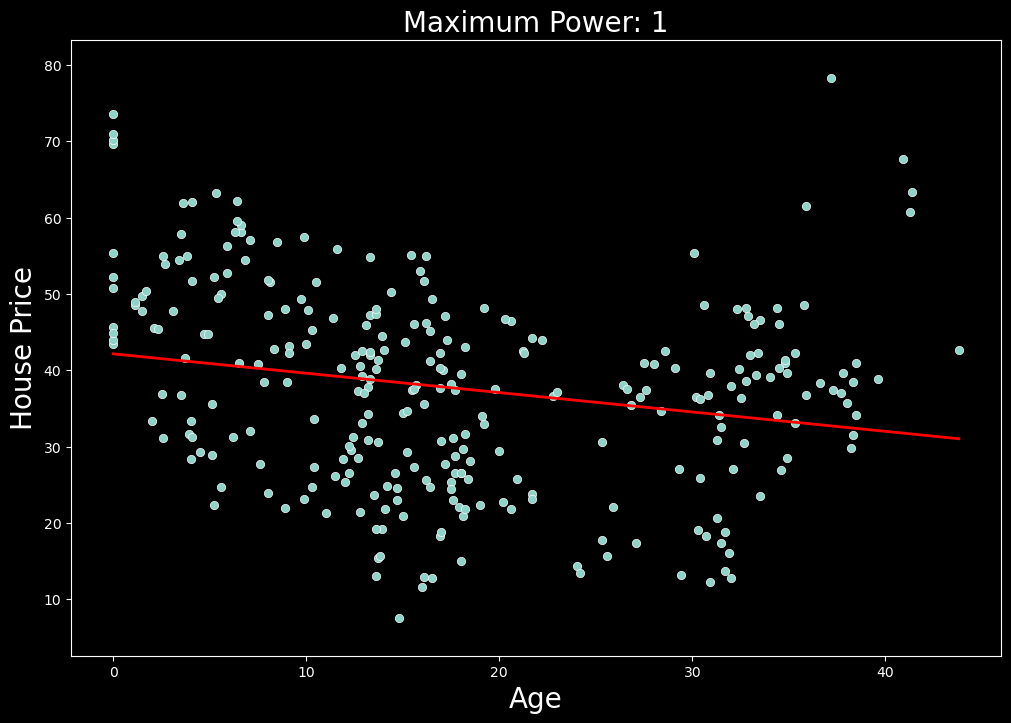

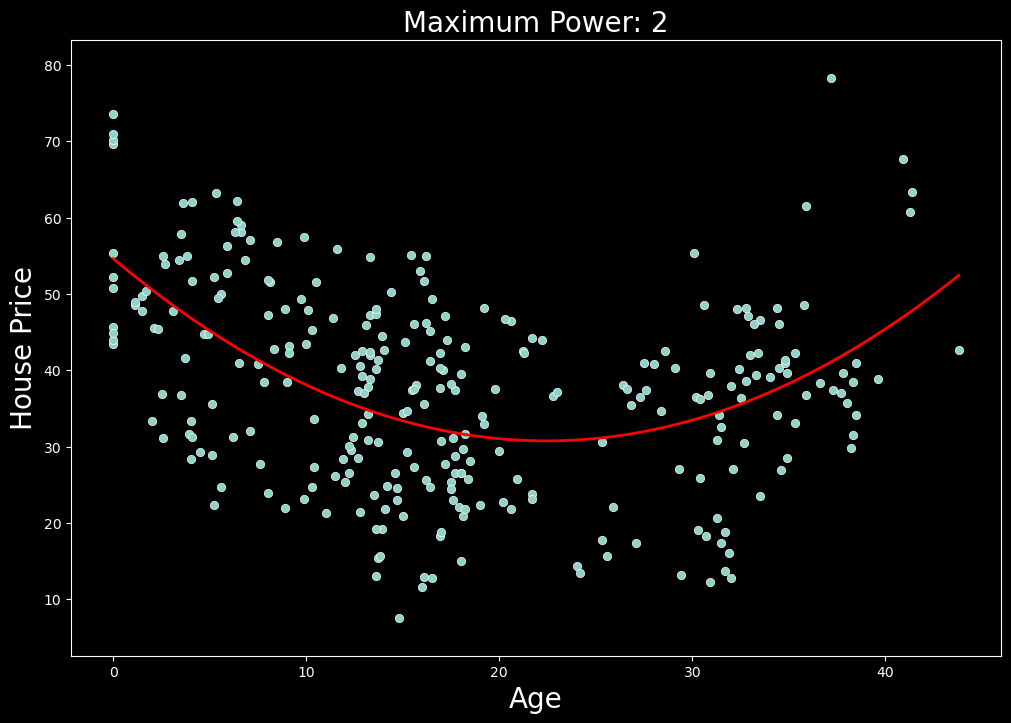

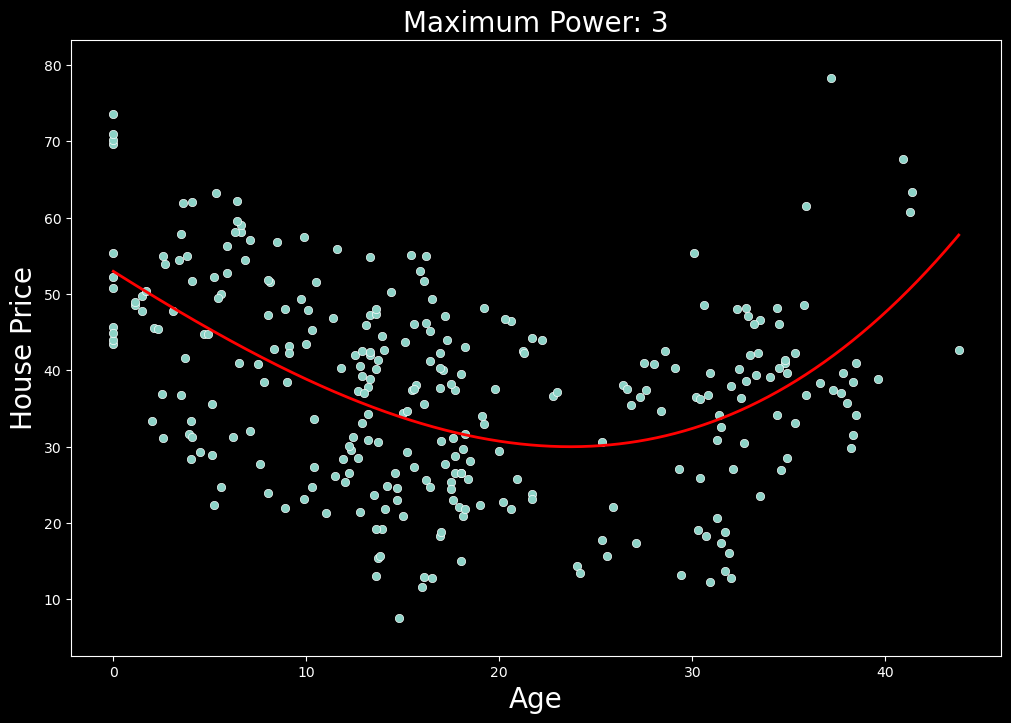

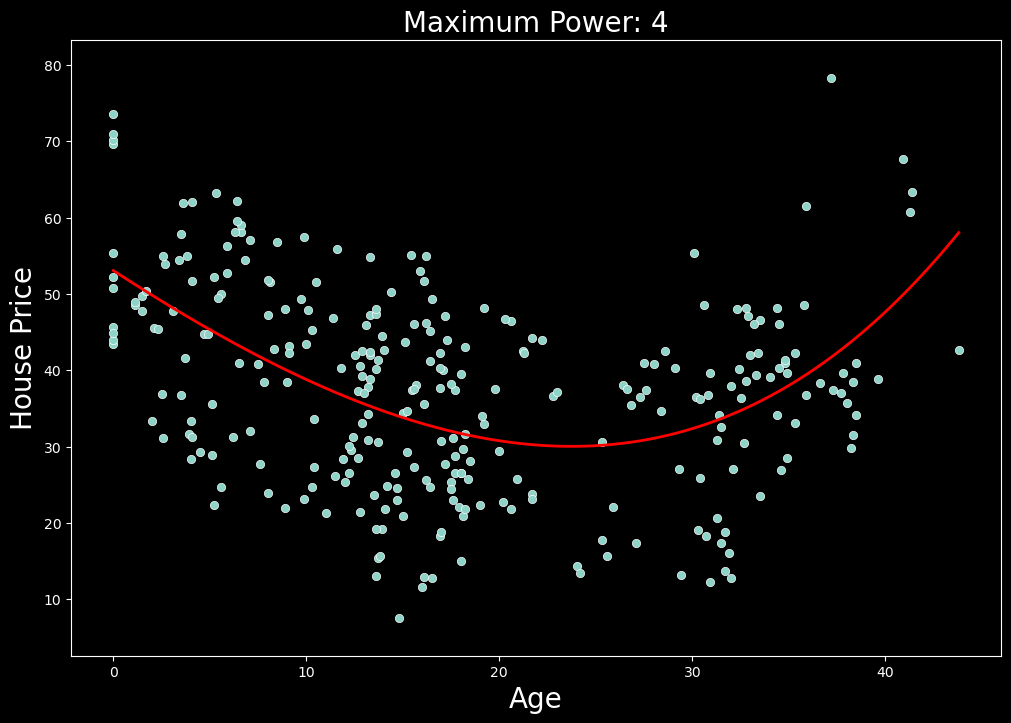

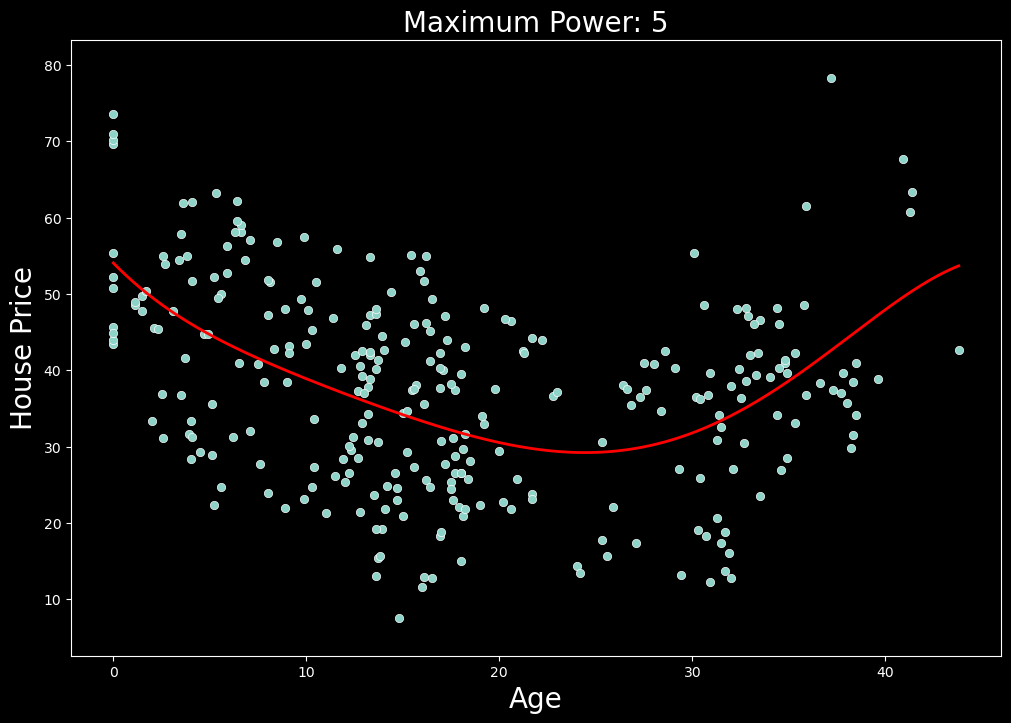

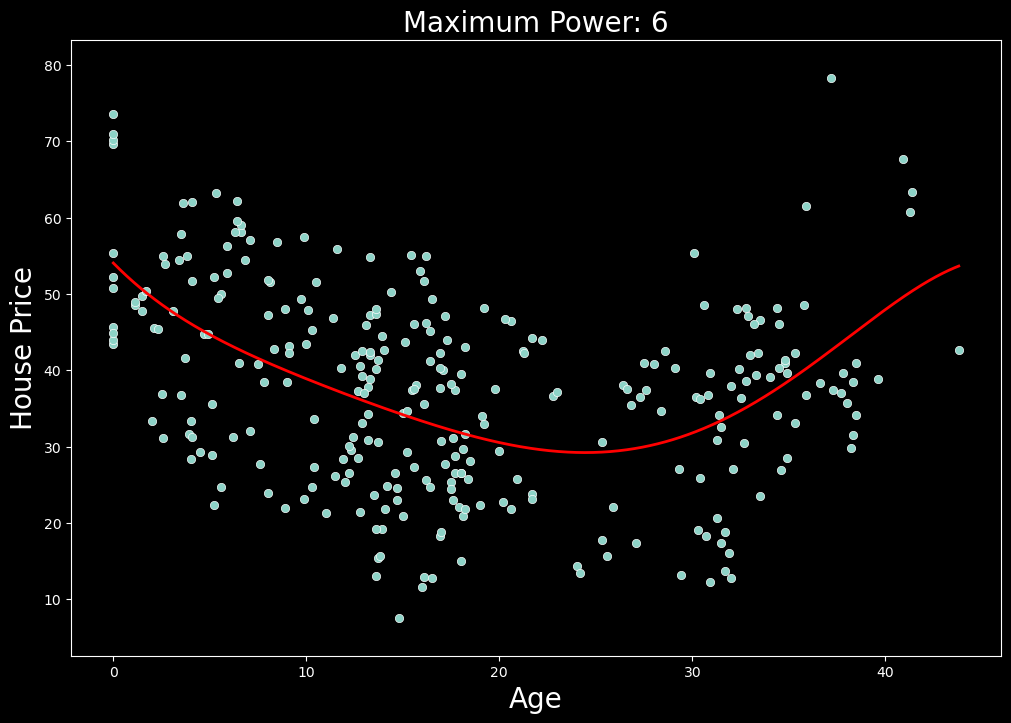

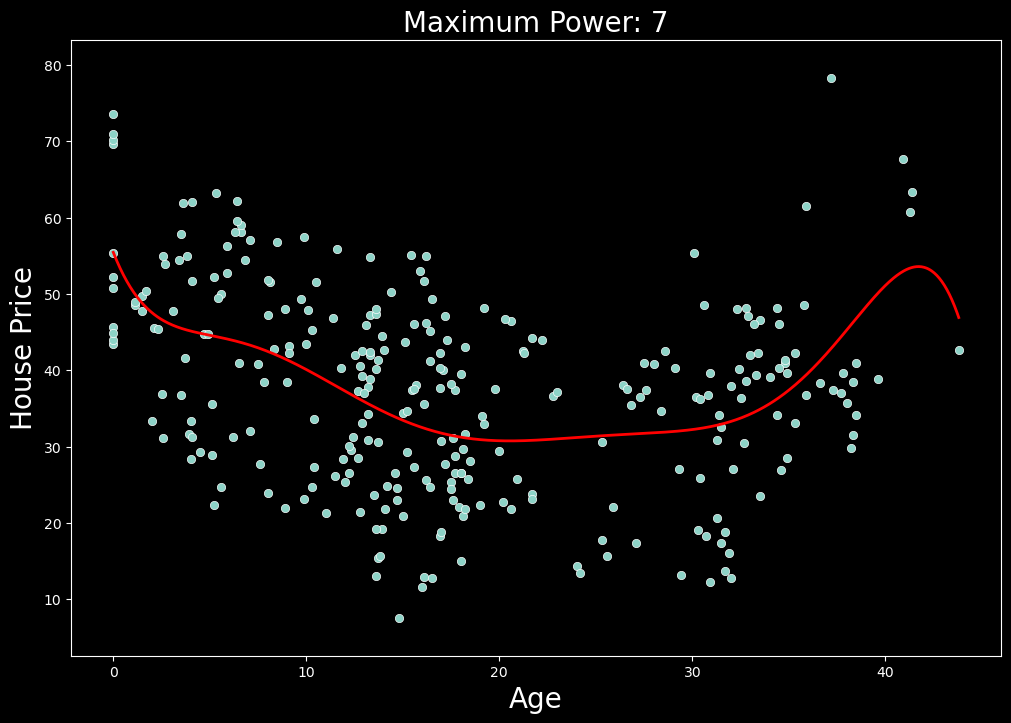

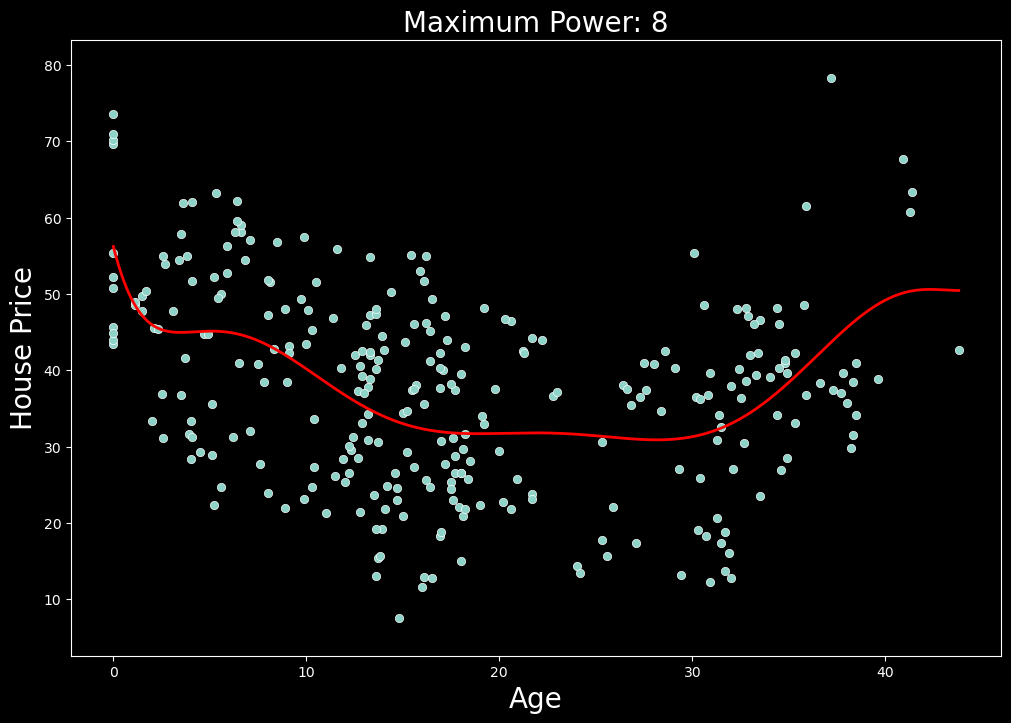

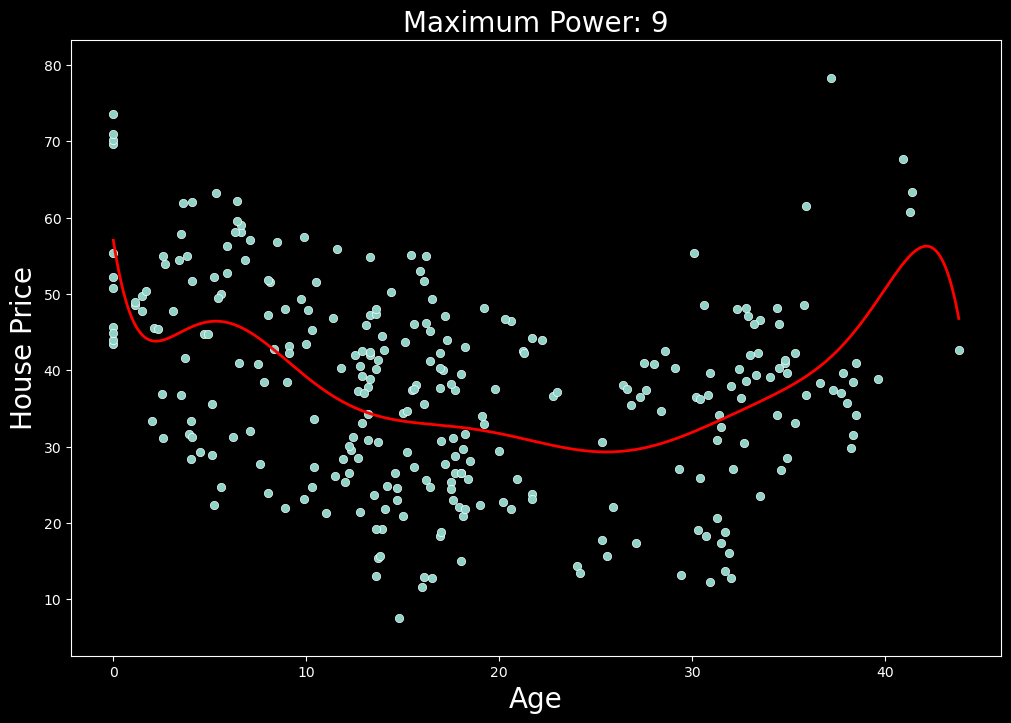

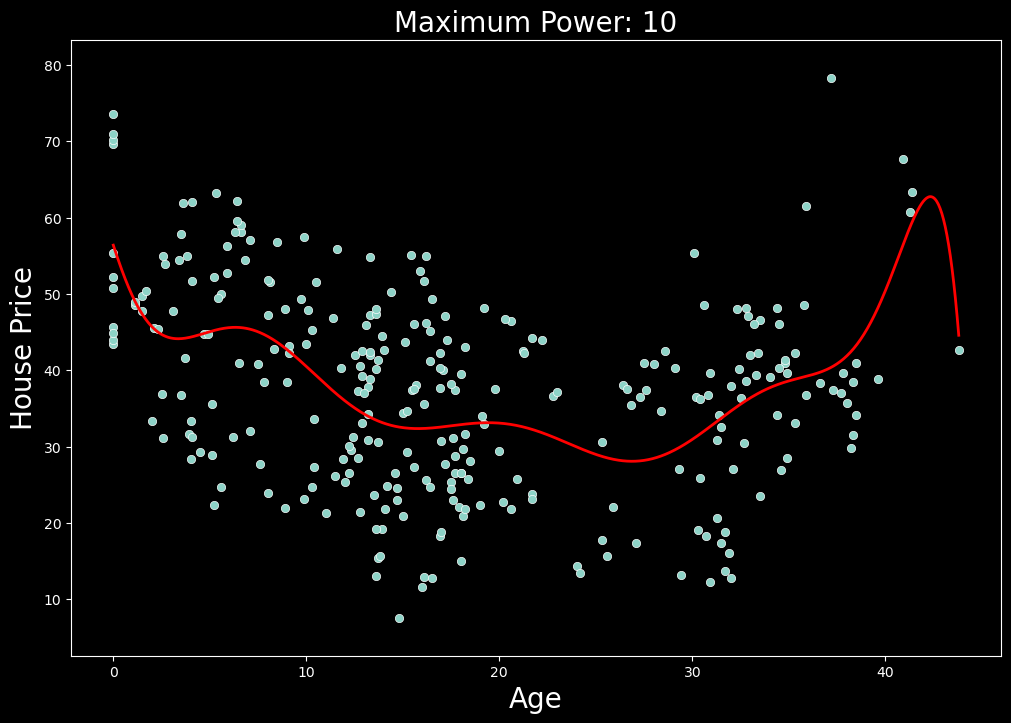

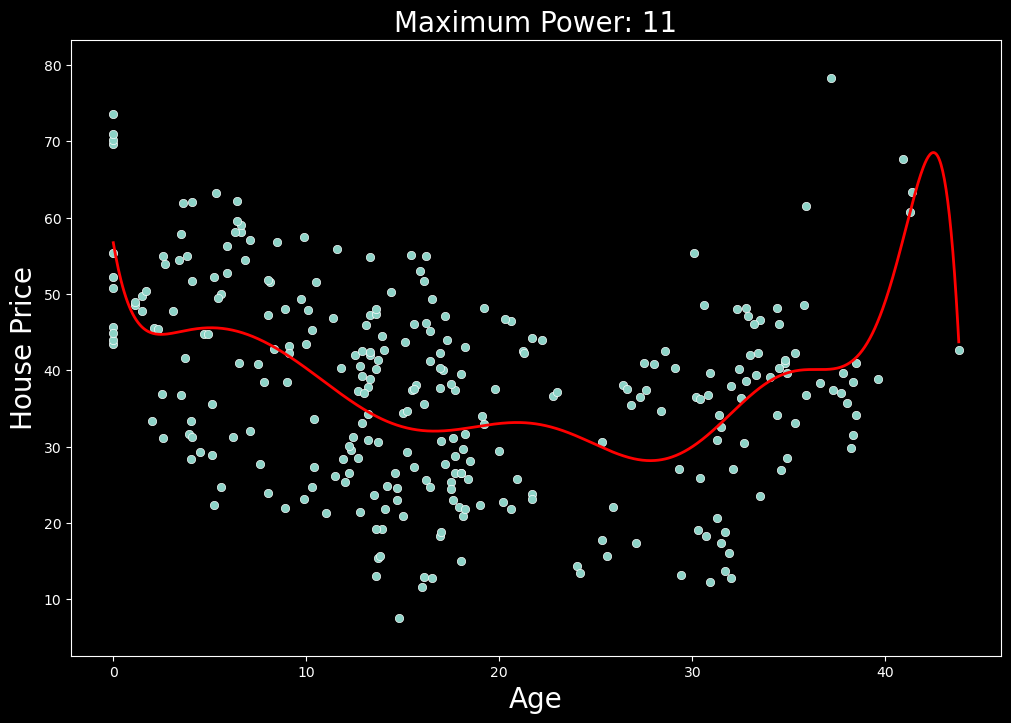

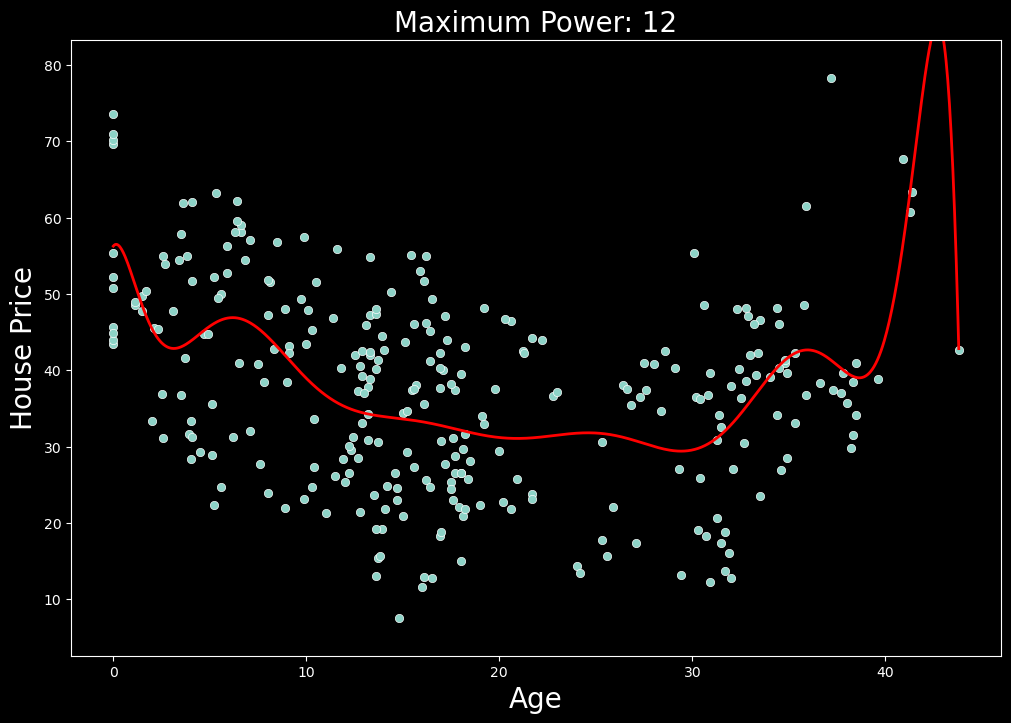

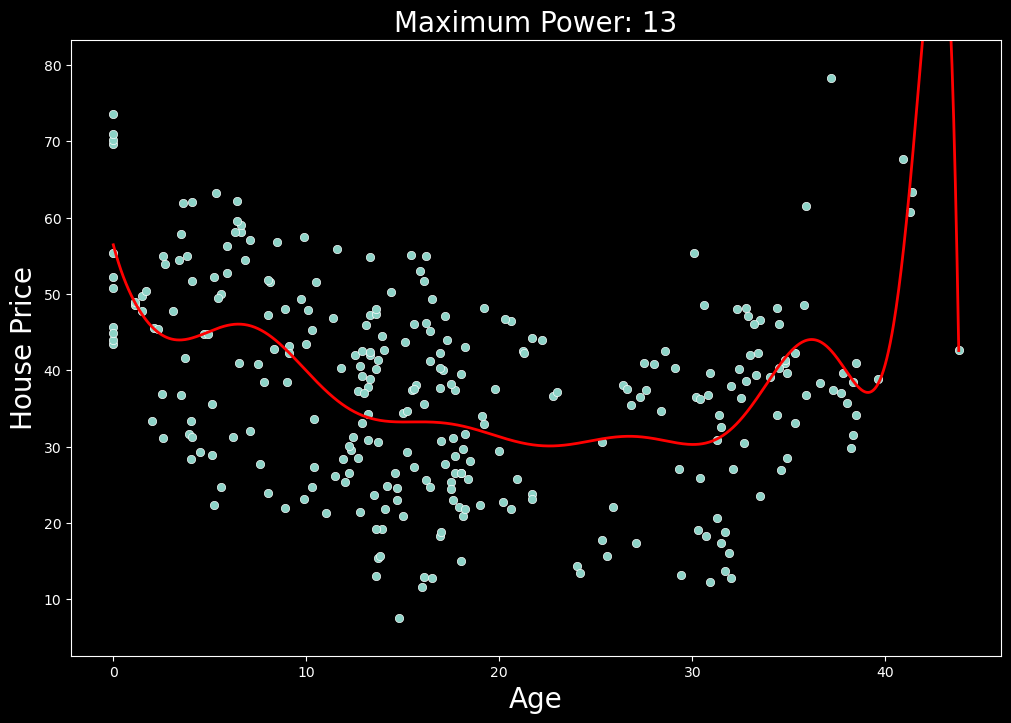

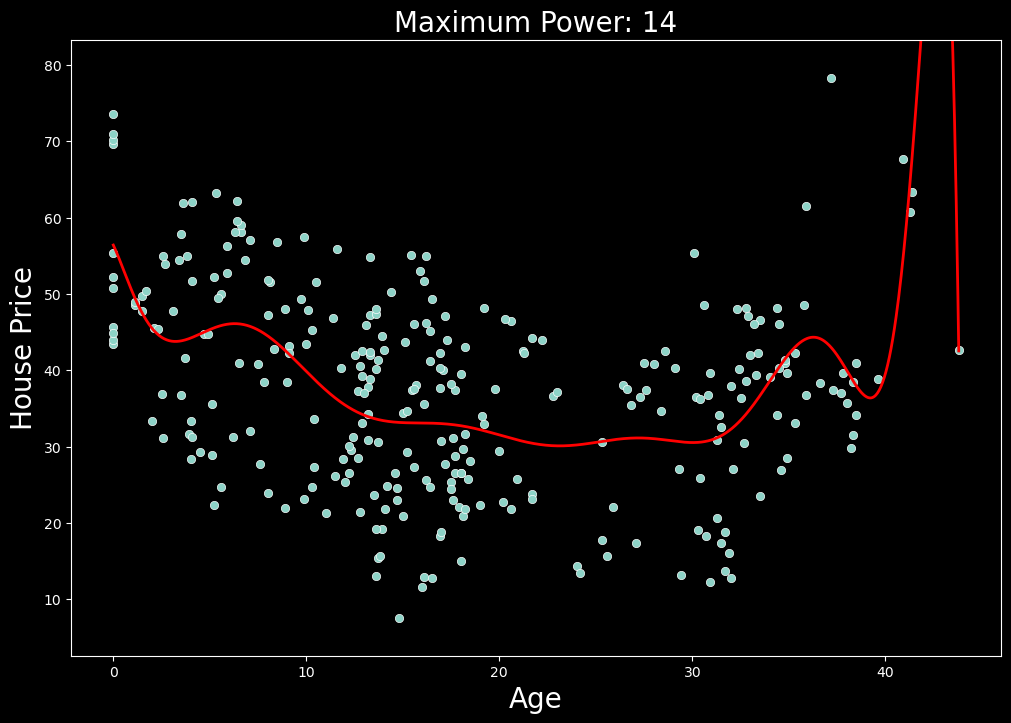

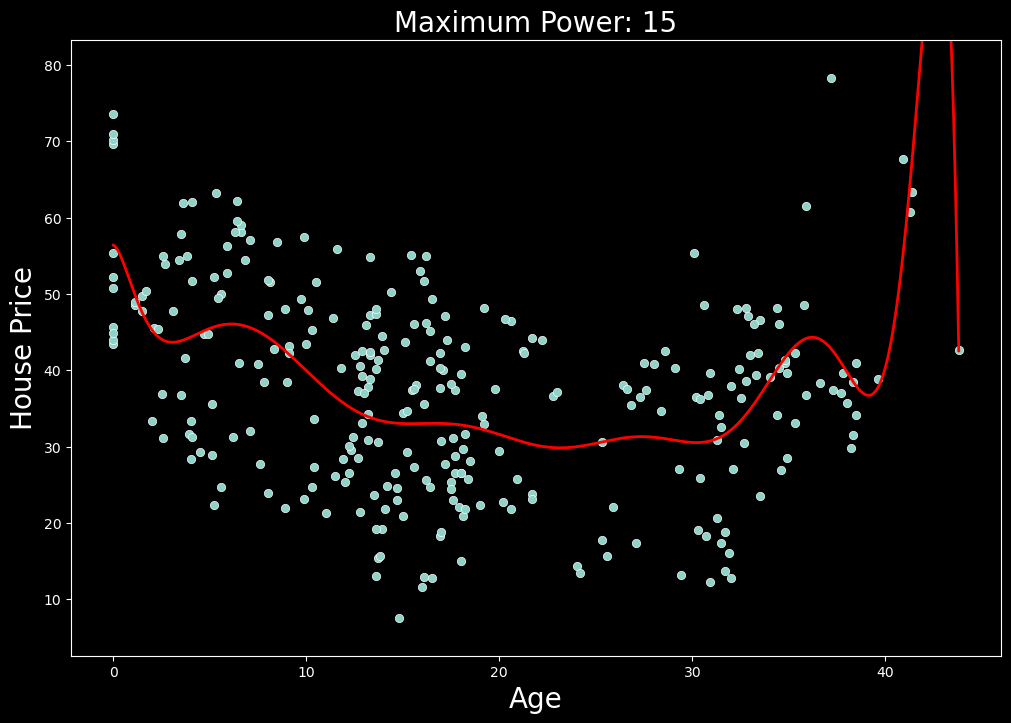

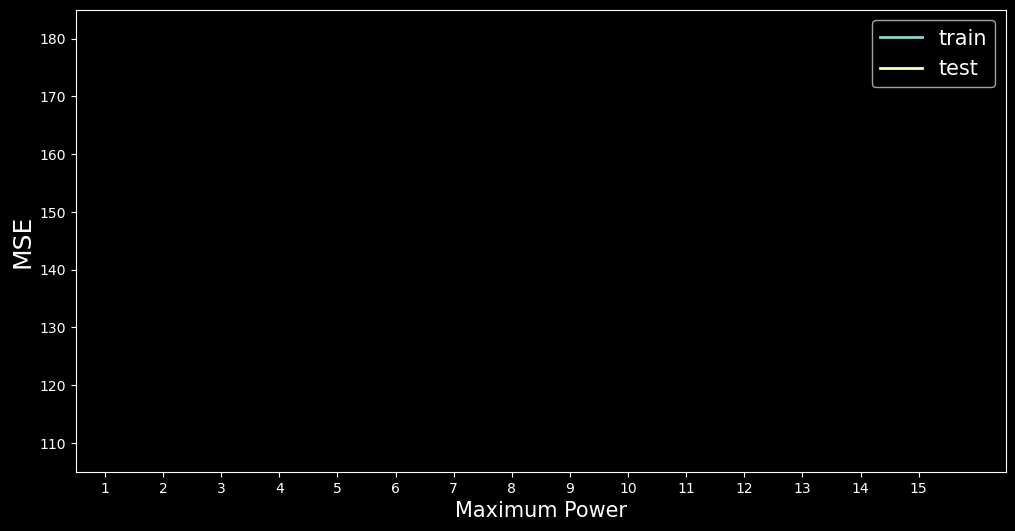

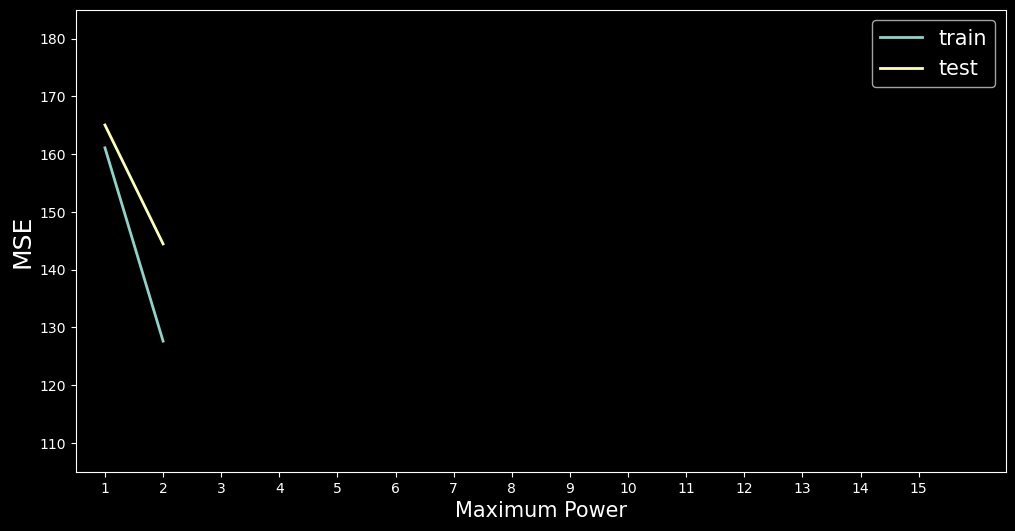

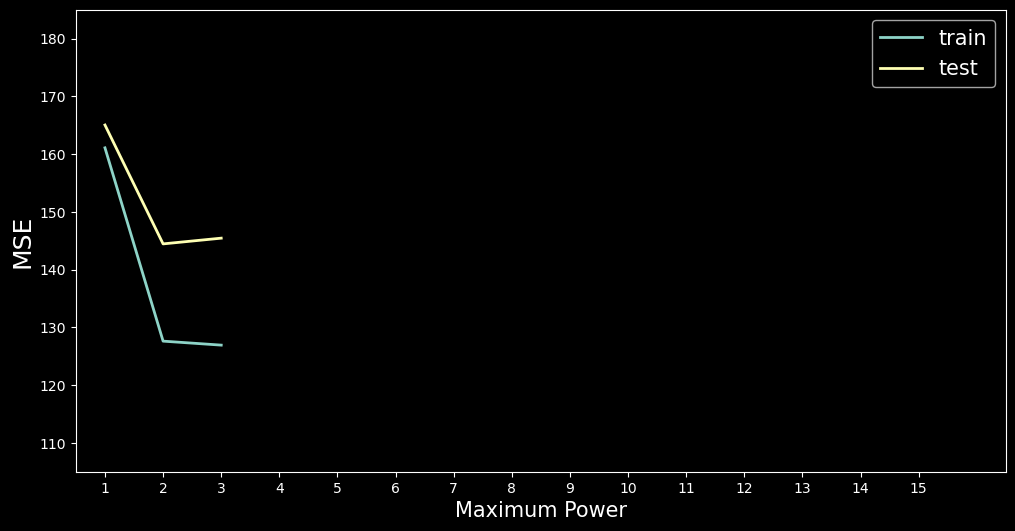

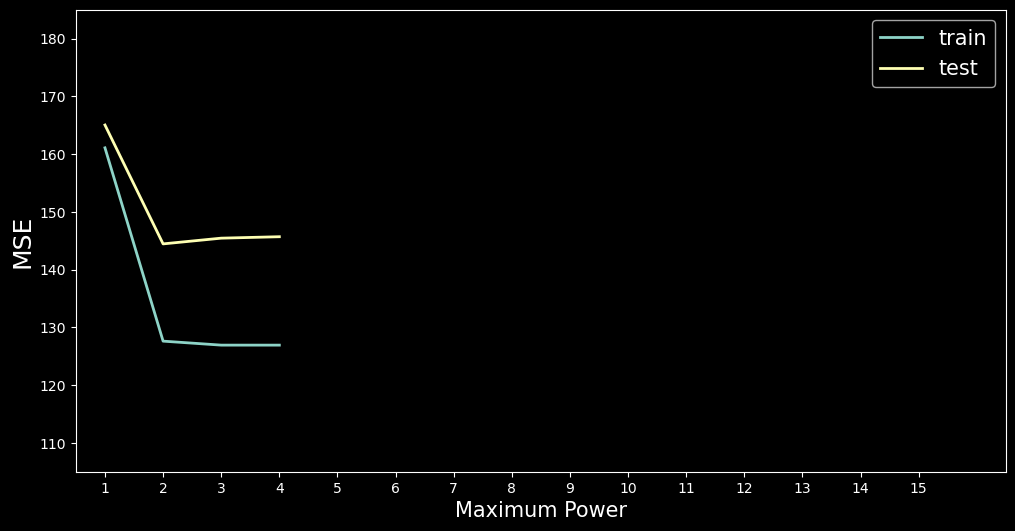

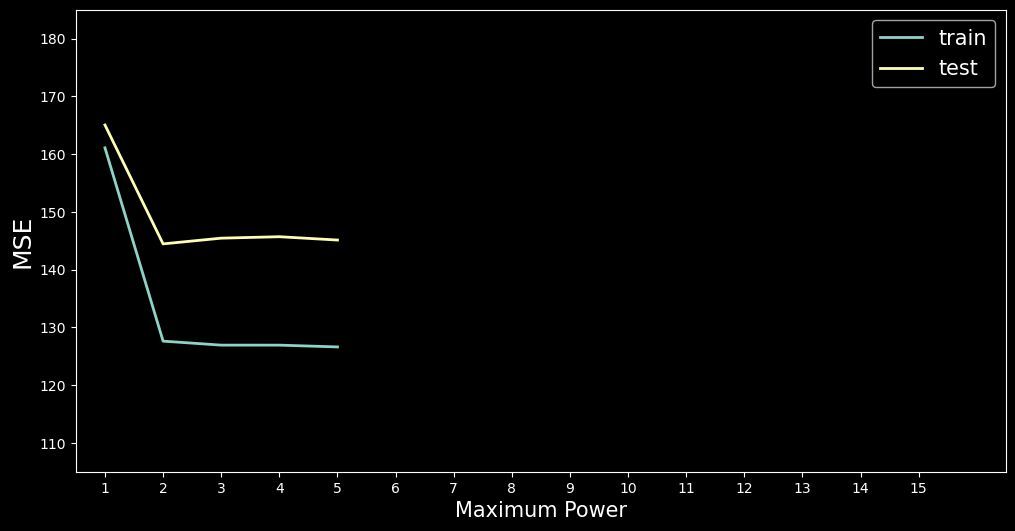

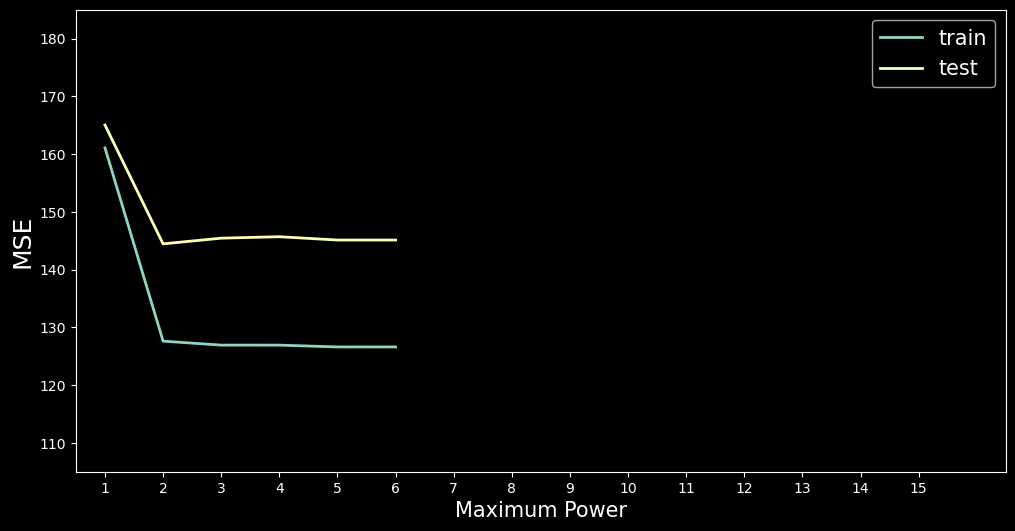

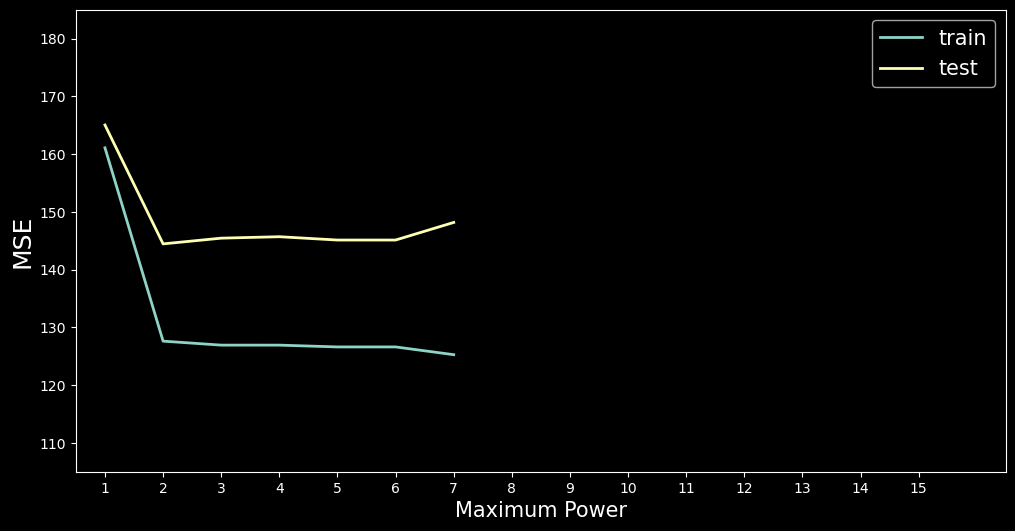

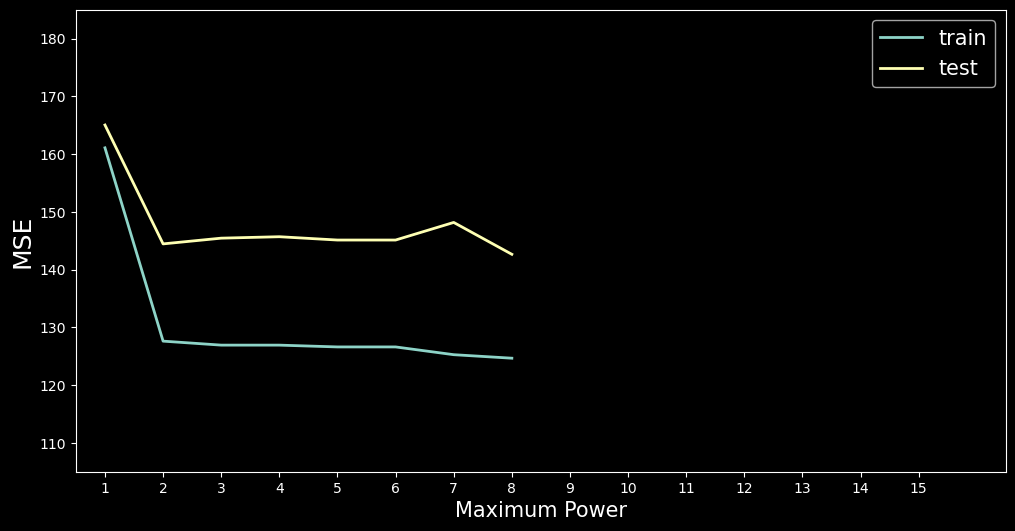

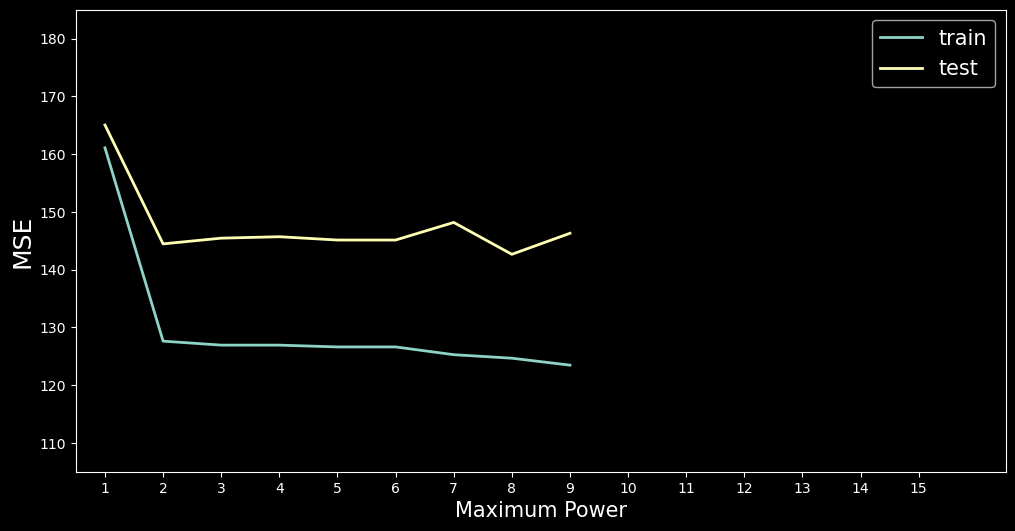

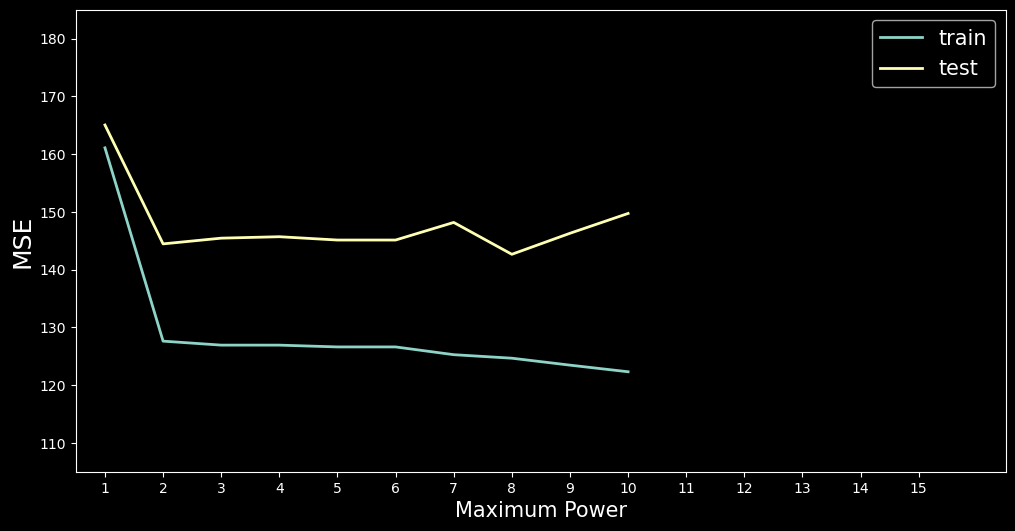

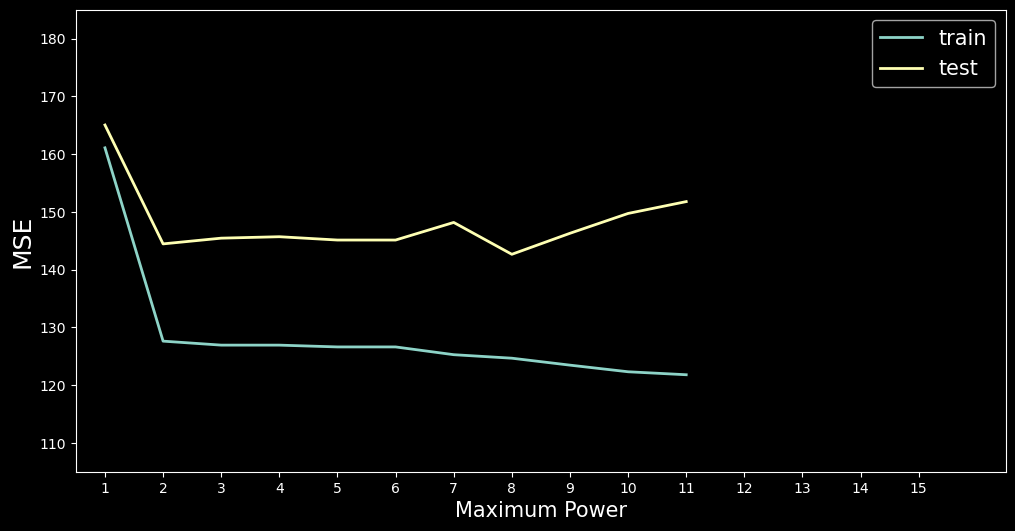

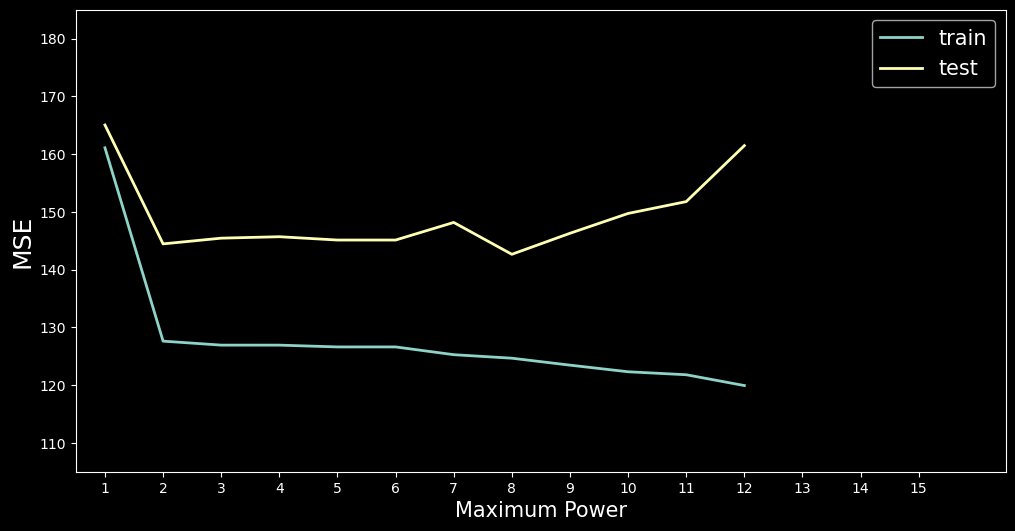

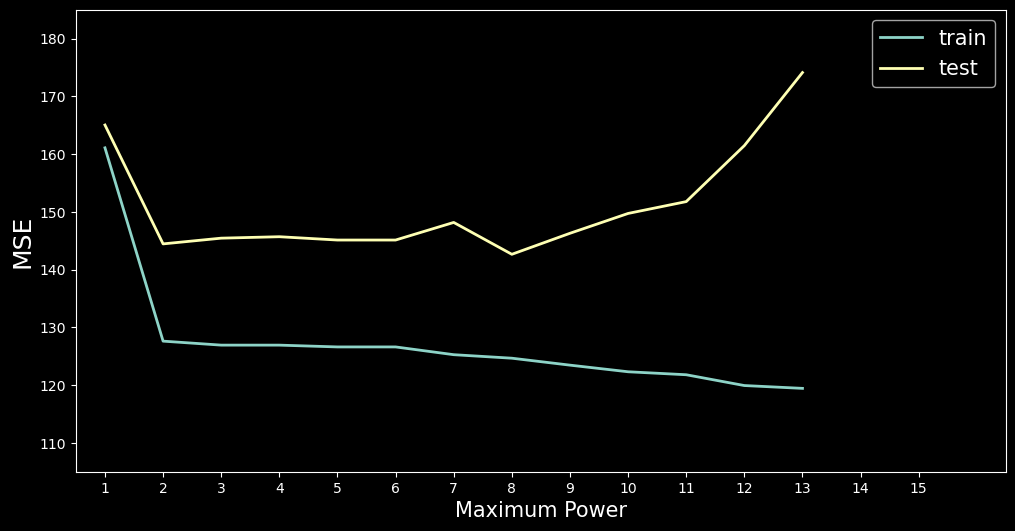

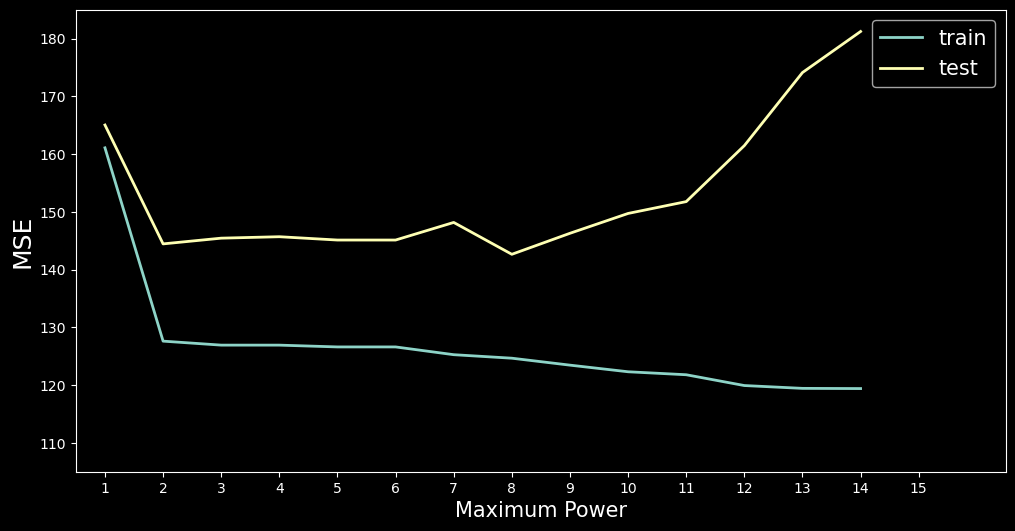

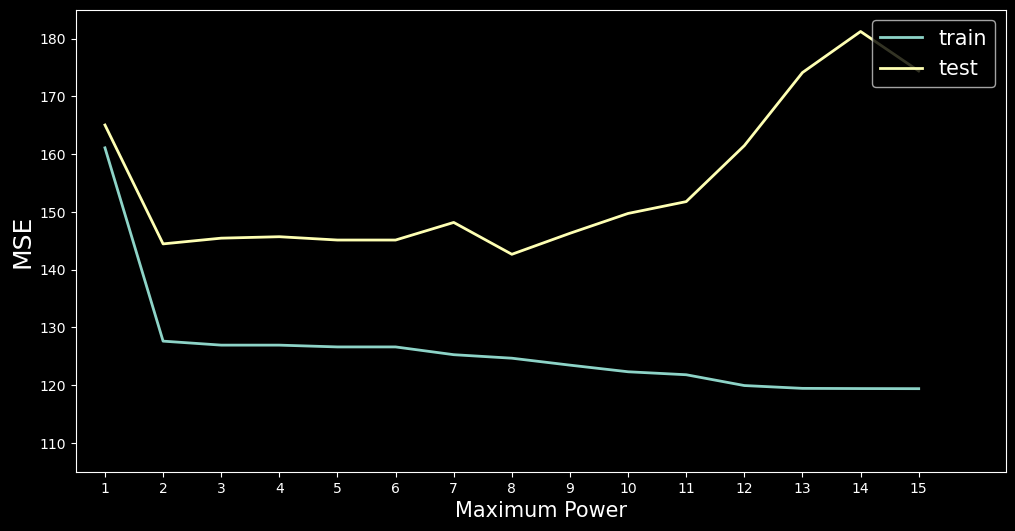

In [41]:
r=22
train = []
test = []
n = []
for i in range(1,16):
    model, train_mse, test_mse = regression(x,y,i,r)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)
    

for i in range(1,16):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE",size=18)
    plt.xlabel("Maximum Power",size=15)
    plt.xlim(0.5,16.5)
    plt.ylim(105,185)
    plt.xticks(n)

    plt.legend(loc =1,prop={'size': 15})

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)   

# Code for cover figure 

In [25]:
# Functions
def plot_prediction_cover(y_train,x_train,y_line,x_line):
    """
    Plot the prediction line of a regression model over training data
    """
    
    # plot data
    fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,8))
    plt.ylim(min(y_train)-100, max(y_train)+100)
    sns.scatterplot(x=np.array(x_train)[:,1], y=y_train)

    # plot prediciton line        
    plt.plot(x_line['x'],y_line, 'r-', lw=2)
    
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.axis('off')
    
    plt.savefig('../figures/poly/pred_line{}.png'.format(i),format='png',dpi=150)
    
def regression(x,y,n,r=101):
    
    """
    Construct polynomial regression model with maximum power = n and create summary plots
    """
    x = sm.add_constant(x)
    
    # Prediction line data 
    x_line = np.linspace(min(x['x']), max(x['x']), 1000)
    x_line = pd.DataFrame(data=x_line, columns=["x"])
    x_line  = sm.add_constant(x_line)
    
    for i in range(1,n+1):
        if i != 1:
            x['x{}'.format(i)] = x['x']**i

            x_line['x{}'.format(i)] = x_line['x']**i
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = r)

    # fit model 
    model = sm.OLS(y_train,x_train).fit()
    
    # Predictions
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    y_line = model.predict(x_line)
    
    # Plots and MSE
    plot_prediction_cover(y_train,x_train,y_line,x_line)
    # plot_fit(y_train,pred_train,y_test,pred_test)
    train_mse, test_mse = MSE(y_train,pred_train,y_test,pred_test)

    
    return model,train_mse, test_mse  

15) Train:30121.79 Test:43859.15


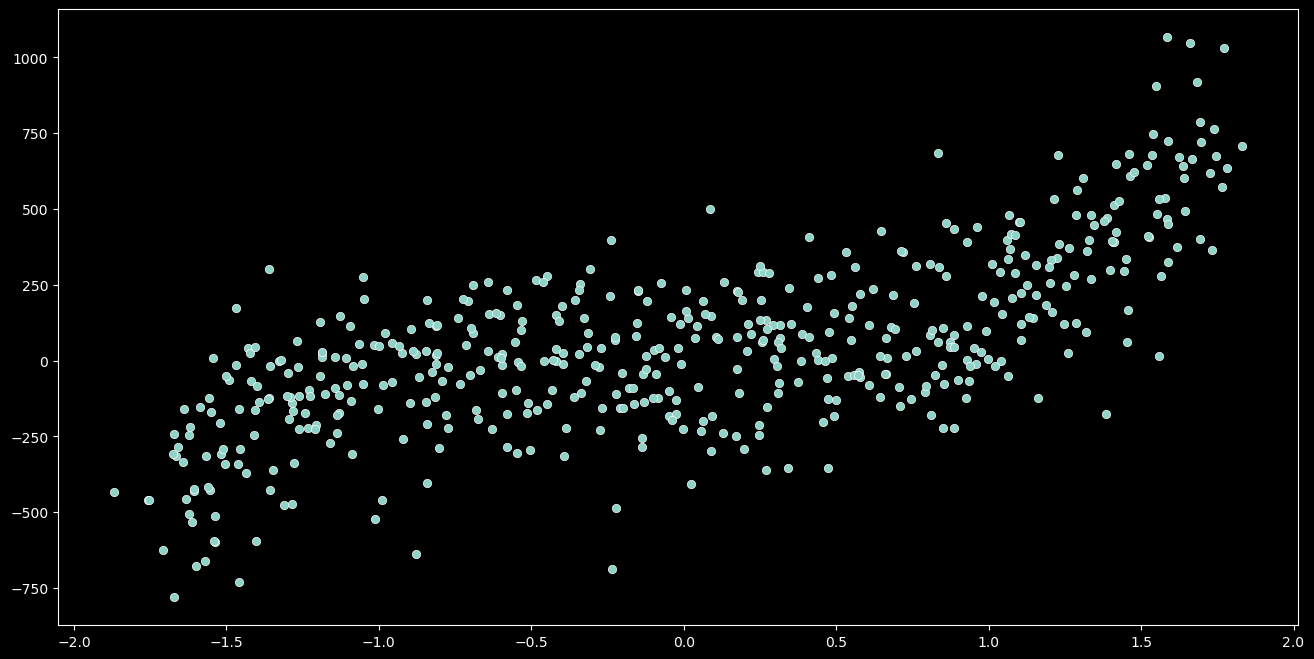

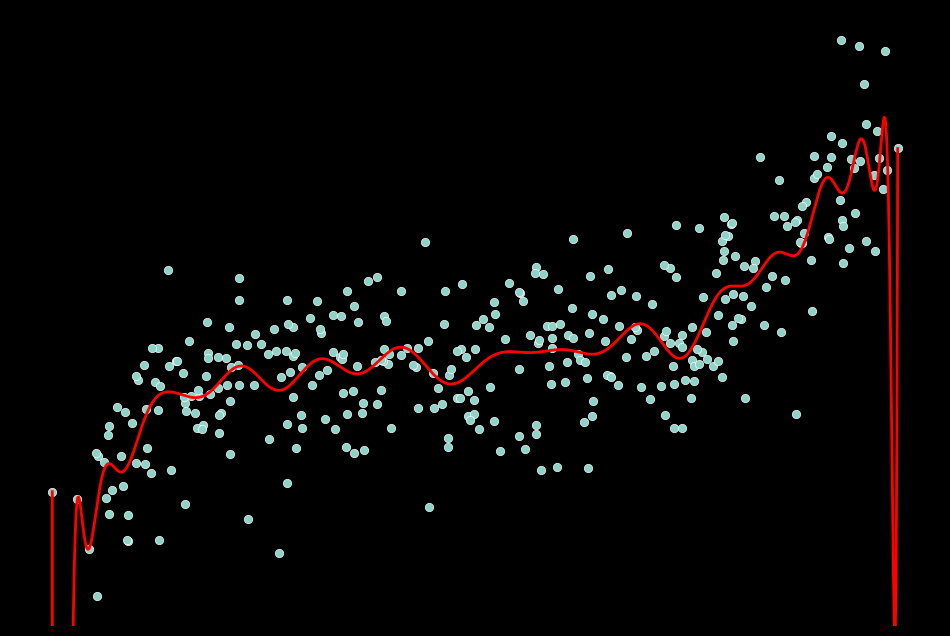

In [26]:
# Generate data
a = 500
x = [round(x,2) for x in np.linspace(-10, 10, a)+ 0.5*np.random.randn(a)]

x = np.array(x)
noise = np.random.randn(a)
#y = -0.5*x**3 + x**2+x+1 + noise
y = 0.5*x**3 + x**2 + 2*x + 1 + 200*noise

x = (x-np.mean(x))/np.std(x)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,8))
sns.scatterplot(y = y,x = x)

data = pd.DataFrame(data=x, columns=["x"])
data['y'] = y

x = data['x']
y = data['y']

model, train_mse, test_mse = regression(x,y,35)

MSE
___
1) Train:42594.37 Test:47734.35
2) Train:40758.89 Test:45853.82
3) Train:33512.86 Test:38569.68
4) Train:33493.89 Test:38445.38
5) Train:33480.28 Test:38453.71
6) Train:33461.98 Test:38500.41
7) Train:33432.97 Test:38325.77
8) Train:33410.46 Test:38359.46
9) Train:33357.02 Test:38476.6
10) Train:33278.37 Test:38545.52
11) Train:32852.01 Test:39922.45
12) Train:32844.19 Test:40198.16
13) Train:32837.87 Test:40021.16
14) Train:32832.33 Test:40078.26
15) Train:32824.26 Test:39920.29
16) Train:32824.26 Test:39922.15
17) Train:32795.25 Test:39642.22
18) Train:32682.61 Test:40578.38
19) Train:32518.2 Test:40696.68
20) Train:32513.12 Test:41016.22


/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_18954/581582995.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(12,8))


21) Train:32286.33 Test:51920.21
22) Train:32225.78 Test:64104.0
23) Train:31902.82 Test:128767.23
24) Train:31684.96 Test:66506.45
25) Train:31664.69 Test:86404.66
26) Train:31601.79 Test:52944.43
27) Train:31586.2 Test:44307.69
28) Train:31527.65 Test:74661.35
29) Train:31527.57 Test:71335.21
30) Train:31152.76 Test:1252440.06
31) Train:31071.75 Test:321272.56
32) Train:30833.52 Test:784877.79
33) Train:30832.27 Test:332946.4
34) Train:30879.85 Test:3690169.02
35) Train:30812.12 Test:46505.13
36) Train:30973.38 Test:7095781.88
37) Train:30714.16 Test:1040756.23
38) Train:31014.88 Test:6169370.58
39) Train:30820.59 Test:10920026.9
40) Train:30956.45 Test:672341.73
41) Train:30839.61 Test:3904945.77
42) Train:30839.06 Test:7837189.04
43) Train:30808.03 Test:14642096.94
44) Train:30936.79 Test:486890.27
45) Train:30838.93 Test:39737828.99
46) Train:30864.24 Test:37249387.72
47) Train:30858.27 Test:127745869.79
48) Train:30841.94 Test:326982340.68
49) Train:31038.46 Test:79858679.66


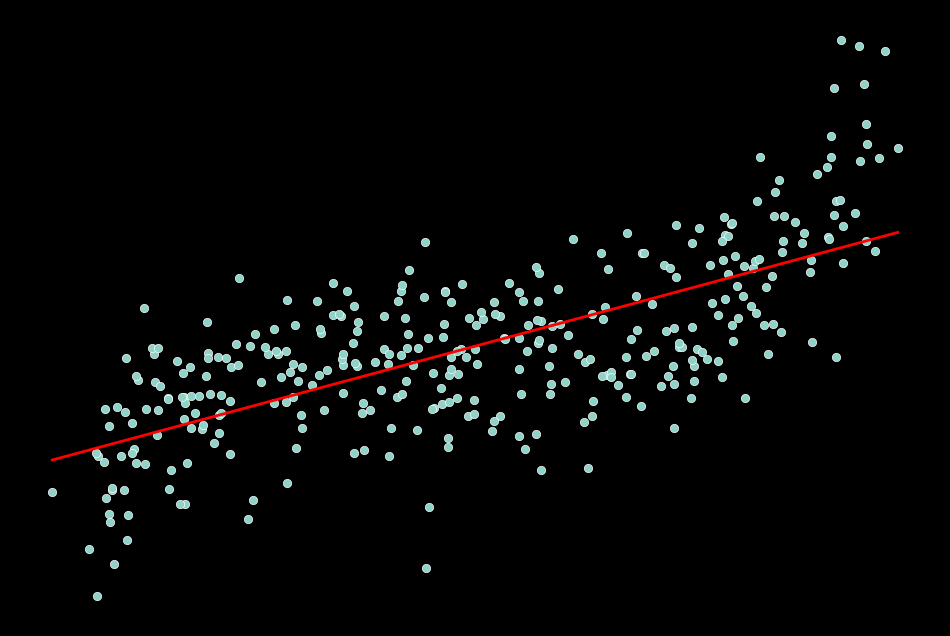

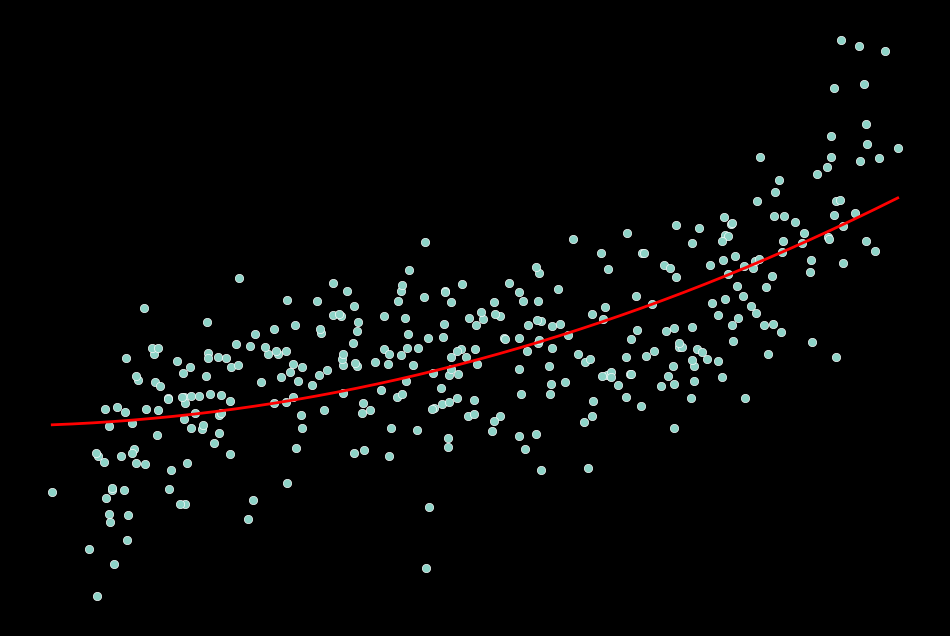

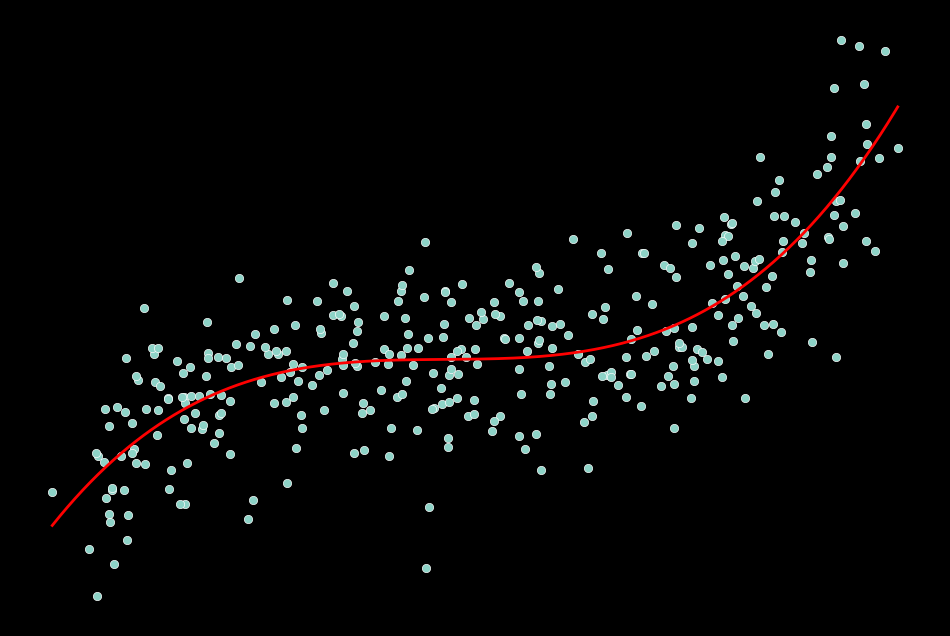

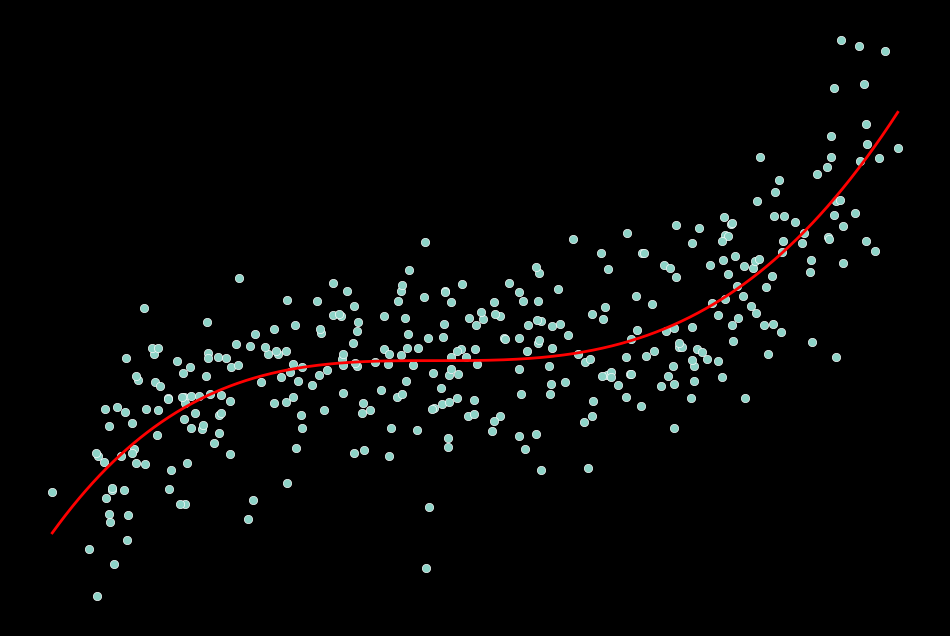

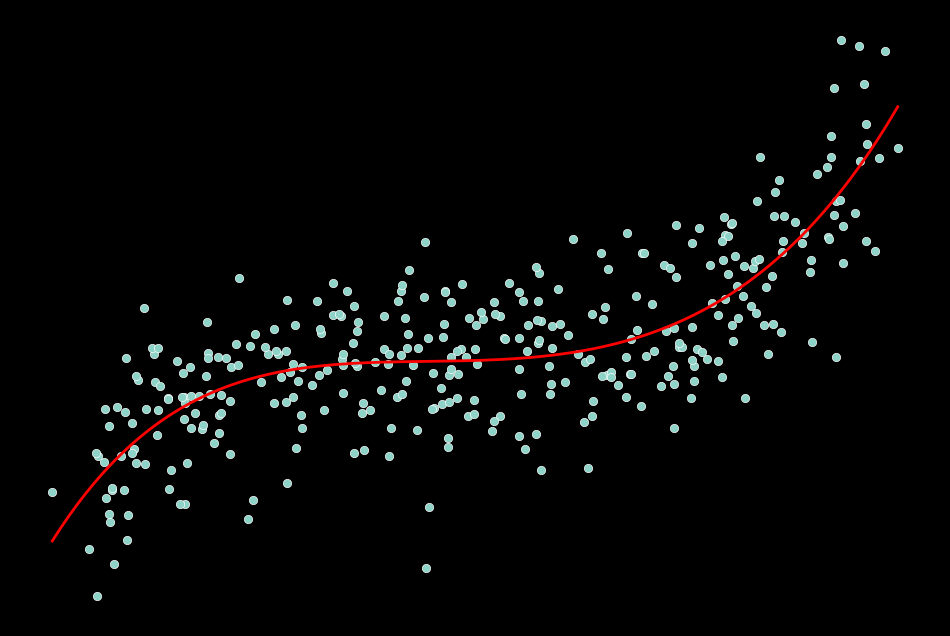

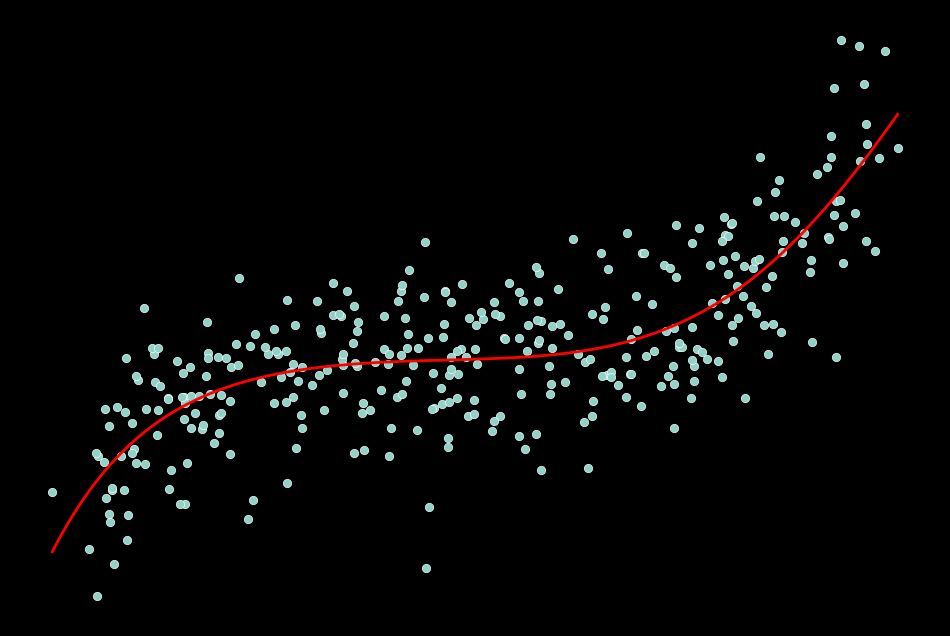

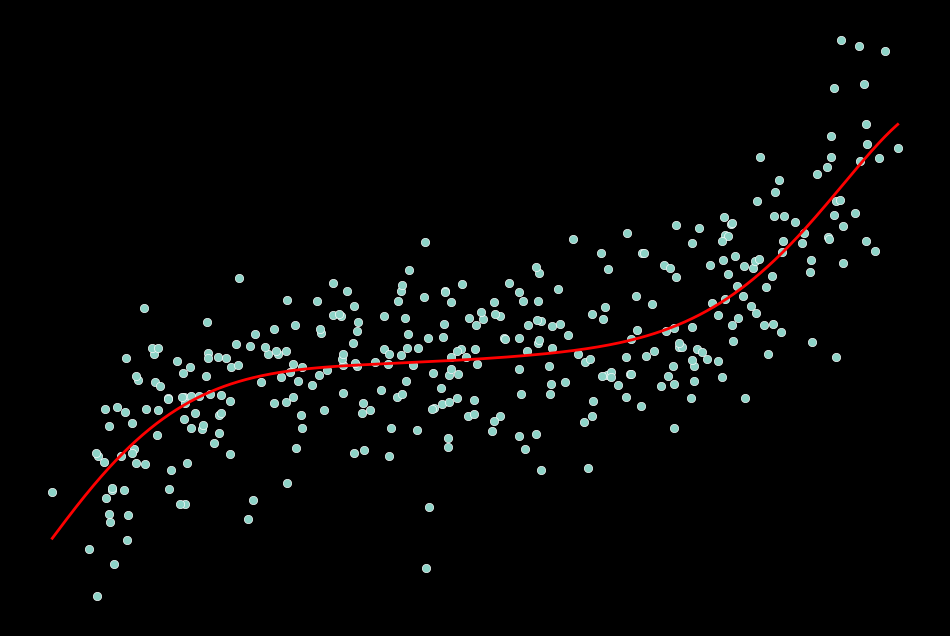

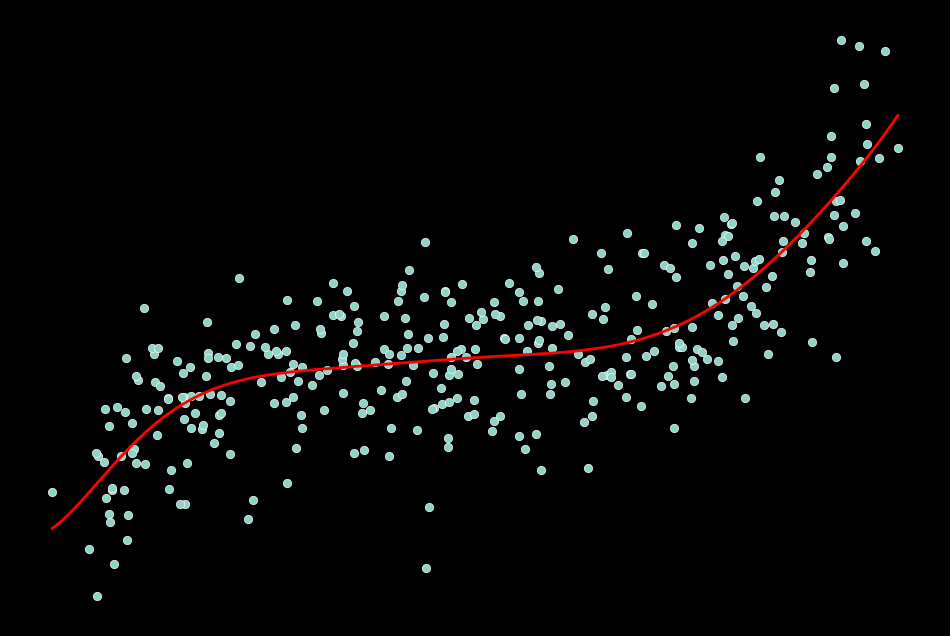

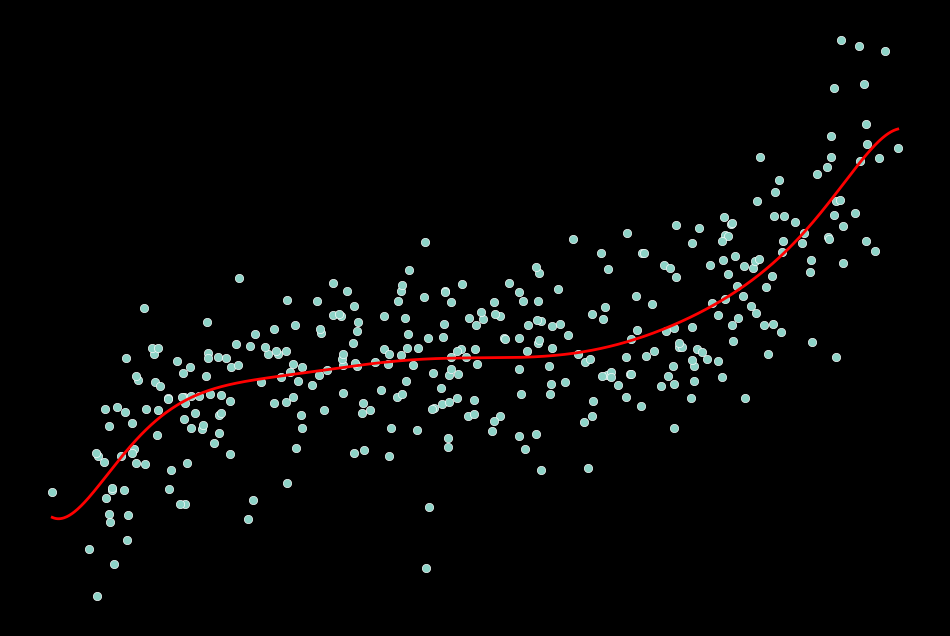

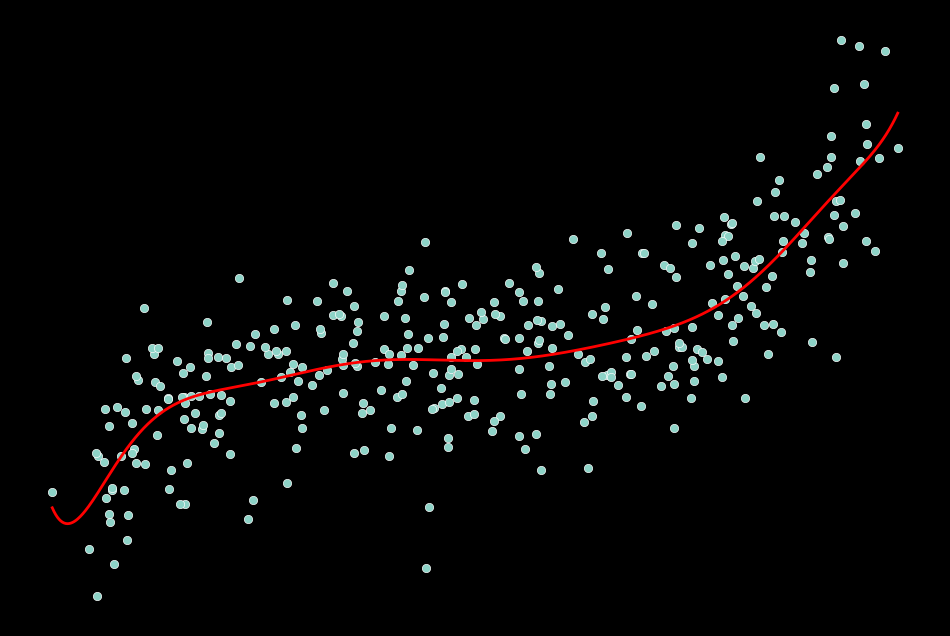

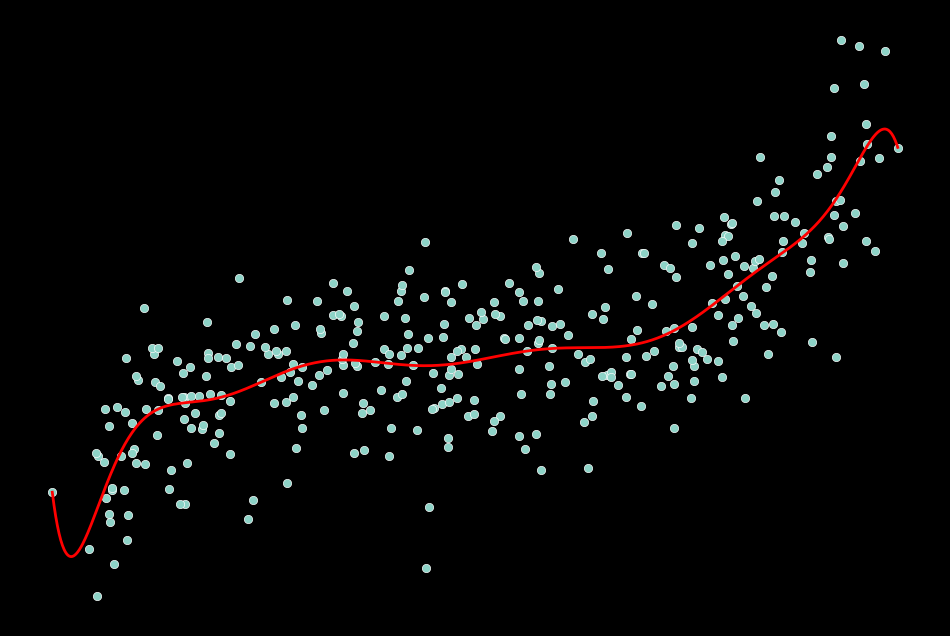

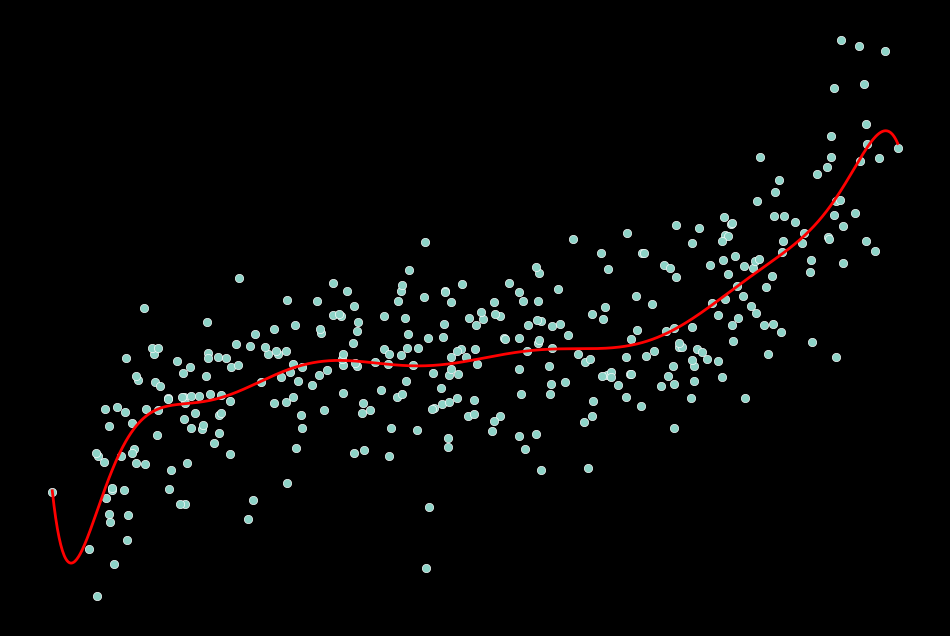

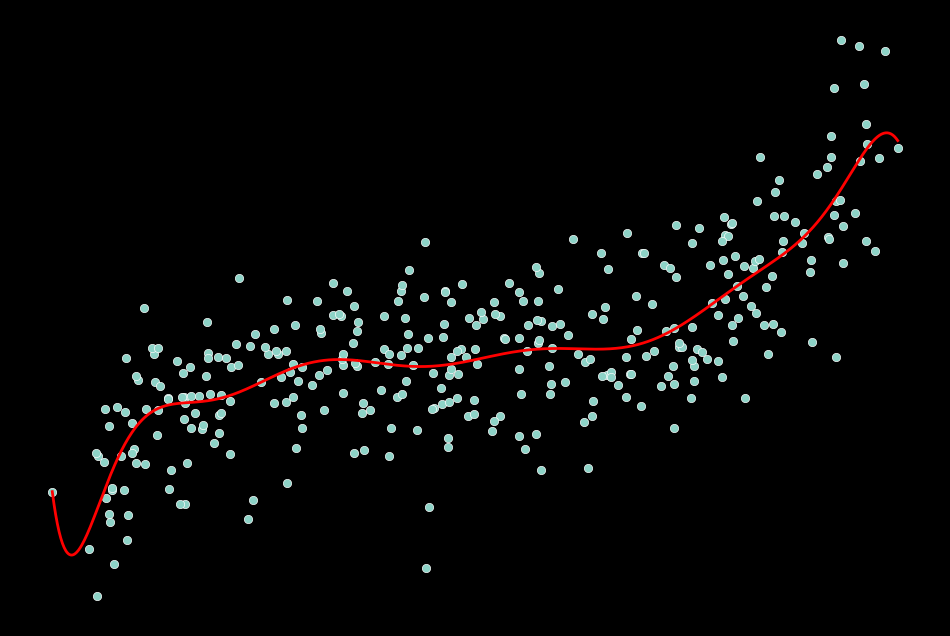

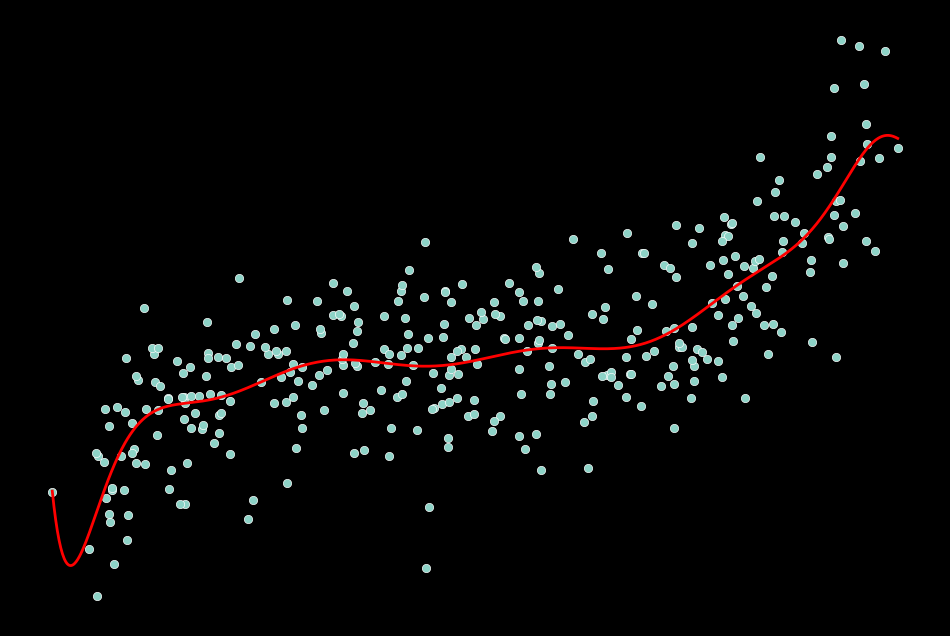

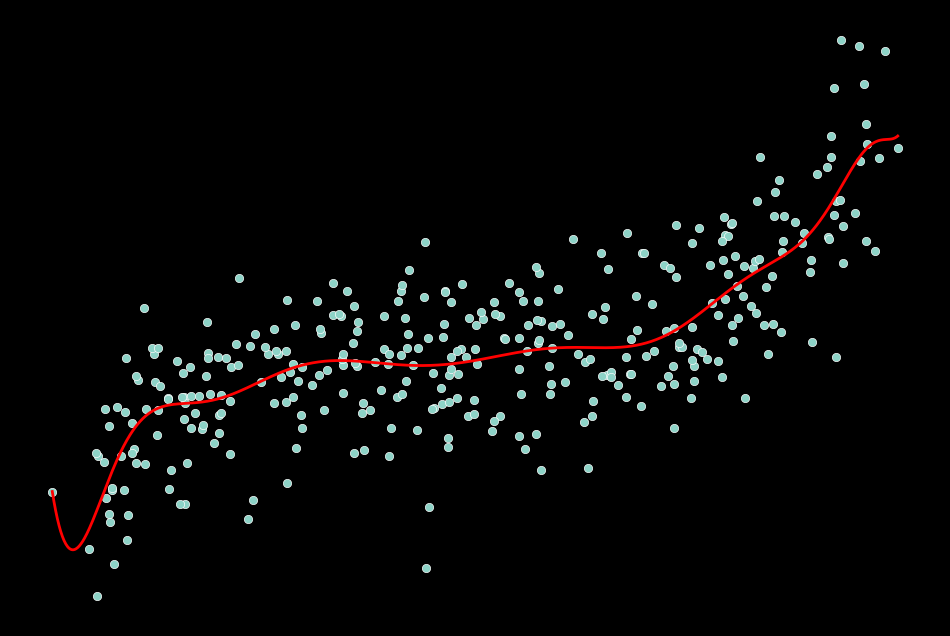

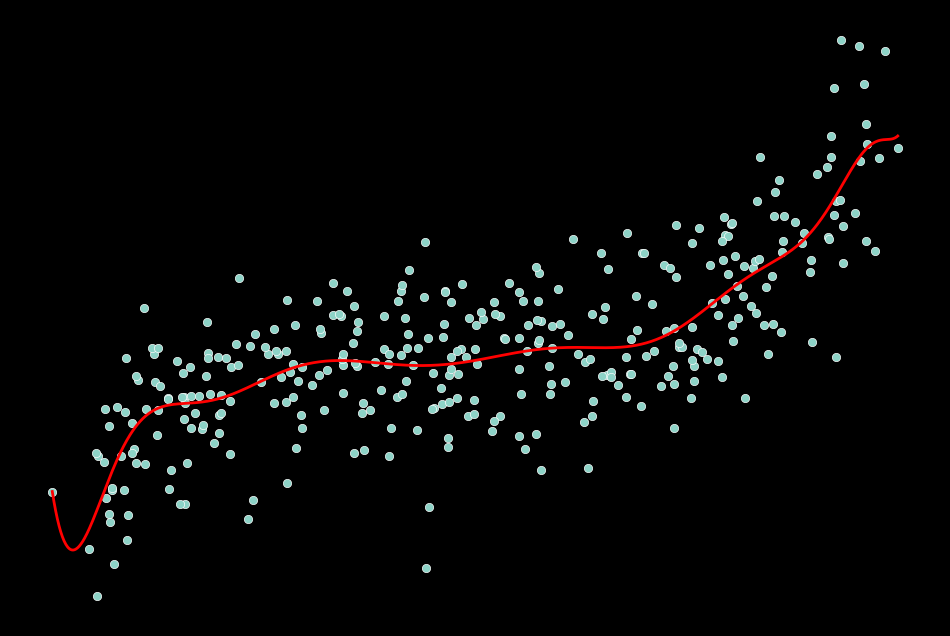

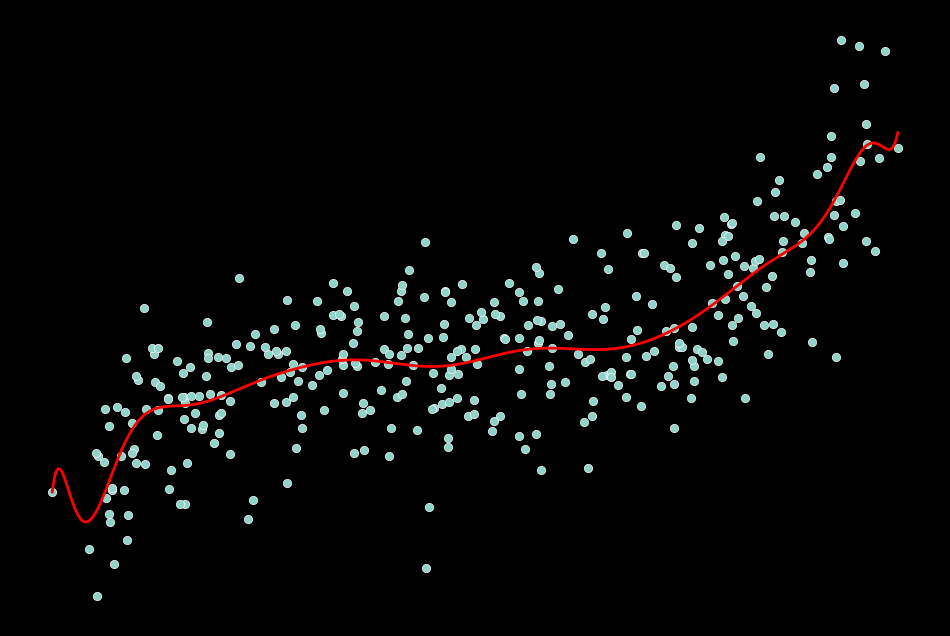

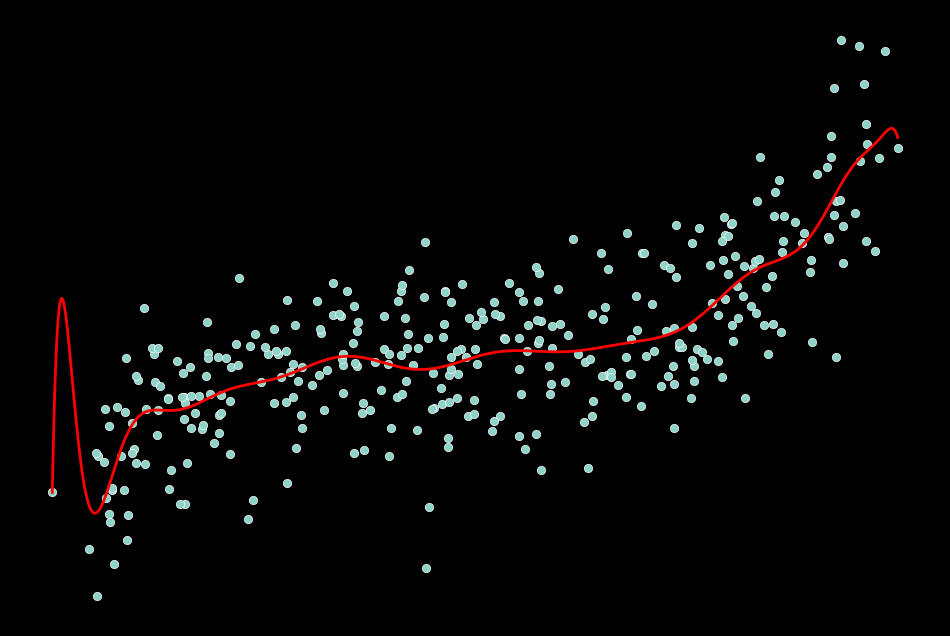

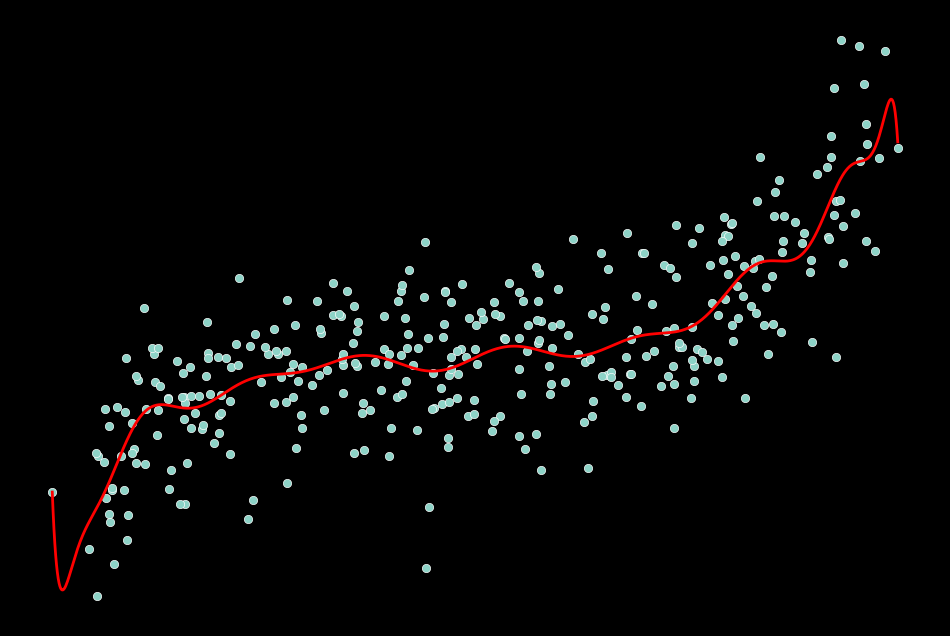

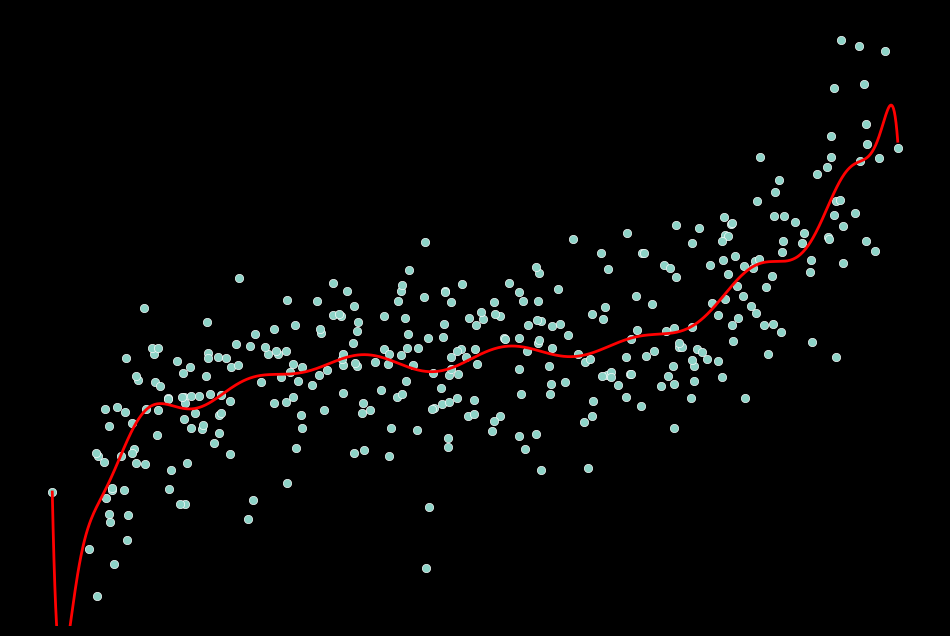

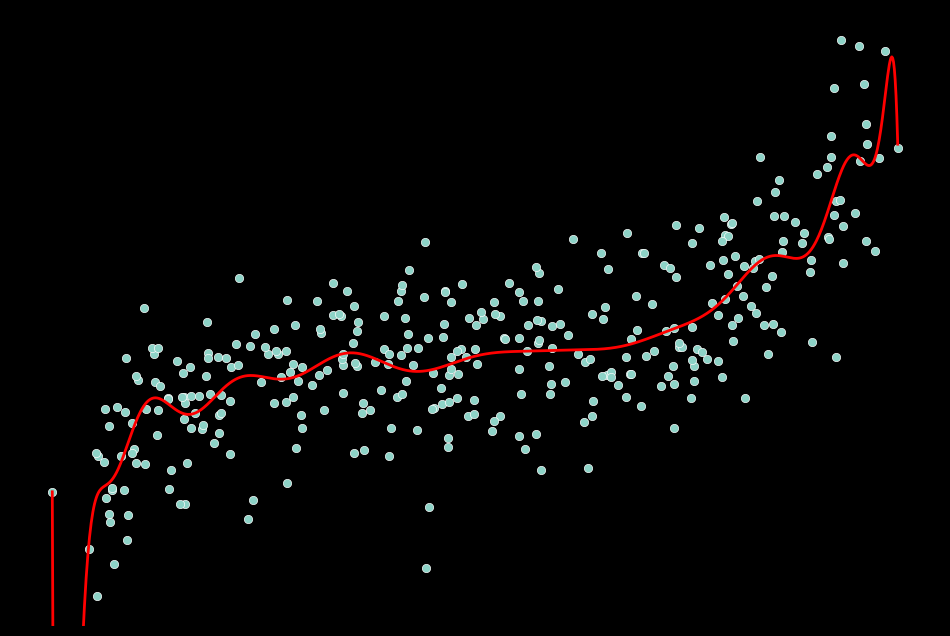

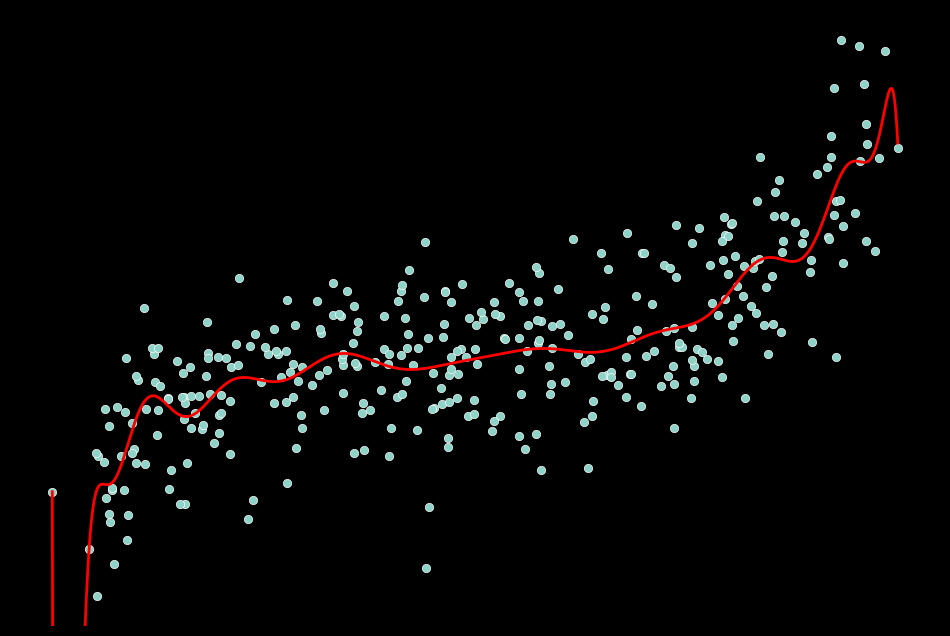

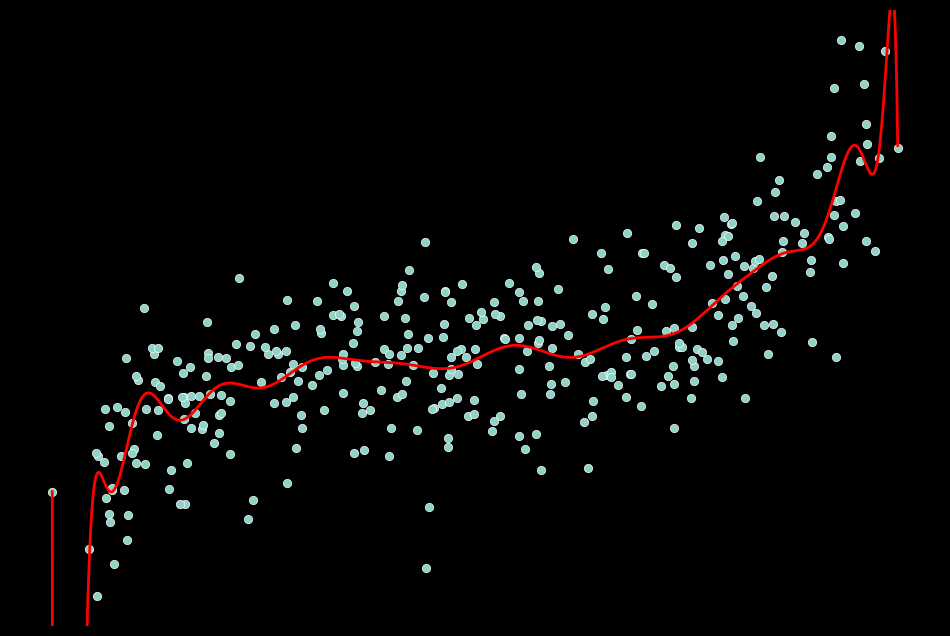

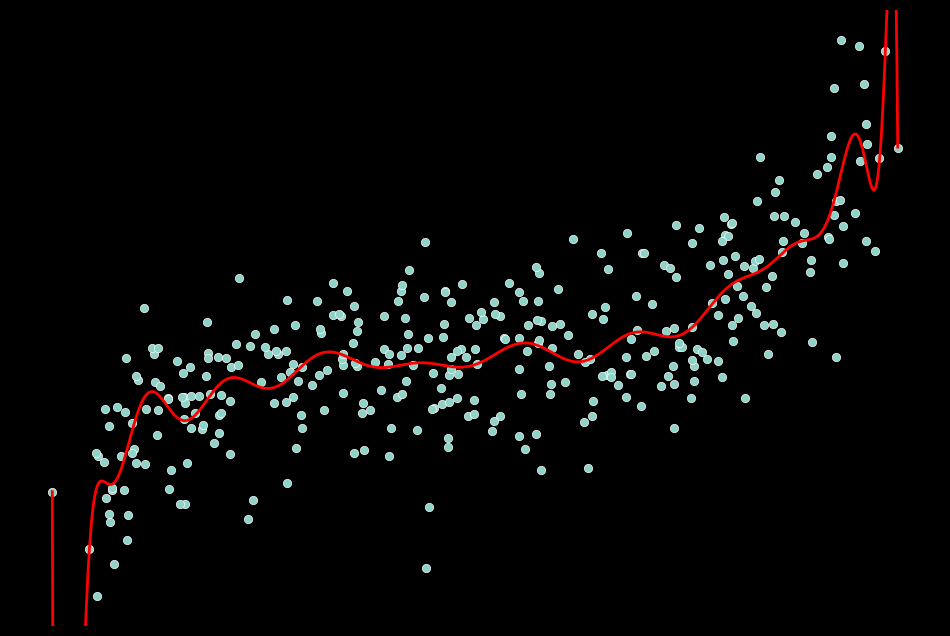

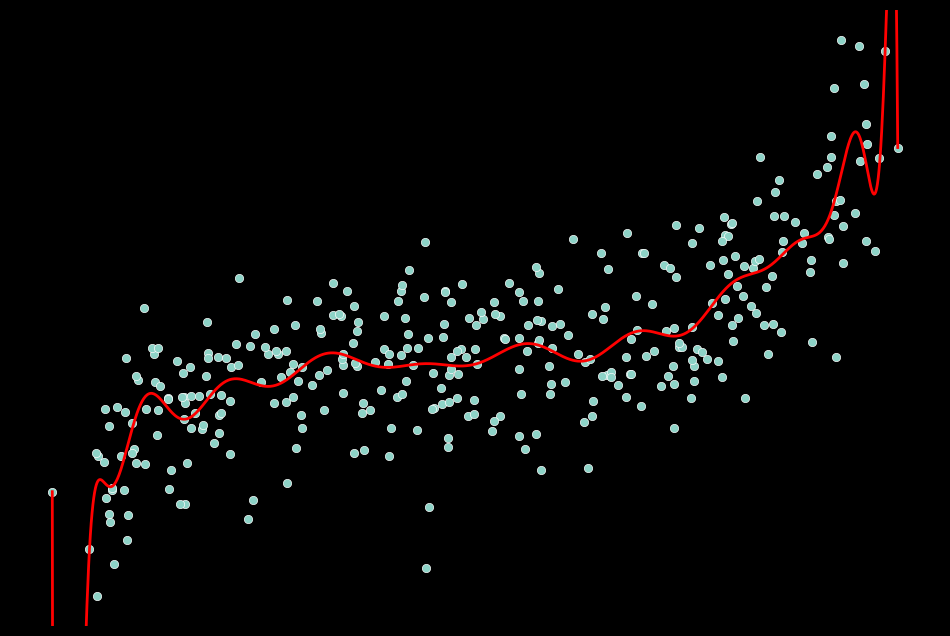

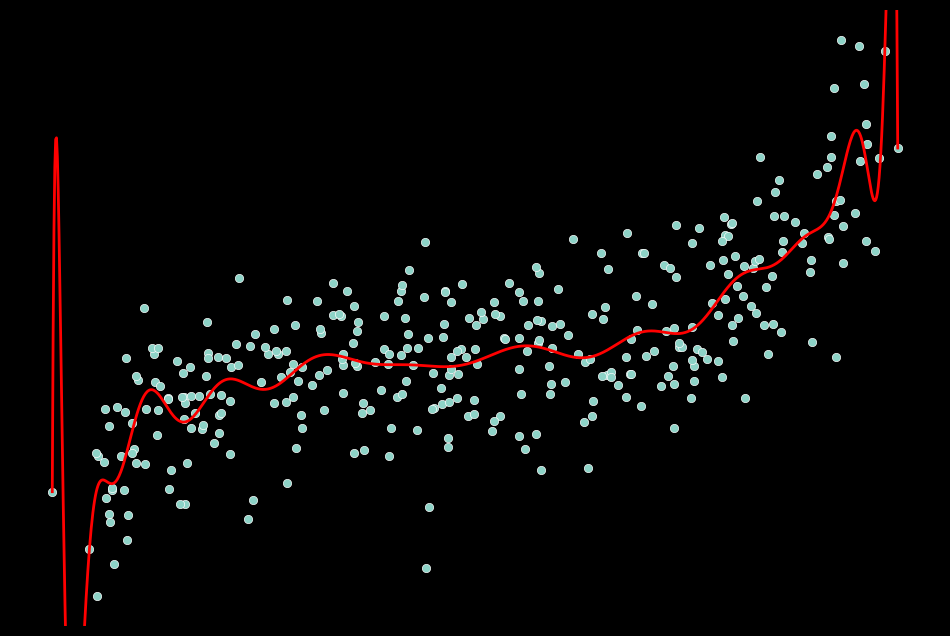

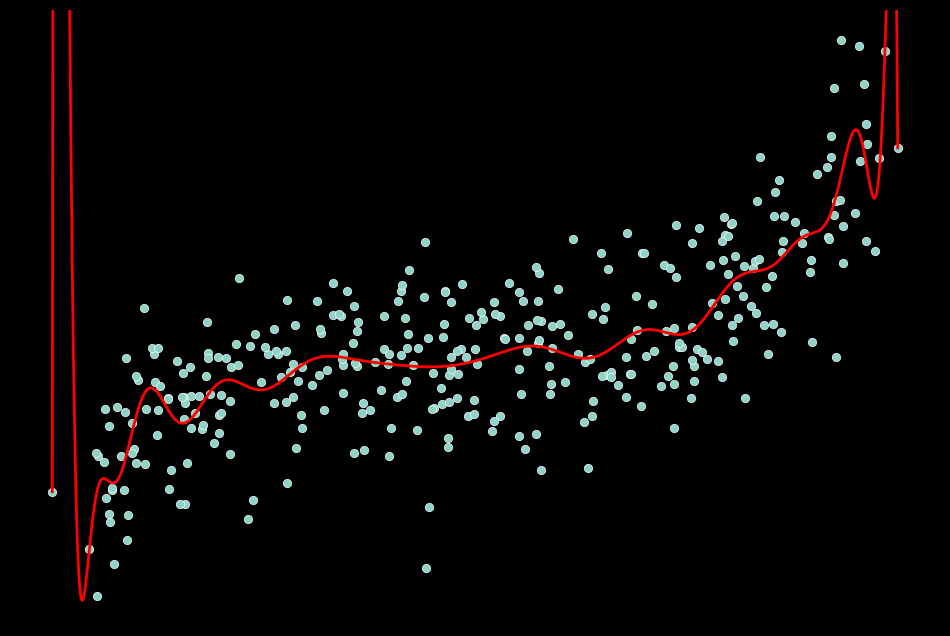

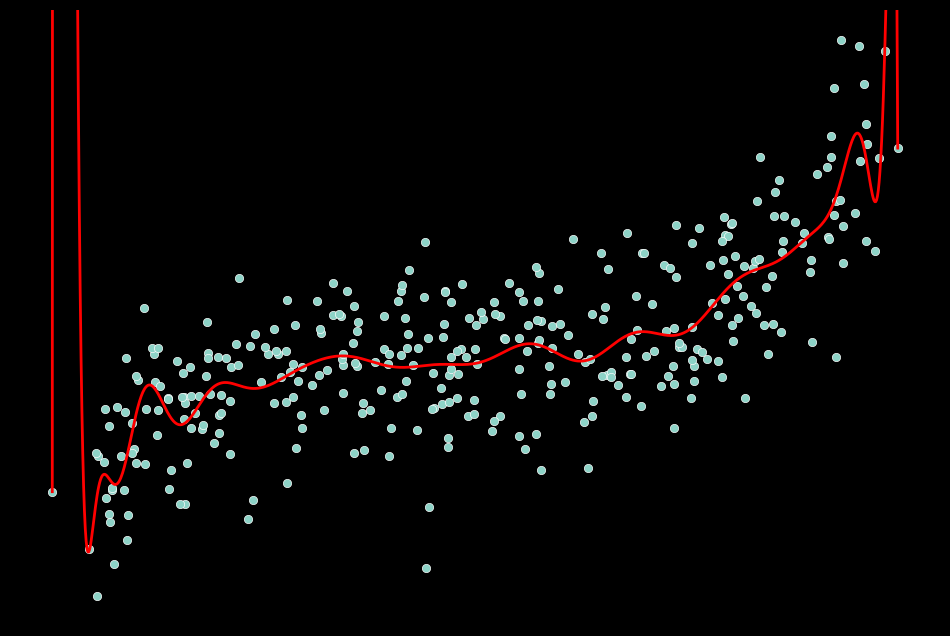

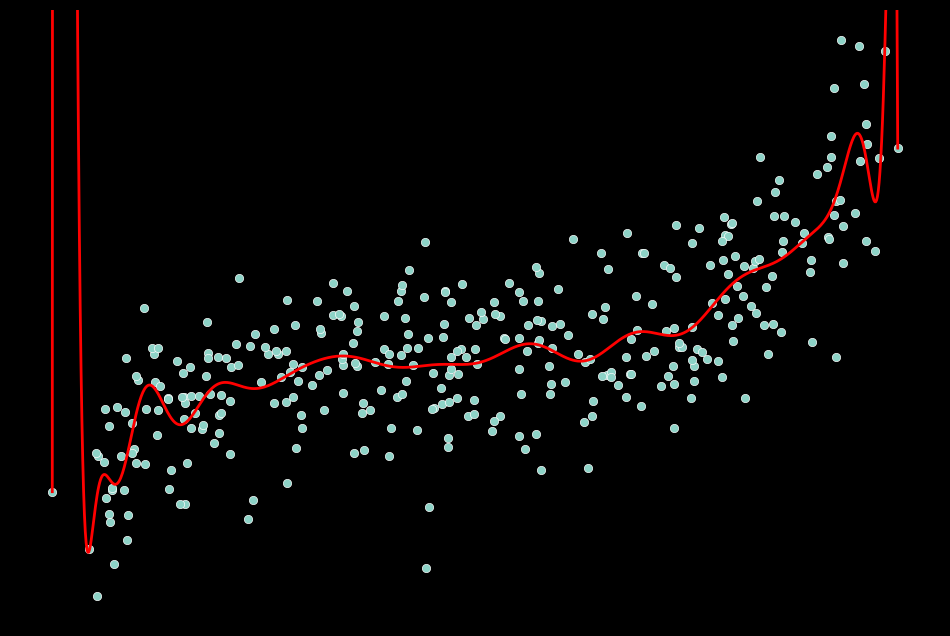

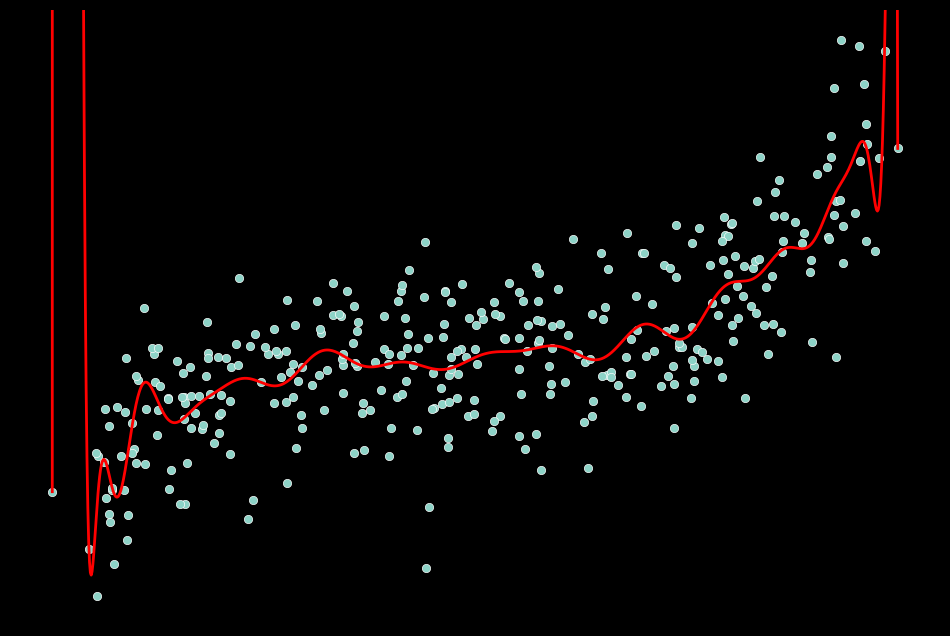

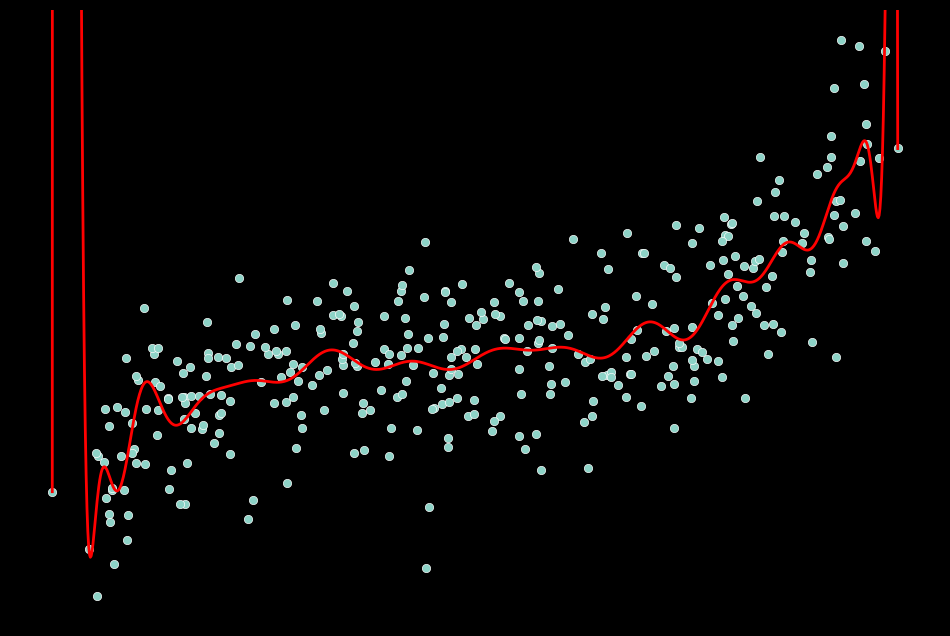

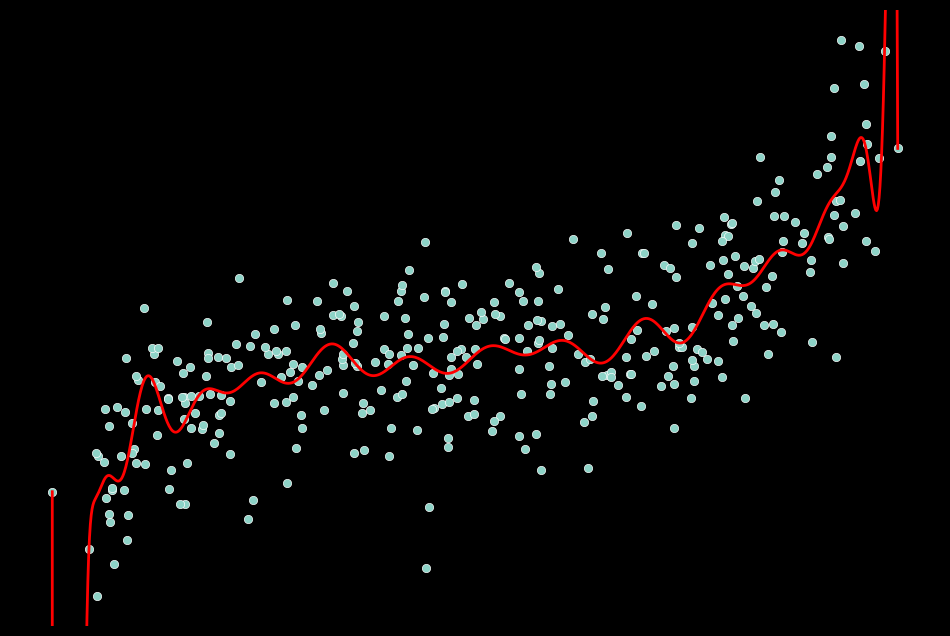

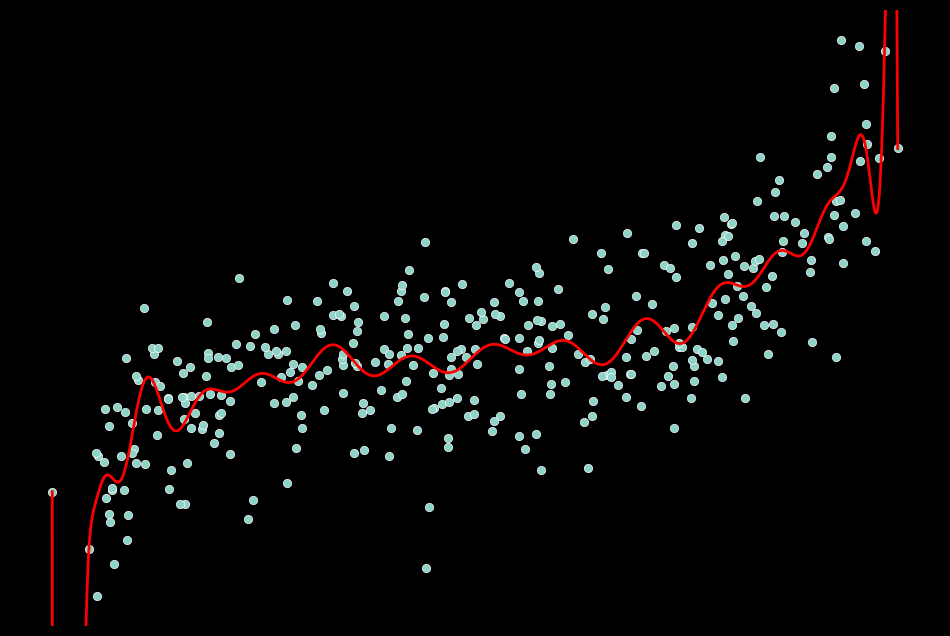

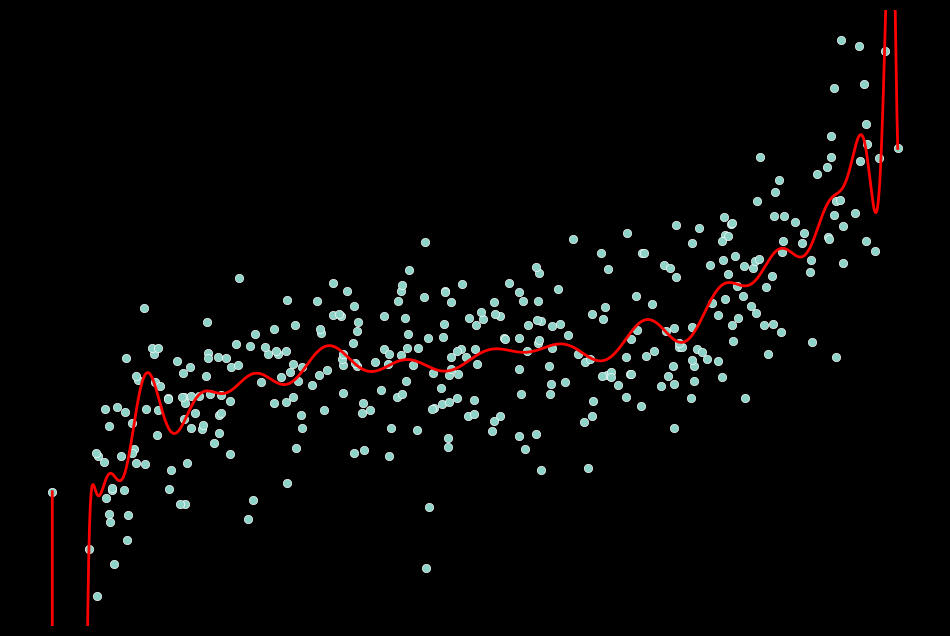

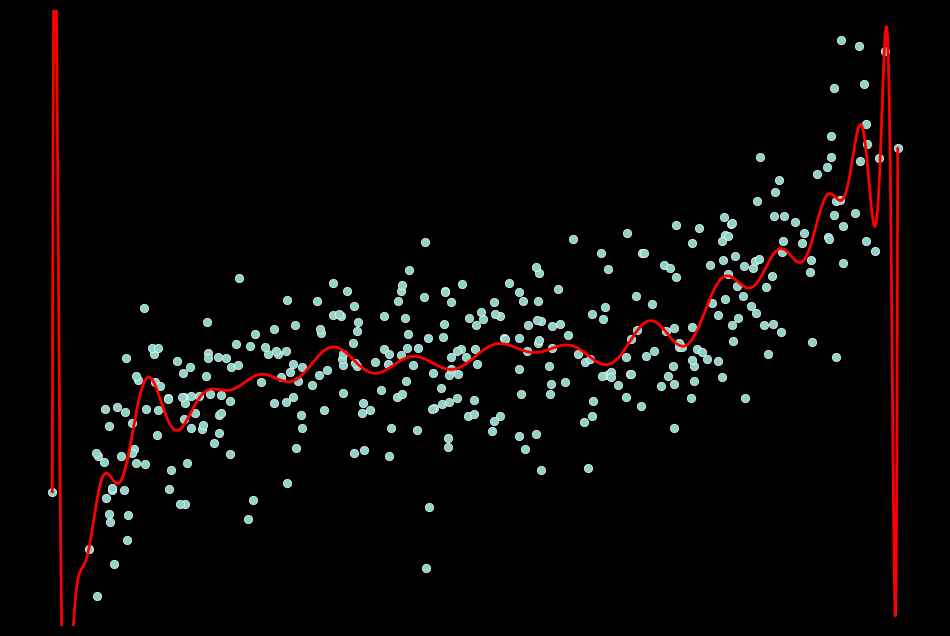

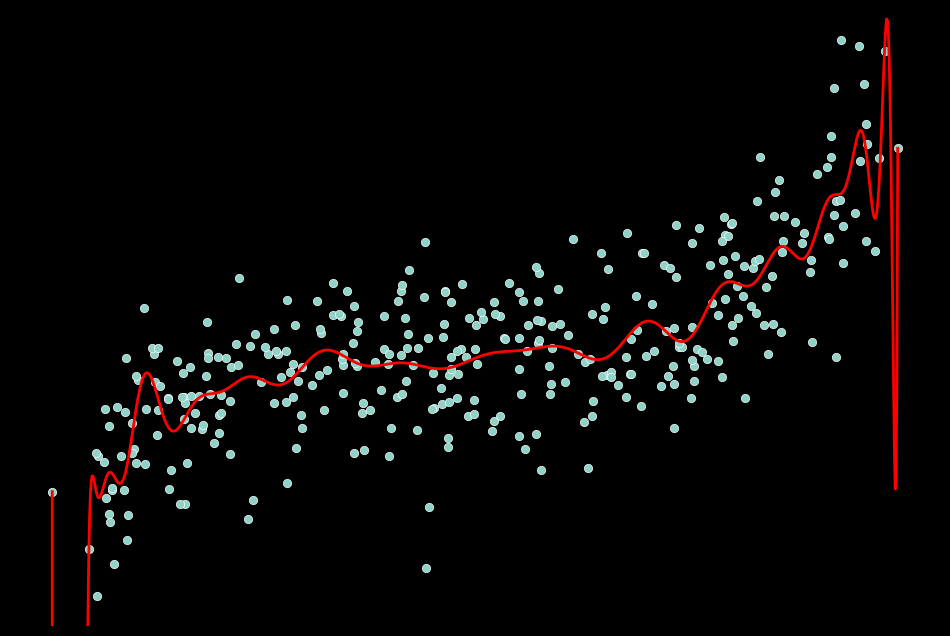

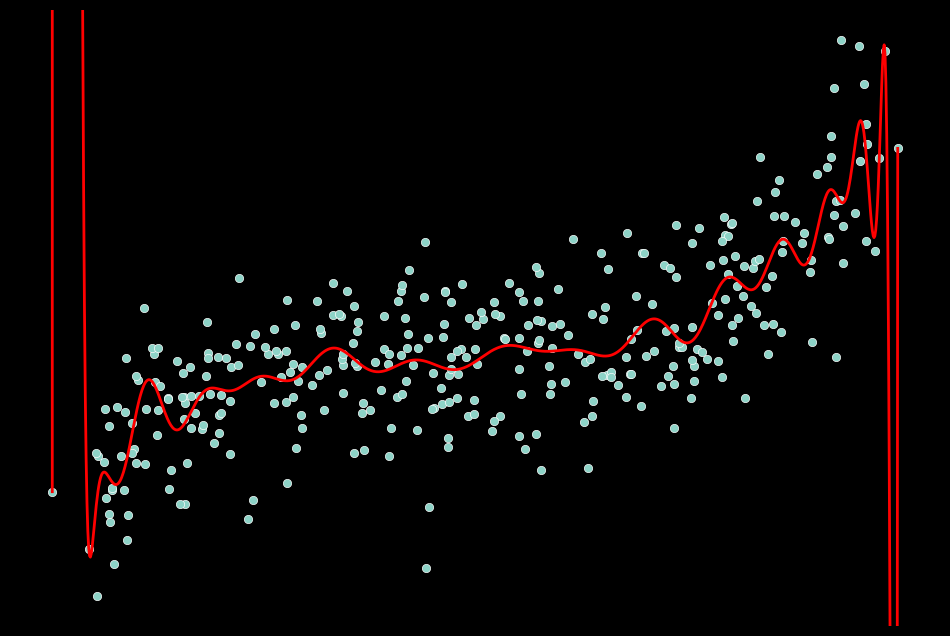

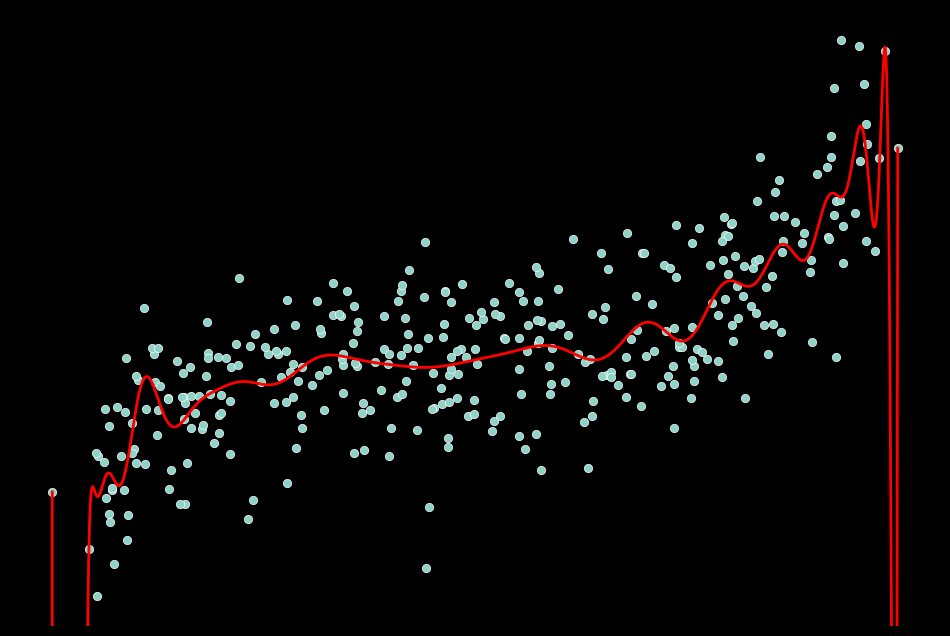

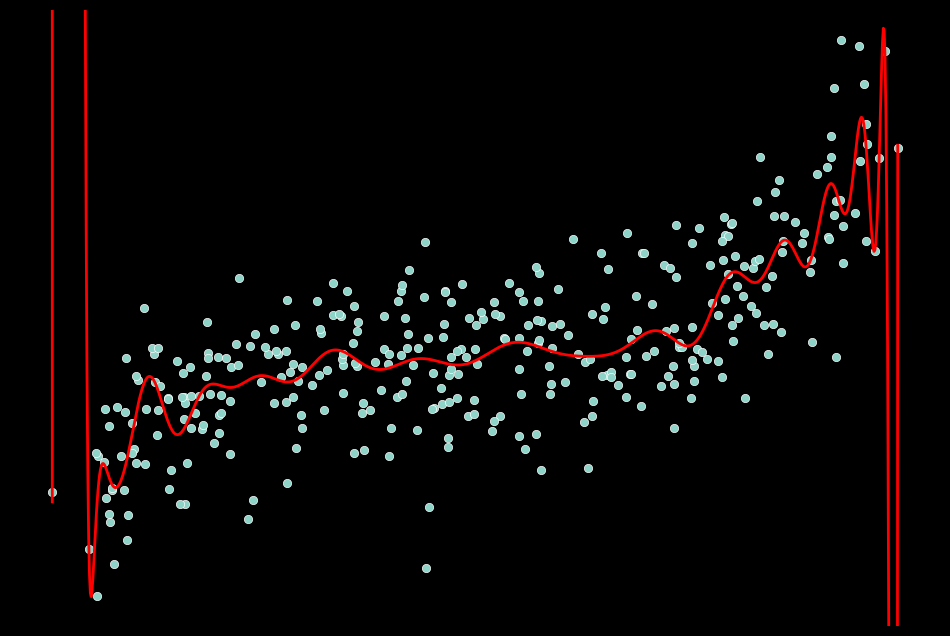

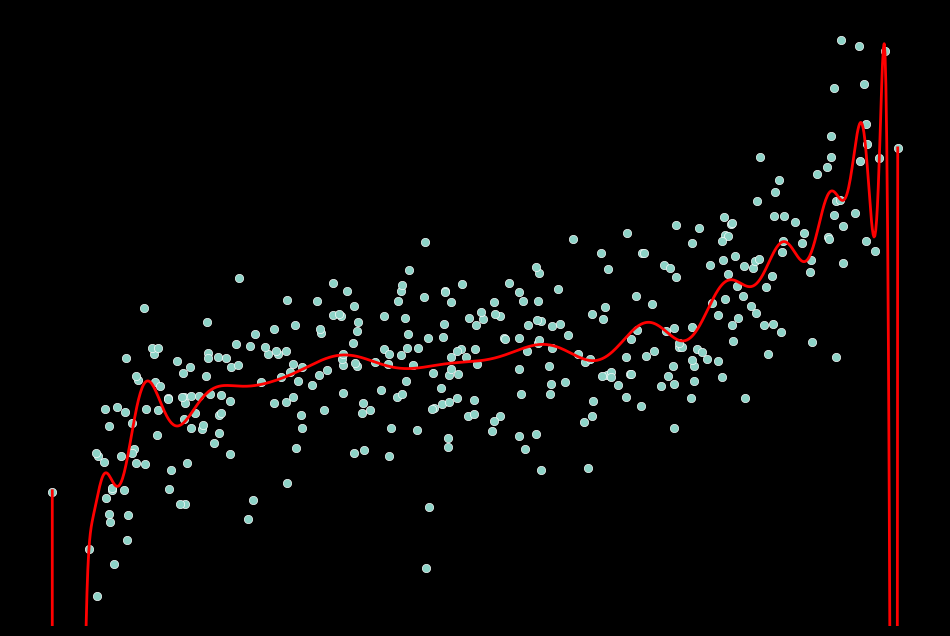

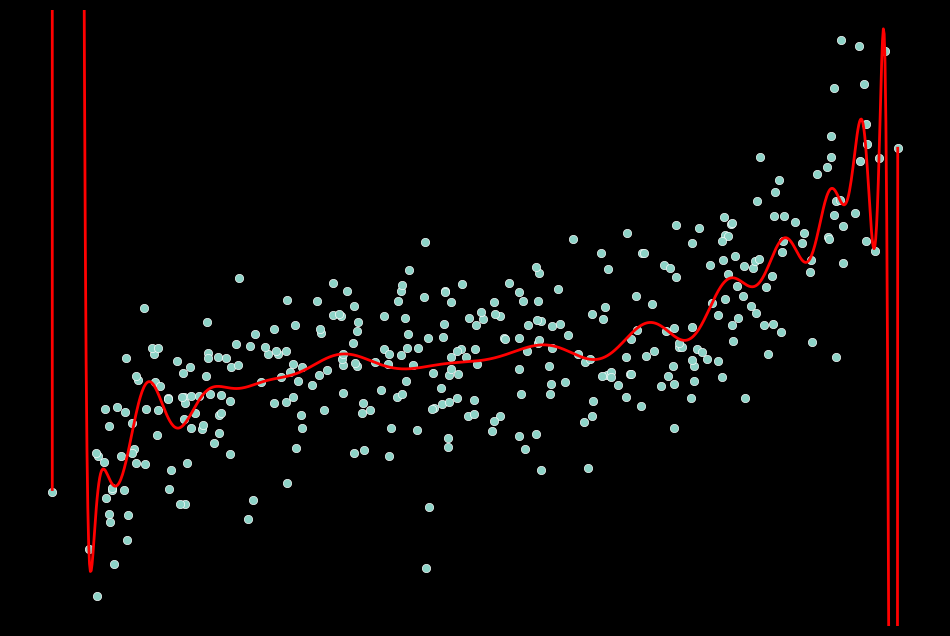

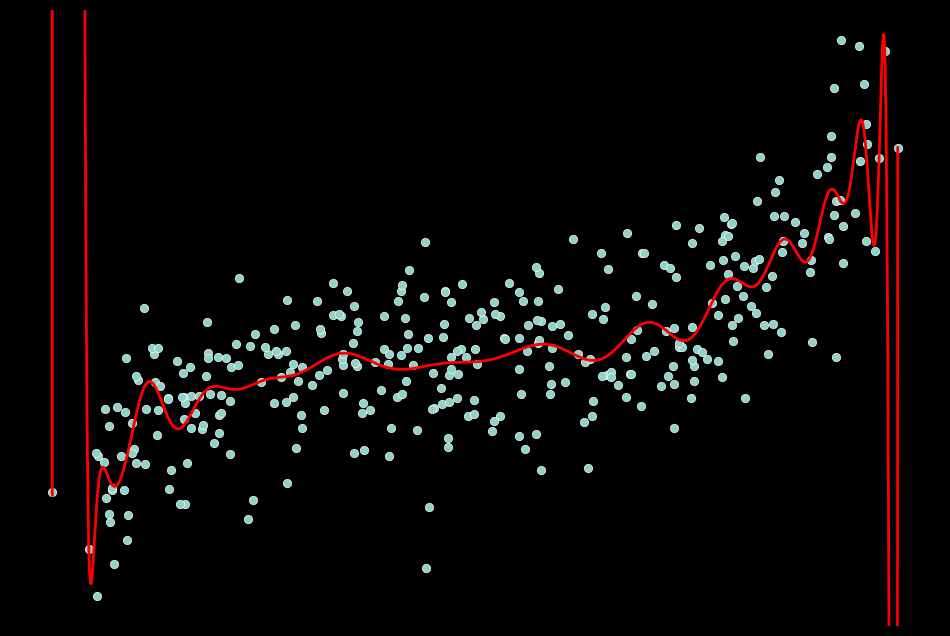

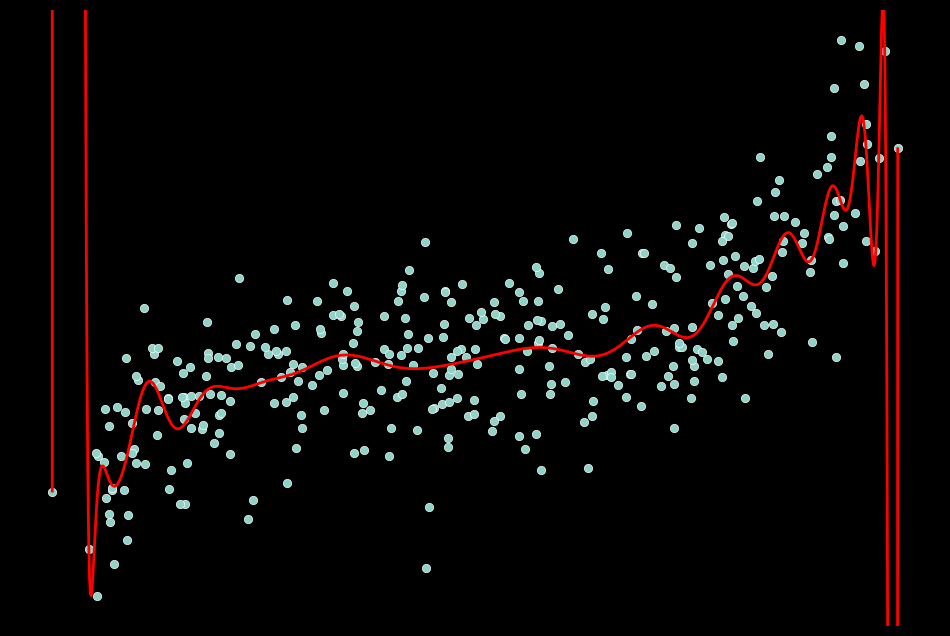

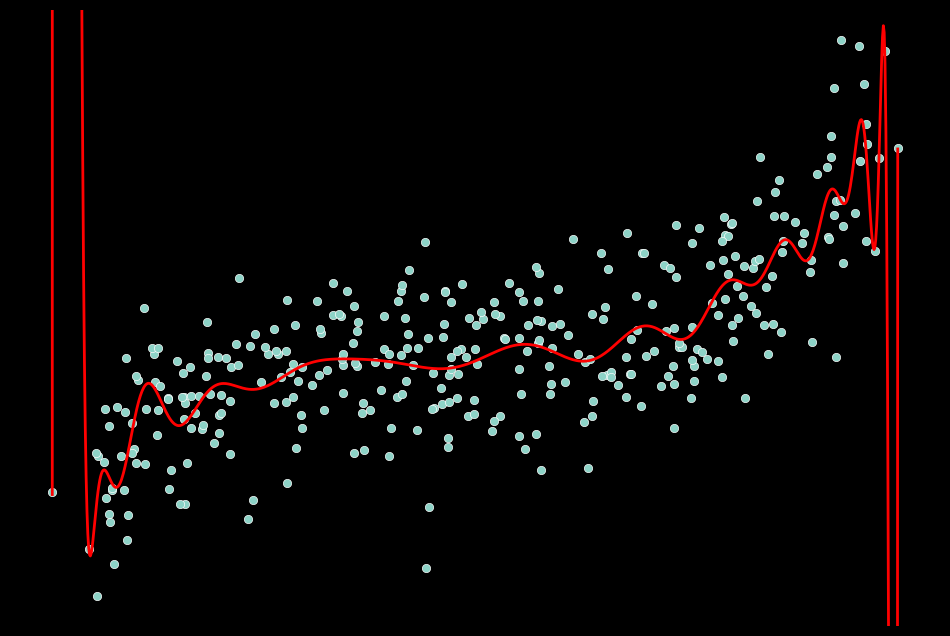

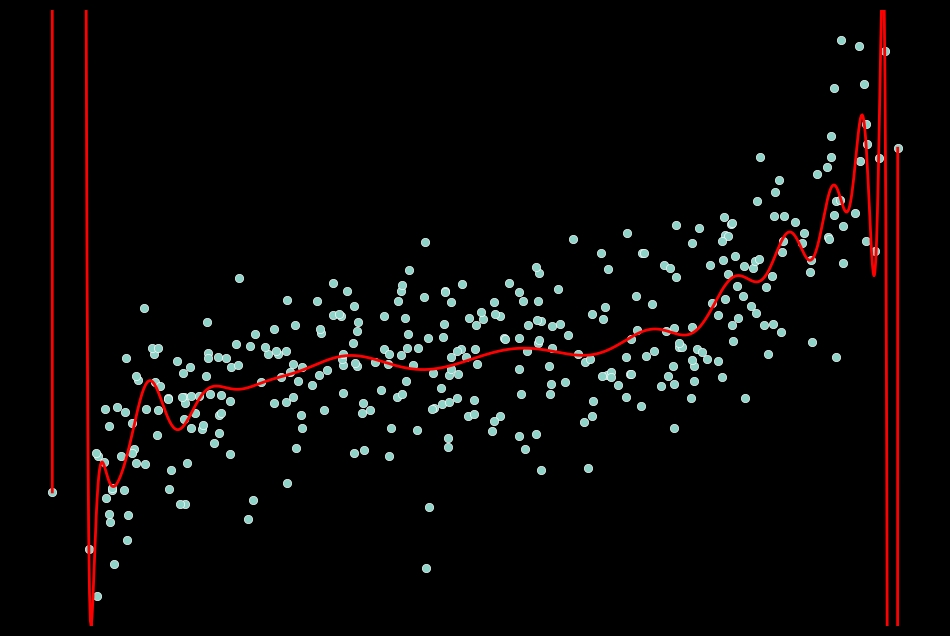

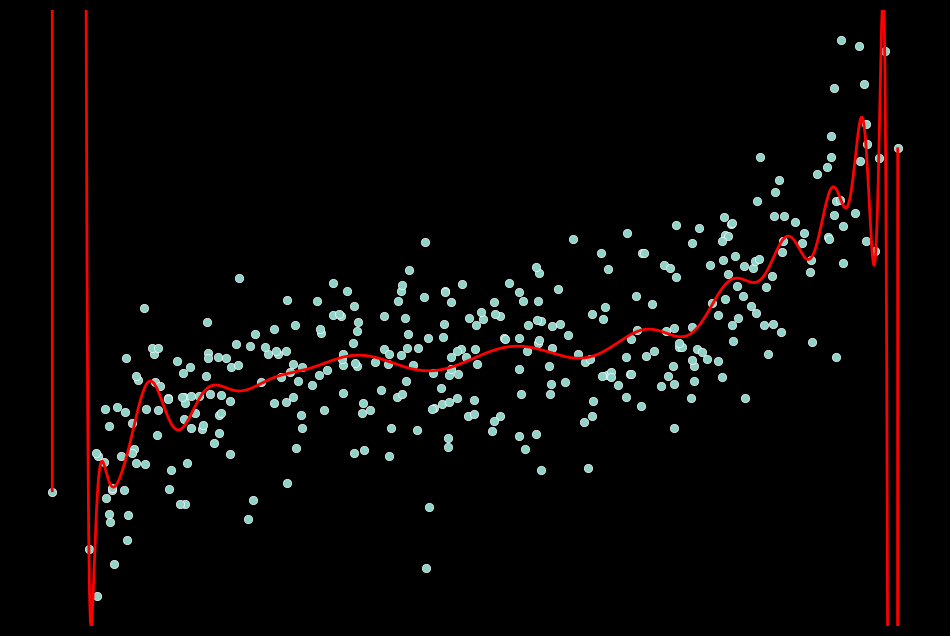

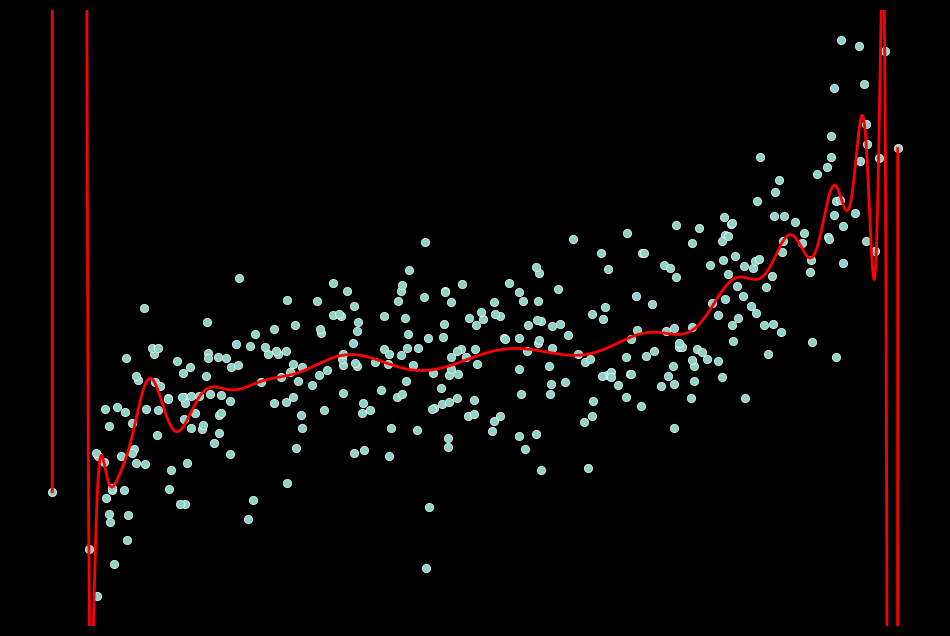

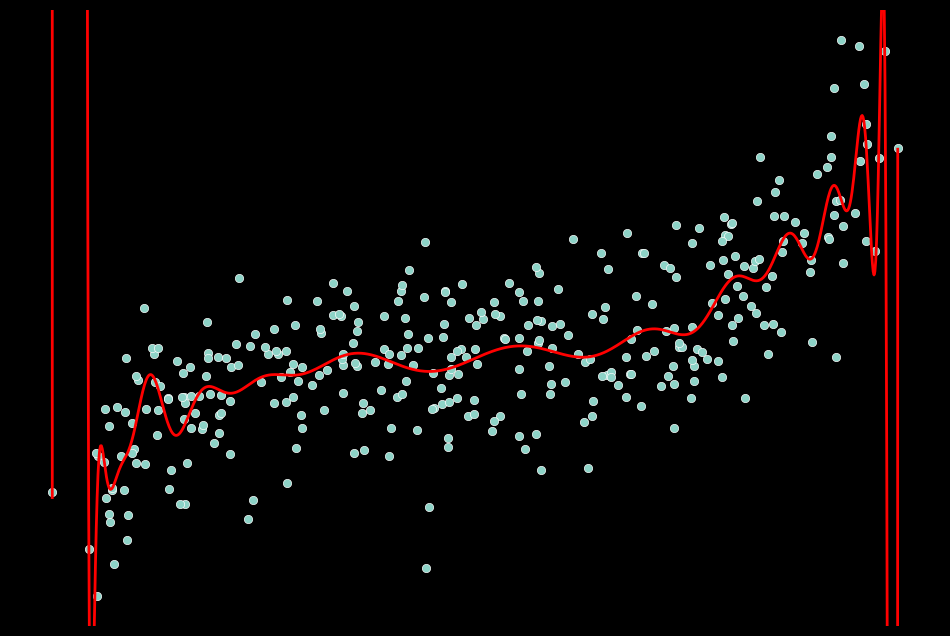

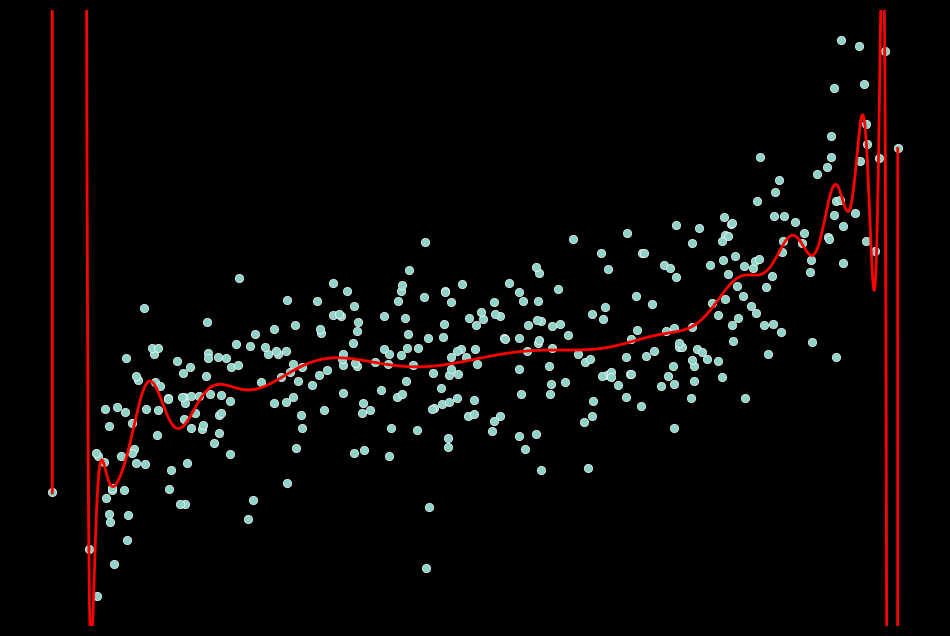

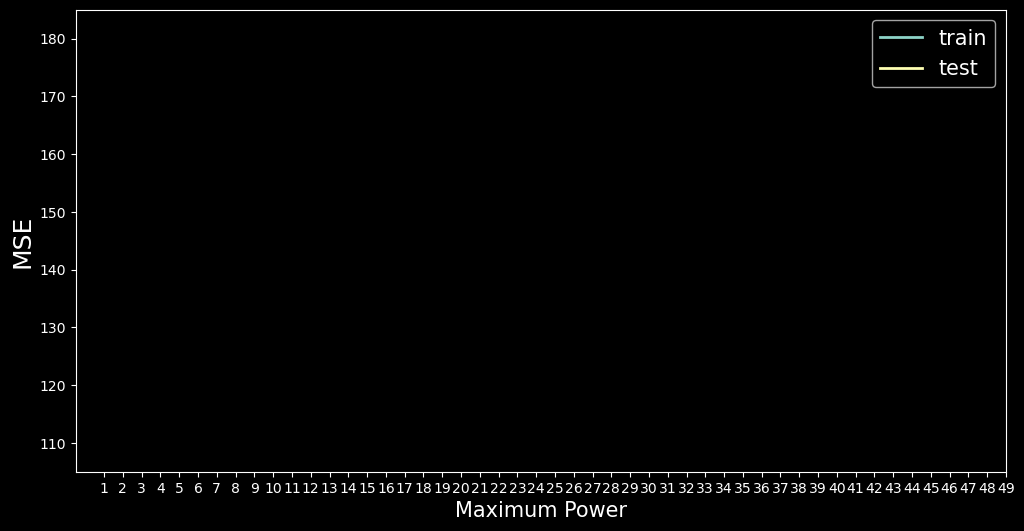

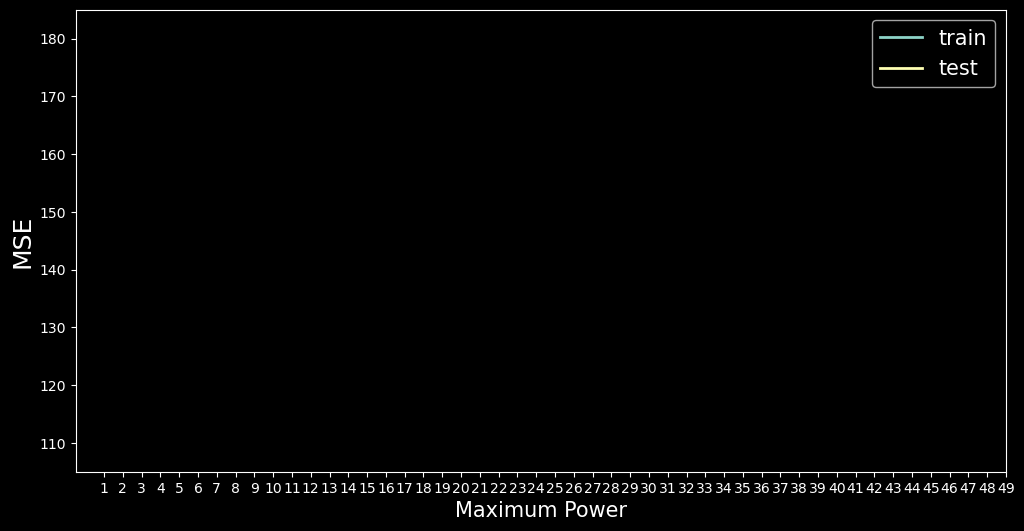

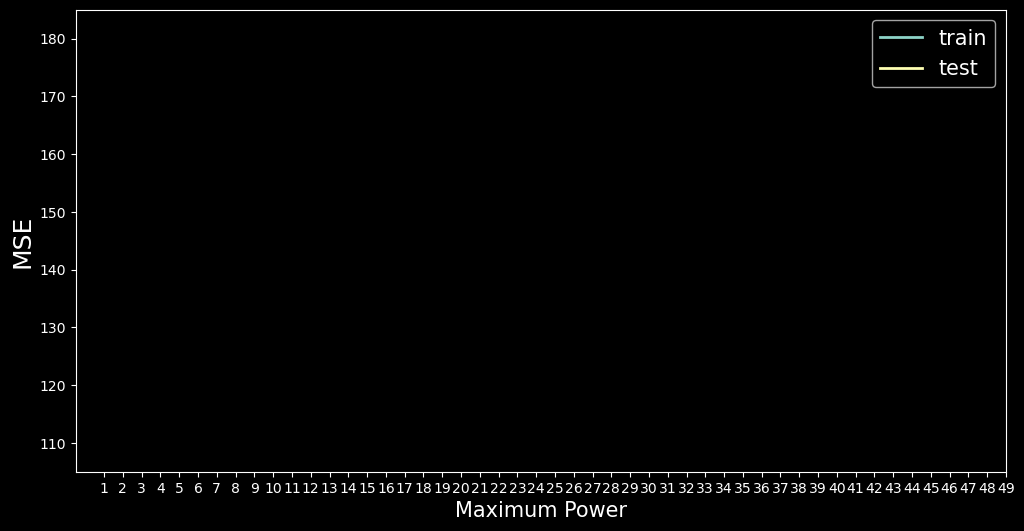

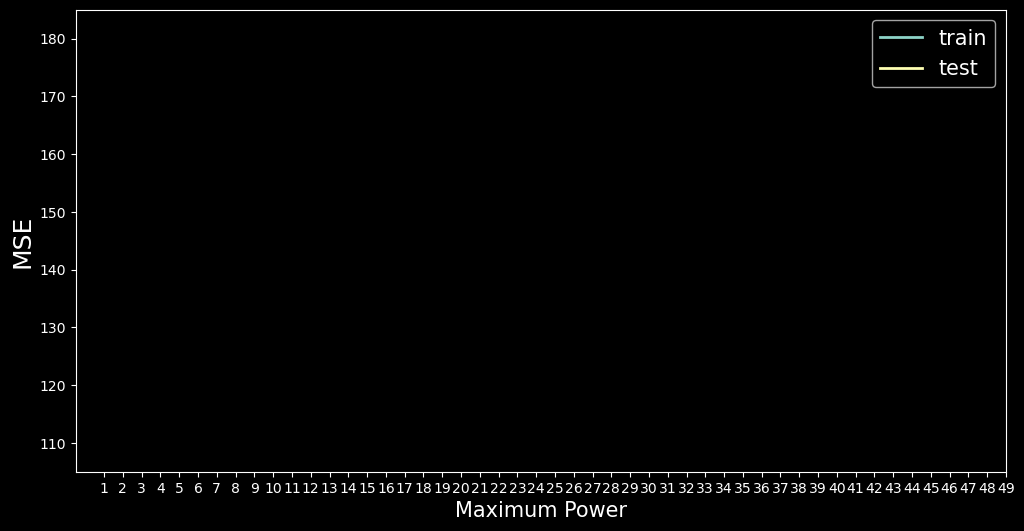

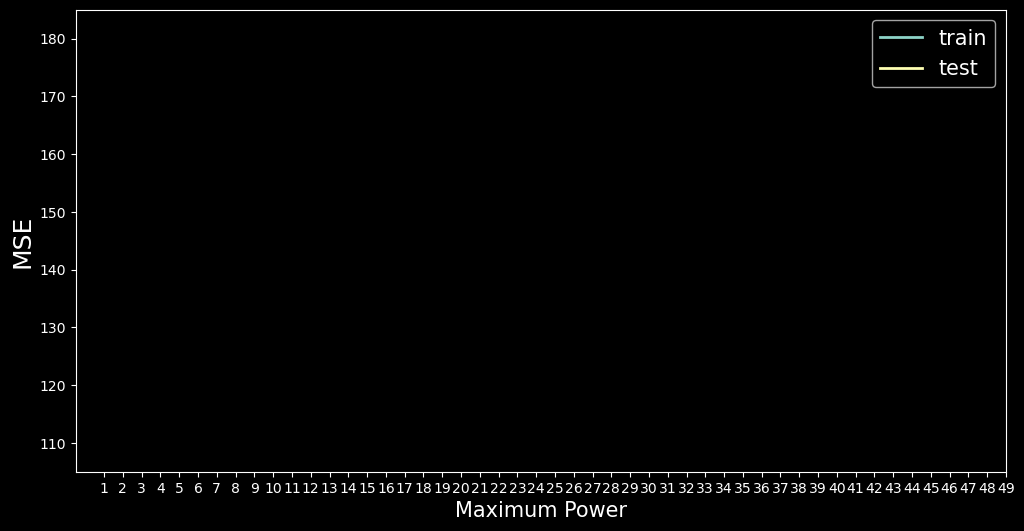

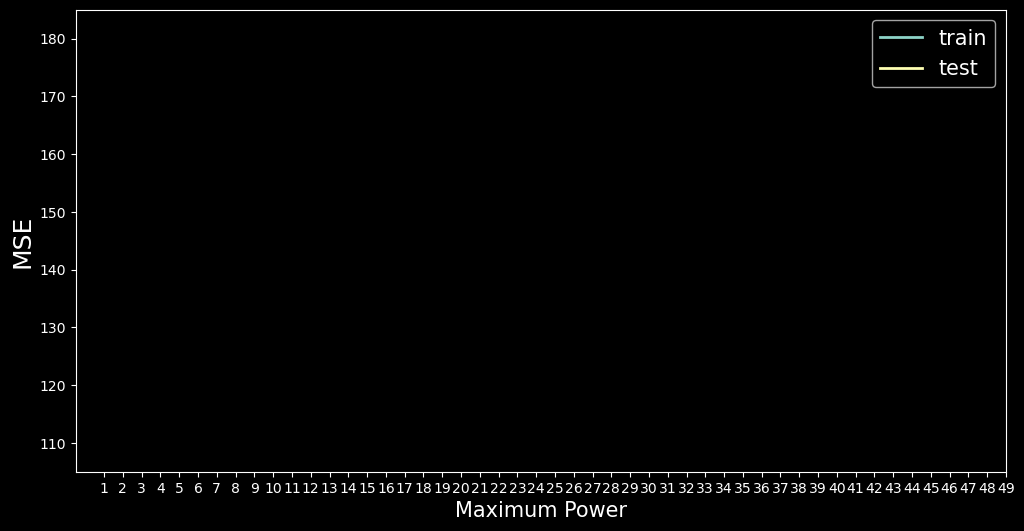

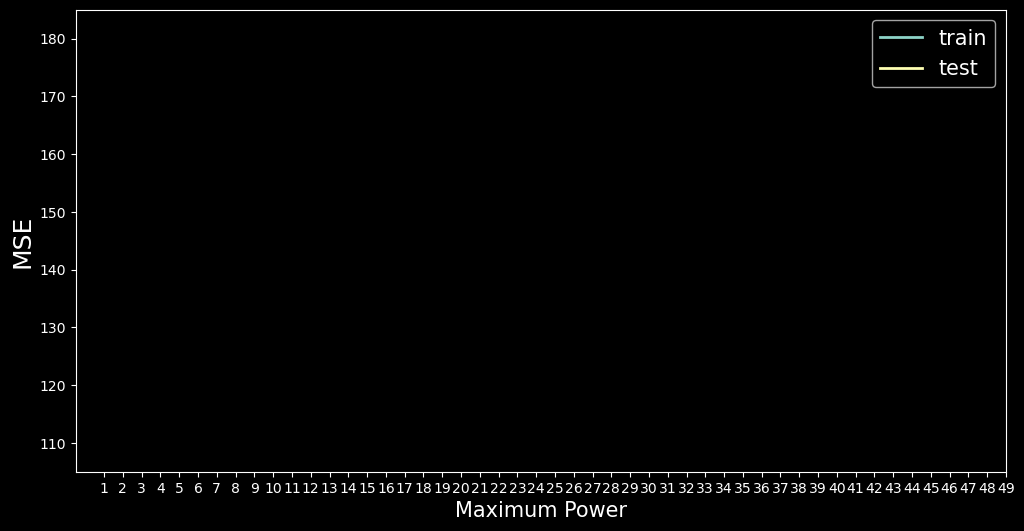

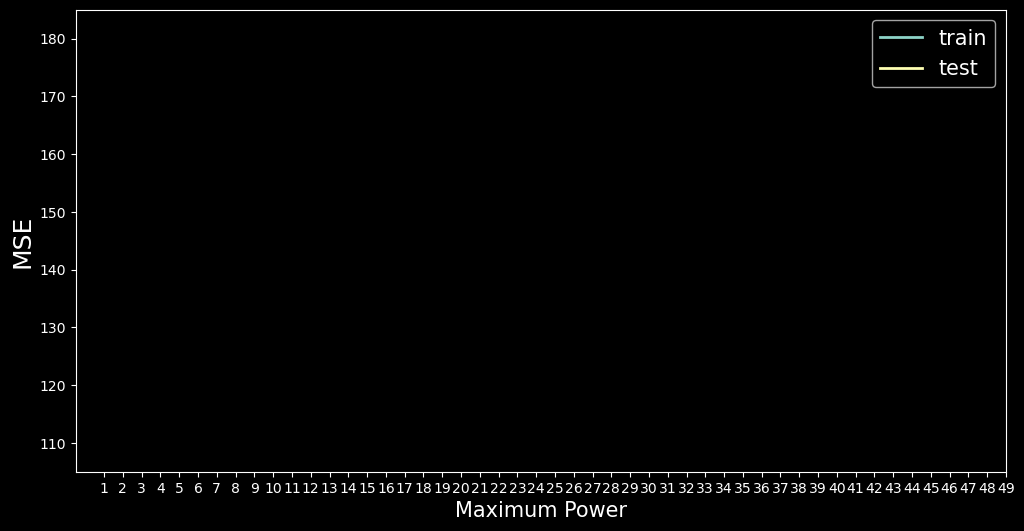

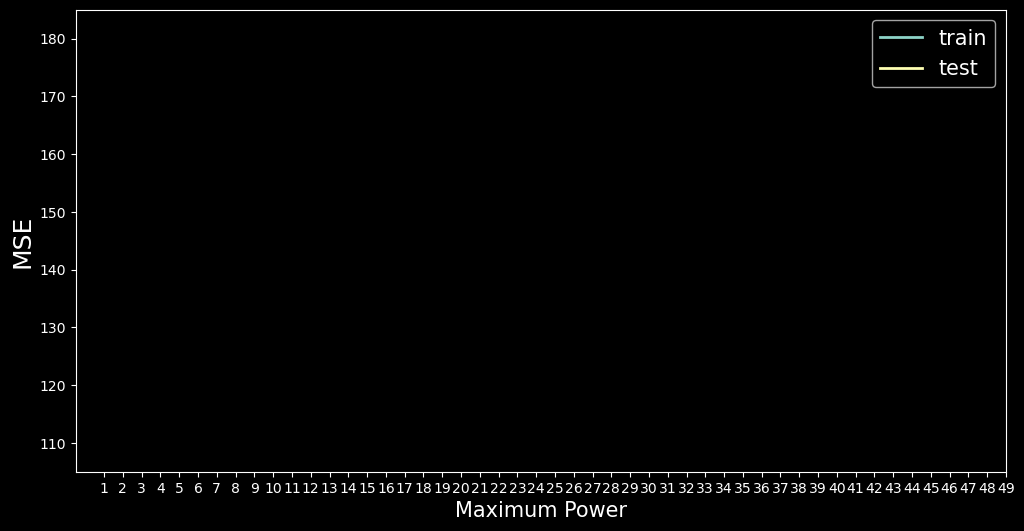

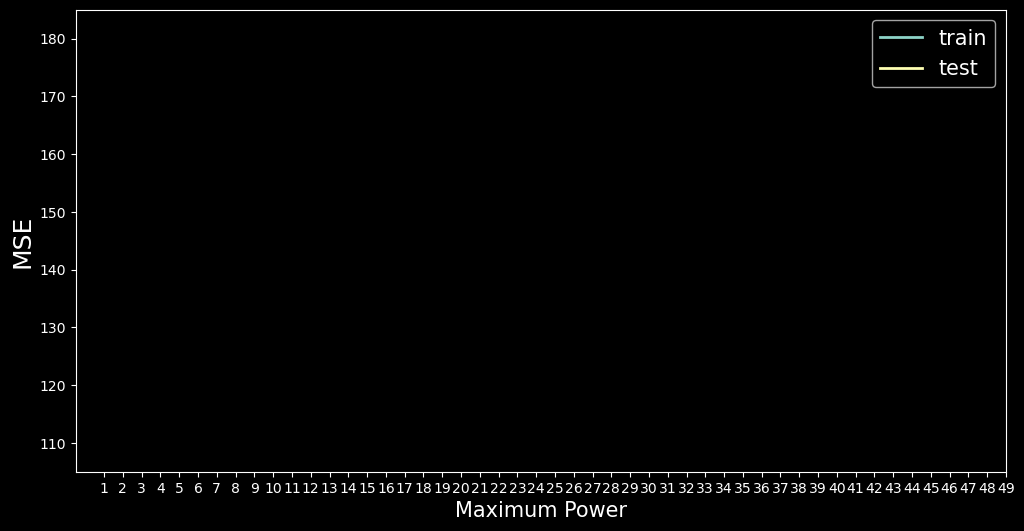

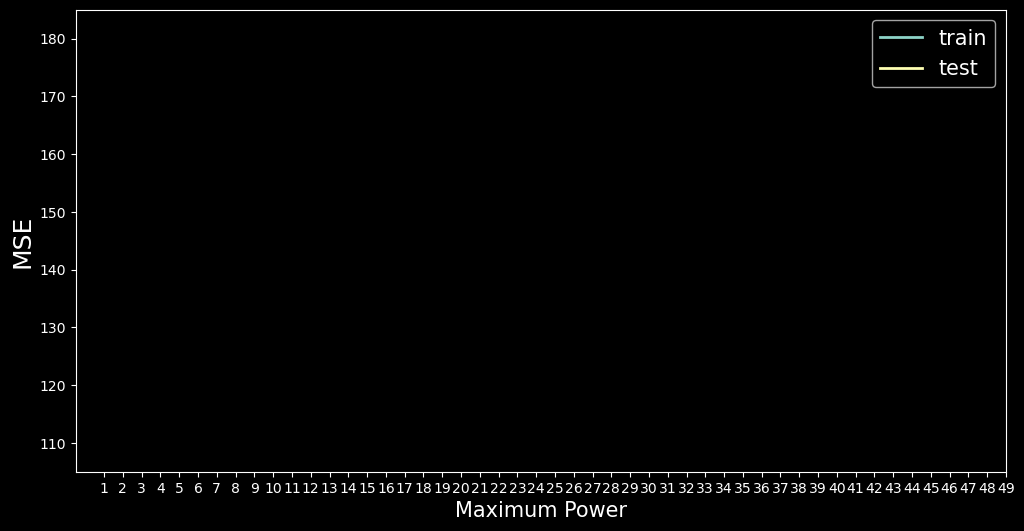

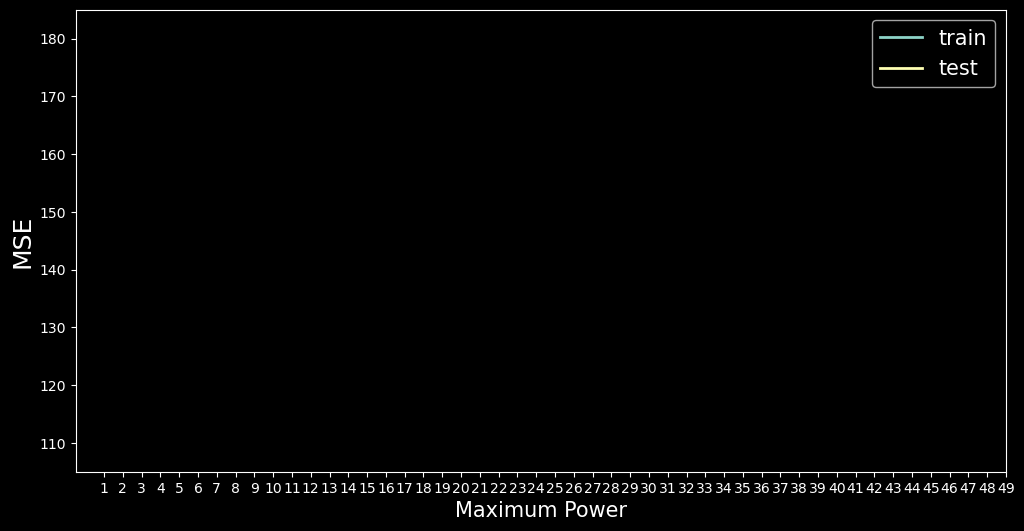

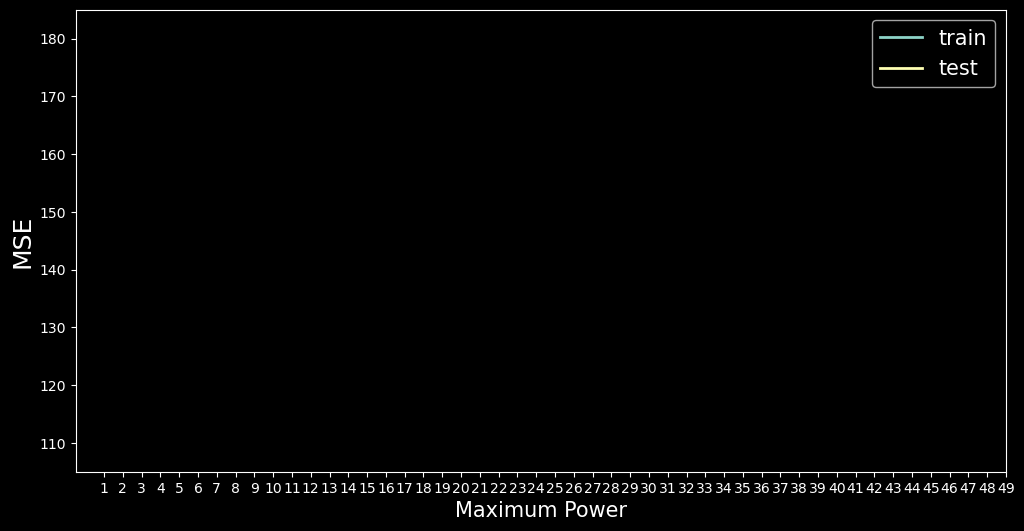

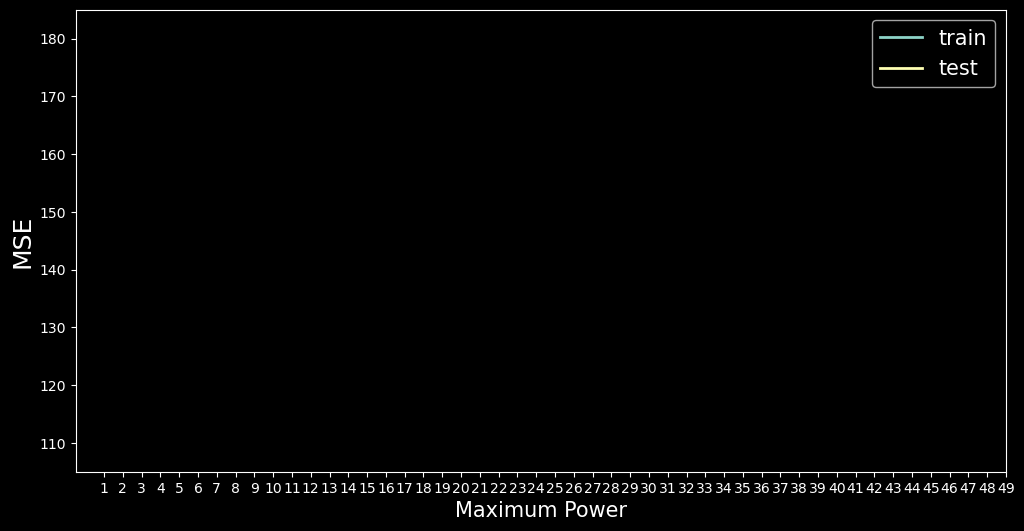

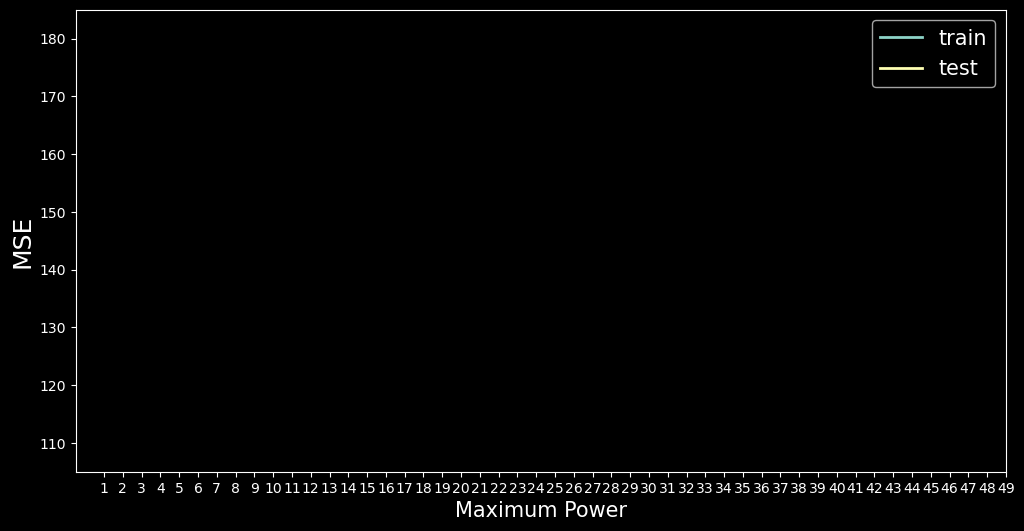

In [27]:
r=22
train = []
test = []
n = []
for i in range(1,50):
    model, train_mse, test_mse = regression(x,y,i,r)
    train.append(train_mse)
    test.append(test_mse)
    n.append(i)
    

for i in range(1,16):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,6))
    plt.plot(n[0:i],train[0:i],label='train', lw=2)   
    plt.plot(n[0:i],test[0:i],label='test', lw=2)  

    plt.ylabel("MSE",size=18)
    plt.xlabel("Maximum Power",size=15)
    plt.xlim(-0.5,15.5)
    plt.ylim(105,185)
    plt.xticks(n)

    plt.legend(loc =1,prop={'size': 15})

    plt.savefig('../figures/poly/mse{}.png'.format(i),format='png',dpi=150)   

In [28]:
data.to_csv('./dataset/house_price.csv')
data = pd.read_csv('./dataset/house_price.csv')